In [1]:
import pandas as pd
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import onekey_algo.custom.components as okcomp
from onekey_algo import get_param_in_cwd

plt.rcParams['figure.dpi'] = 300
model_names = get_param_in_cwd('compare_algos')
# 获取配置
task = get_param_in_cwd('task_column')
sel_m = get_param_in_cwd('sel_model')
labelf = get_param_in_cwd('label_file') or os.path.join(mydir, 'label.csv')
group_info = get_param_in_cwd('dataset_column') or 'group'

# 读取label文件。
labels = [task]
label_data_ = pd.read_csv(labelf)
label_data_['ID'] = label_data_['ID'].map(lambda x: f"{x}.nii.gz" if not (f"{x}".endswith('.nii.gz') or  f"{x}".endswith('.nii')) else x)
label_data_ = label_data_[['ID', group_info, task]]
label_data_ = label_data_.dropna(axis=0)

ids = label_data_['ID']
print(label_data_.columns)
label_data = label_data_
label_data

Index(['ID', 'group', 'label'], dtype='object')


ID  group  label
0    251.nii.gz  test1      0
1    252.nii.gz  test1      0
2    253.nii.gz  test1      0
3    254.nii.gz  test1      0
4    255.nii.gz  test1      0
..          ...    ...    ...
617    7.nii.gz    val      0
618   74.nii.gz    val      1
619   87.nii.gz    val      1
620   92.nii.gz    val      0
621   97.nii.gz    val      1

[622 rows x 3 columns]

# 训练集-Nomogram

ID   -0_x  1_ExtraTrees   -0_y  2_ExtraTrees     -0   3_LR  \
0      1.nii.gz  0.357         0.643  0.005         0.995  0.064  0.936   
1    100.nii.gz  0.931         0.069  0.998         0.002  0.941  0.059   
2    101.nii.gz  0.953         0.047  0.995         0.005  0.958  0.042   
3    102.nii.gz  0.978         0.022  0.994         0.006  0.965  0.035   
4    104.nii.gz  0.042         0.958  0.000         1.000  0.033  0.967   
..          ...    ...           ...    ...           ...    ...    ...   
138   94.nii.gz  0.825         0.175  0.995         0.005  0.975  0.025   
139   95.nii.gz  0.833         0.167  0.973         0.027  0.333  0.667   
140   96.nii.gz  0.448         0.552  0.003         0.997  0.397  0.603   
141   98.nii.gz  0.983         0.017  0.998         0.002  0.992  0.008   
142   99.nii.gz  0.872         0.128  0.991         0.009  0.350  0.650   

     Enhancement_degree_  Contour  Pleural_invasion  Lymphadenopathy  group  \
0                      1        1                 0                0  train   
1                      2        1                 0                0  train   
2                      2        0                 1                1  train   
3                      2        2                 0                1  train   
4                      1        2                 1                1  train   
..                   ...      ...               ...              ...    ...   
138                    1        1                 1                0  train   
139                    2        0                 0                0  train   
140                    2        2                 1                0  train   
141                    2        0                 0                0  train   
142                    2        0                 0                1  train   

     label  
0        1  
1        0  
2        0  
3        0  
4        1  
..     ...  
138      0  
139      0  
140      1  
141      0  
142      0  

[143 rows x 13 columns]

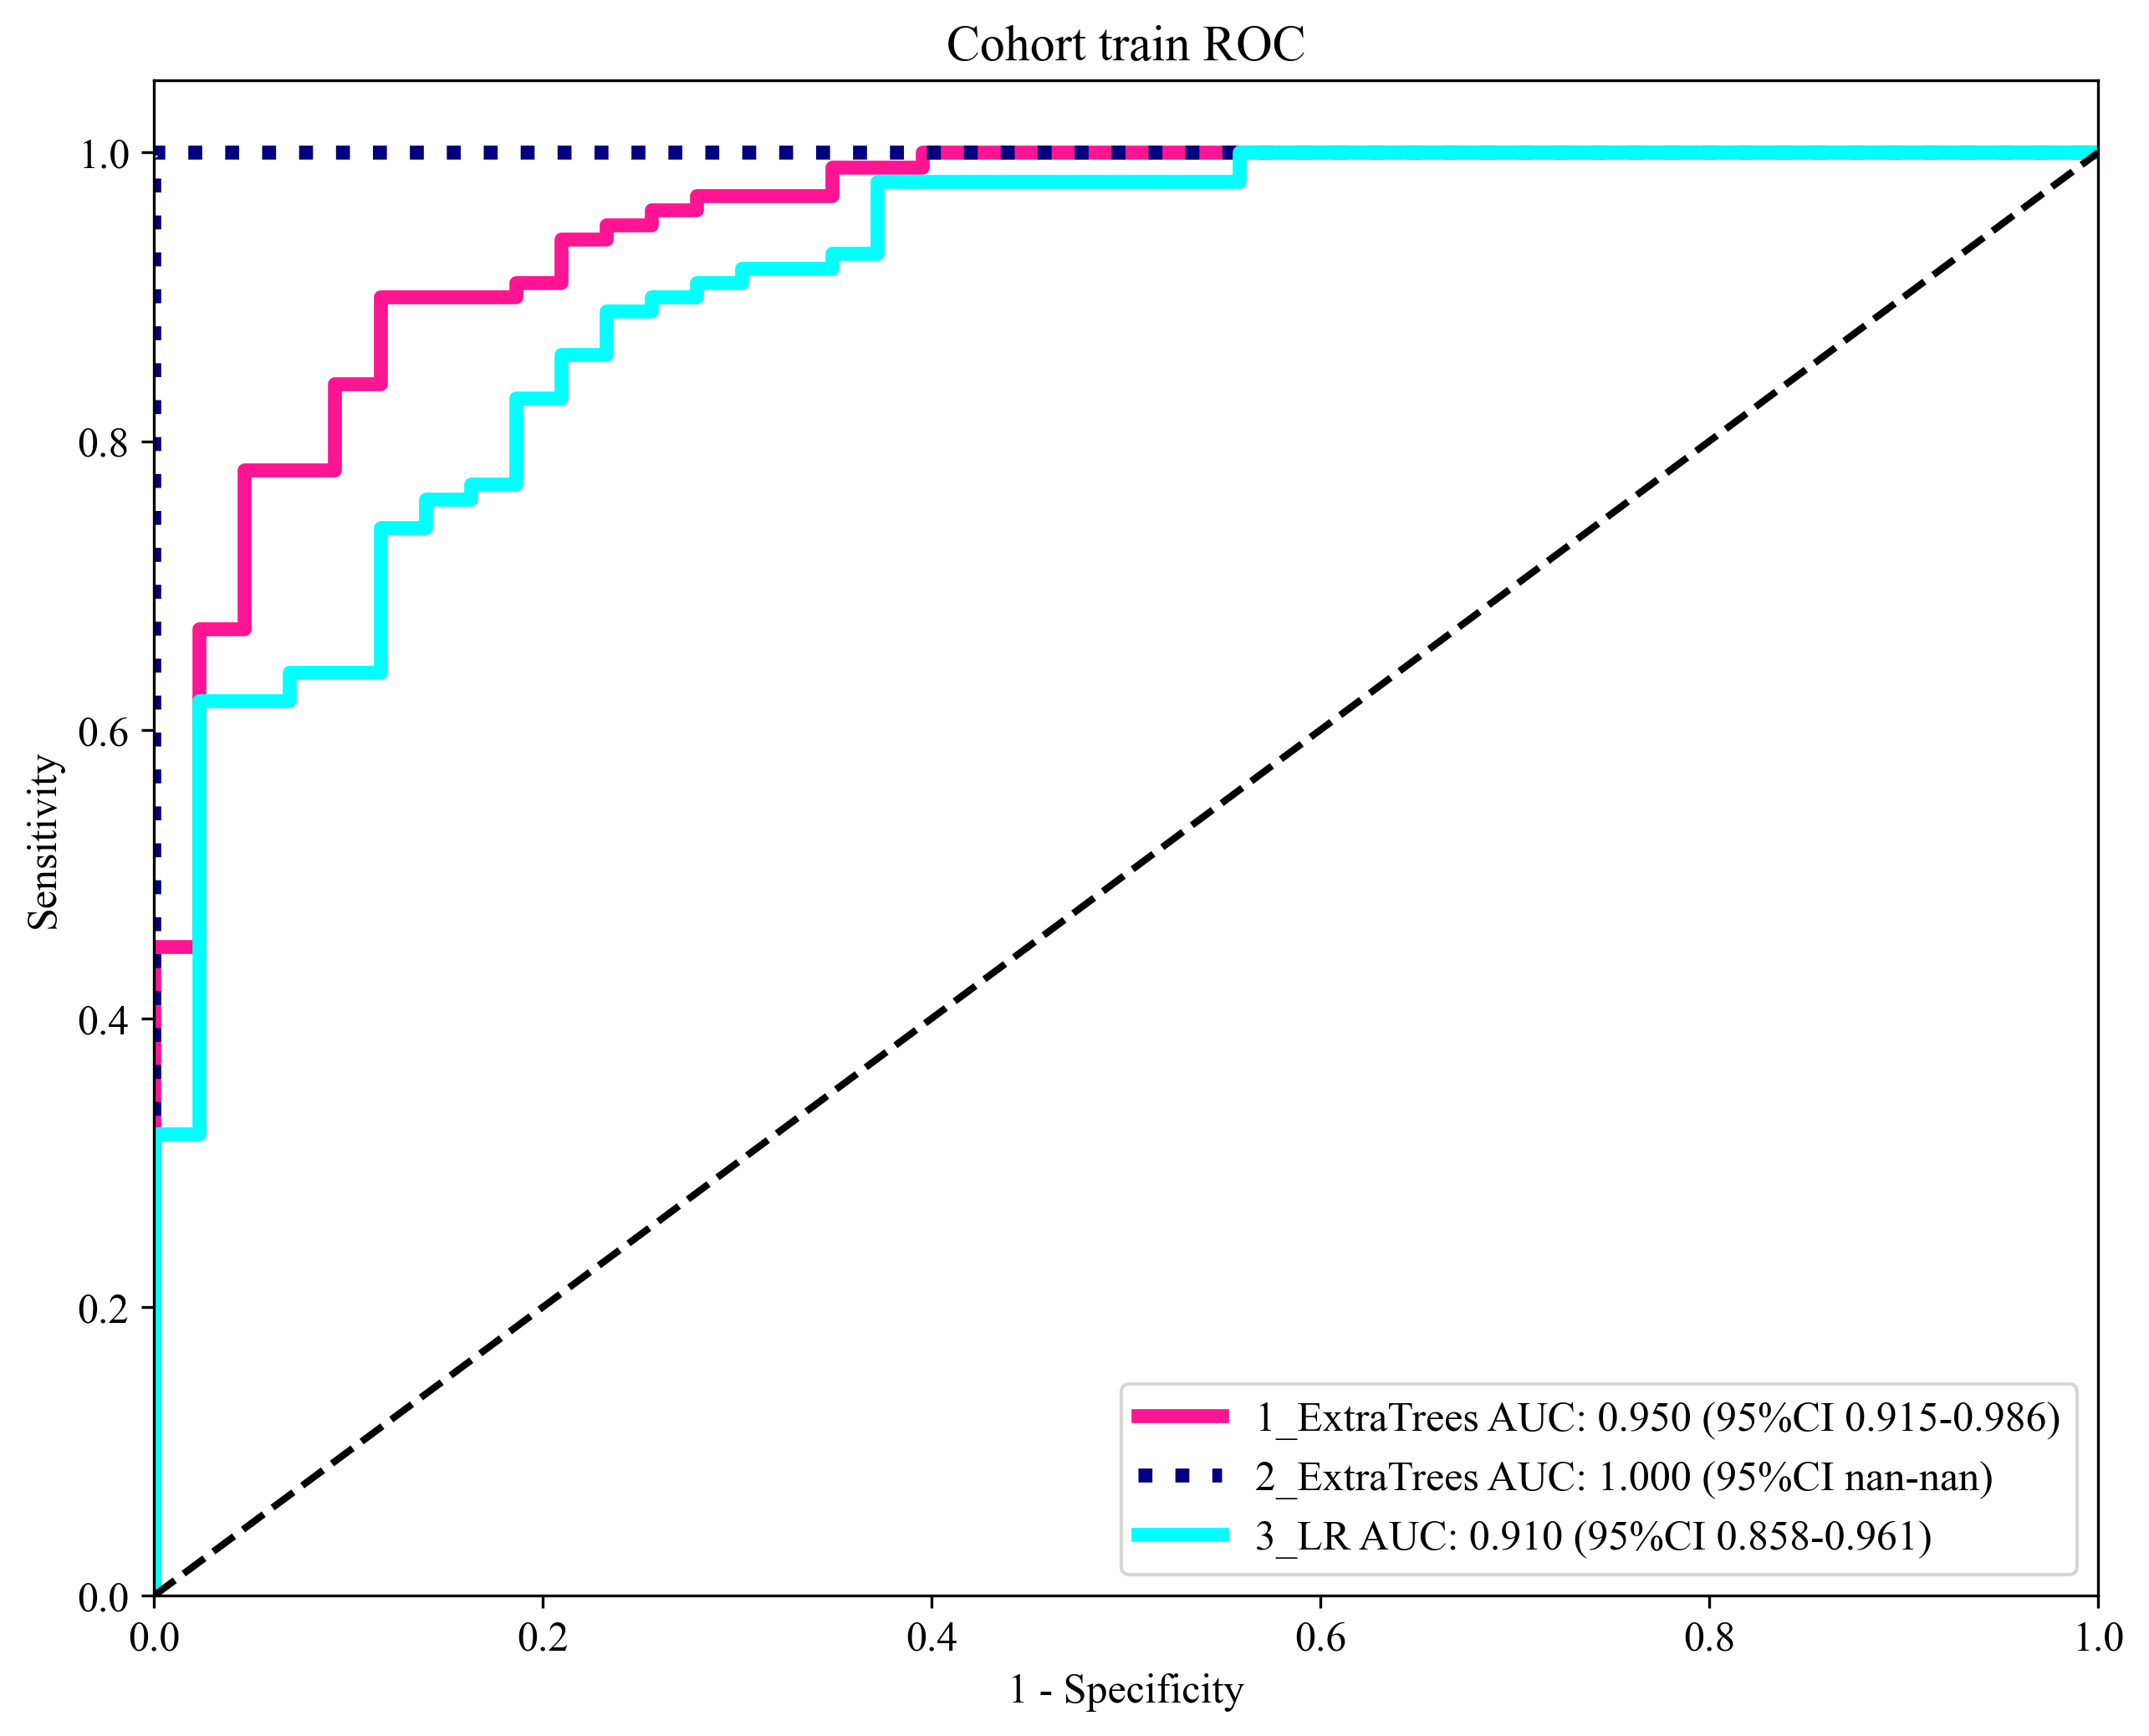

Signature  Accuracy   AUC           95% CI  Sensitivity  Specificity  \
0  1_ExtraTrees     0.895  0.95  0.9147 - 0.9863         0.90        0.884   
1  2_ExtraTrees     1.000  1.00  1.0000 - 1.0000         1.00        1.000   
2          3_LR     0.853  0.91  0.8585 - 0.9606         0.89        0.767   

     PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0  0.947  0.792      0.947    0.90  0.923      0.506  train  
1  1.000  1.000      1.000    1.00  1.000      0.971  train  
2  0.899  0.750      0.899    0.89  0.894      0.453  train

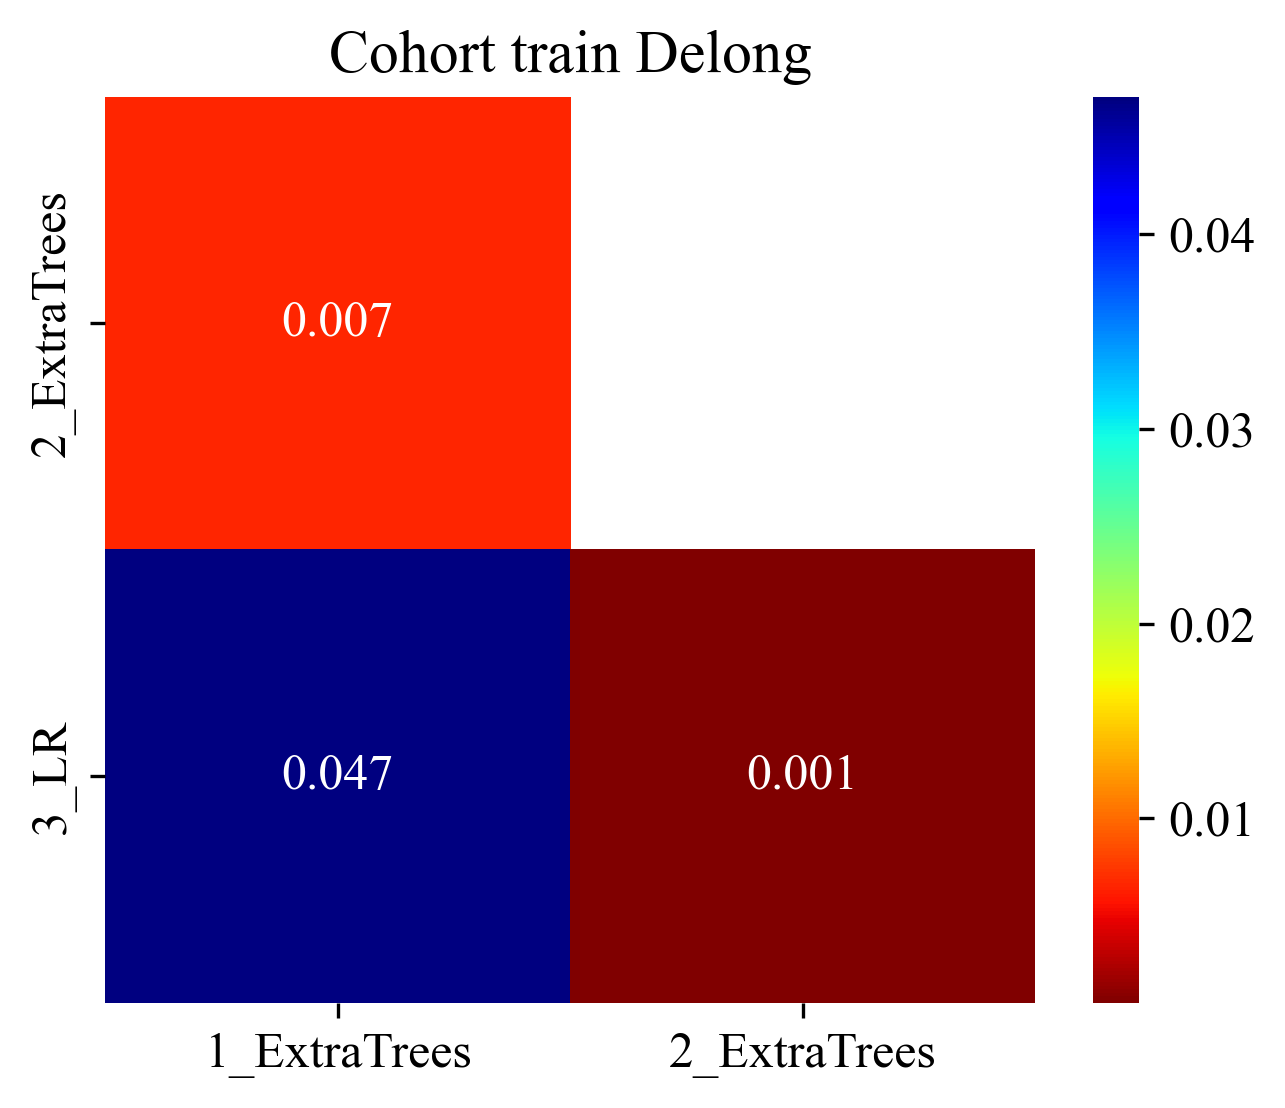

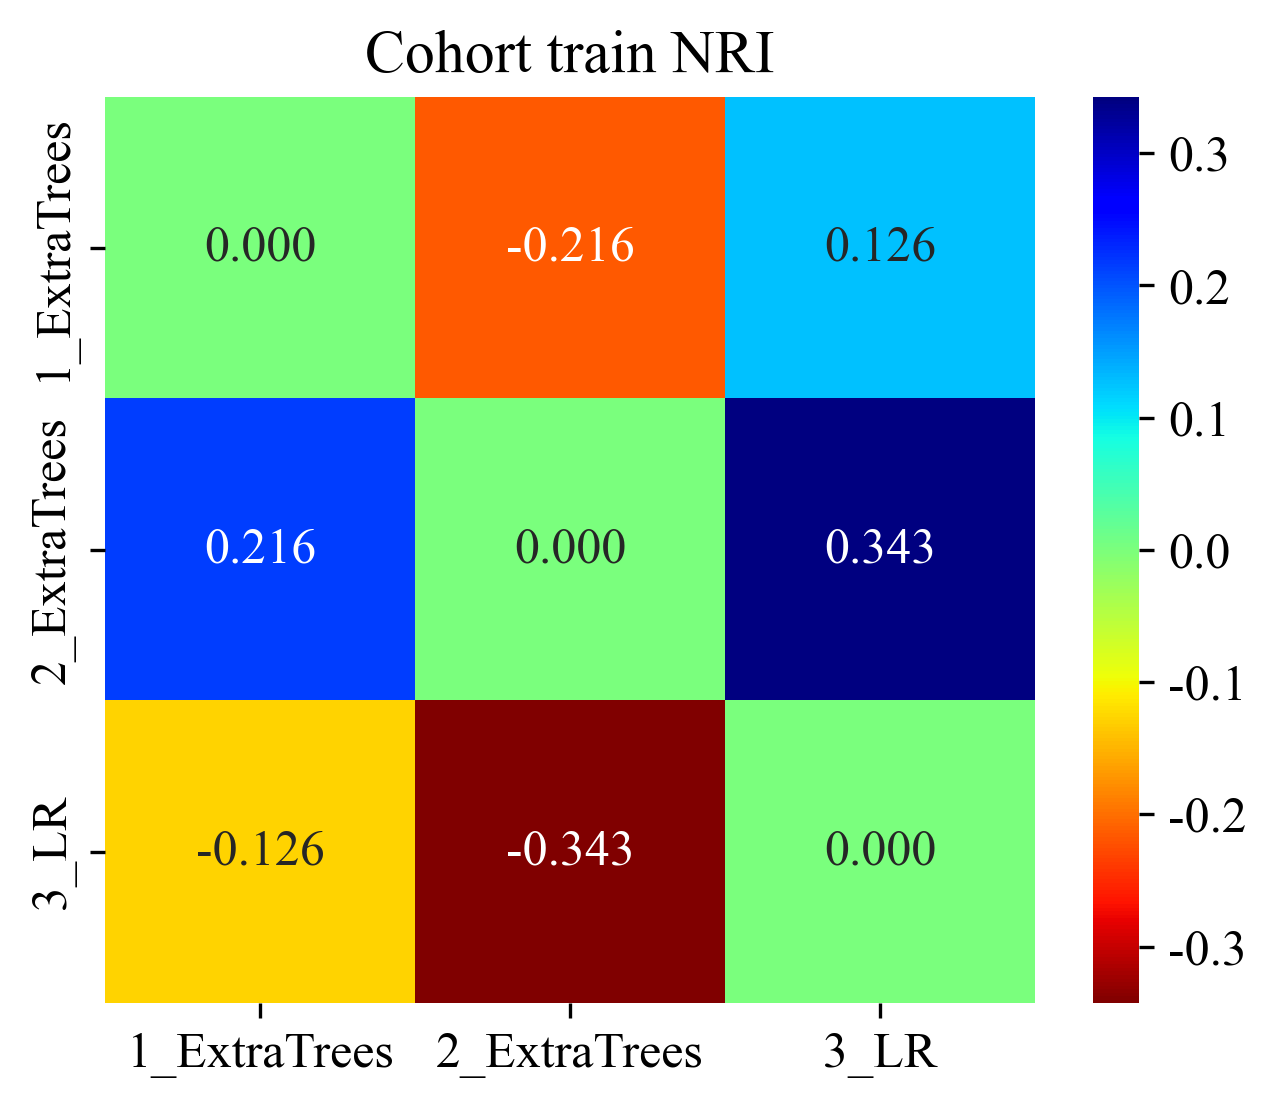

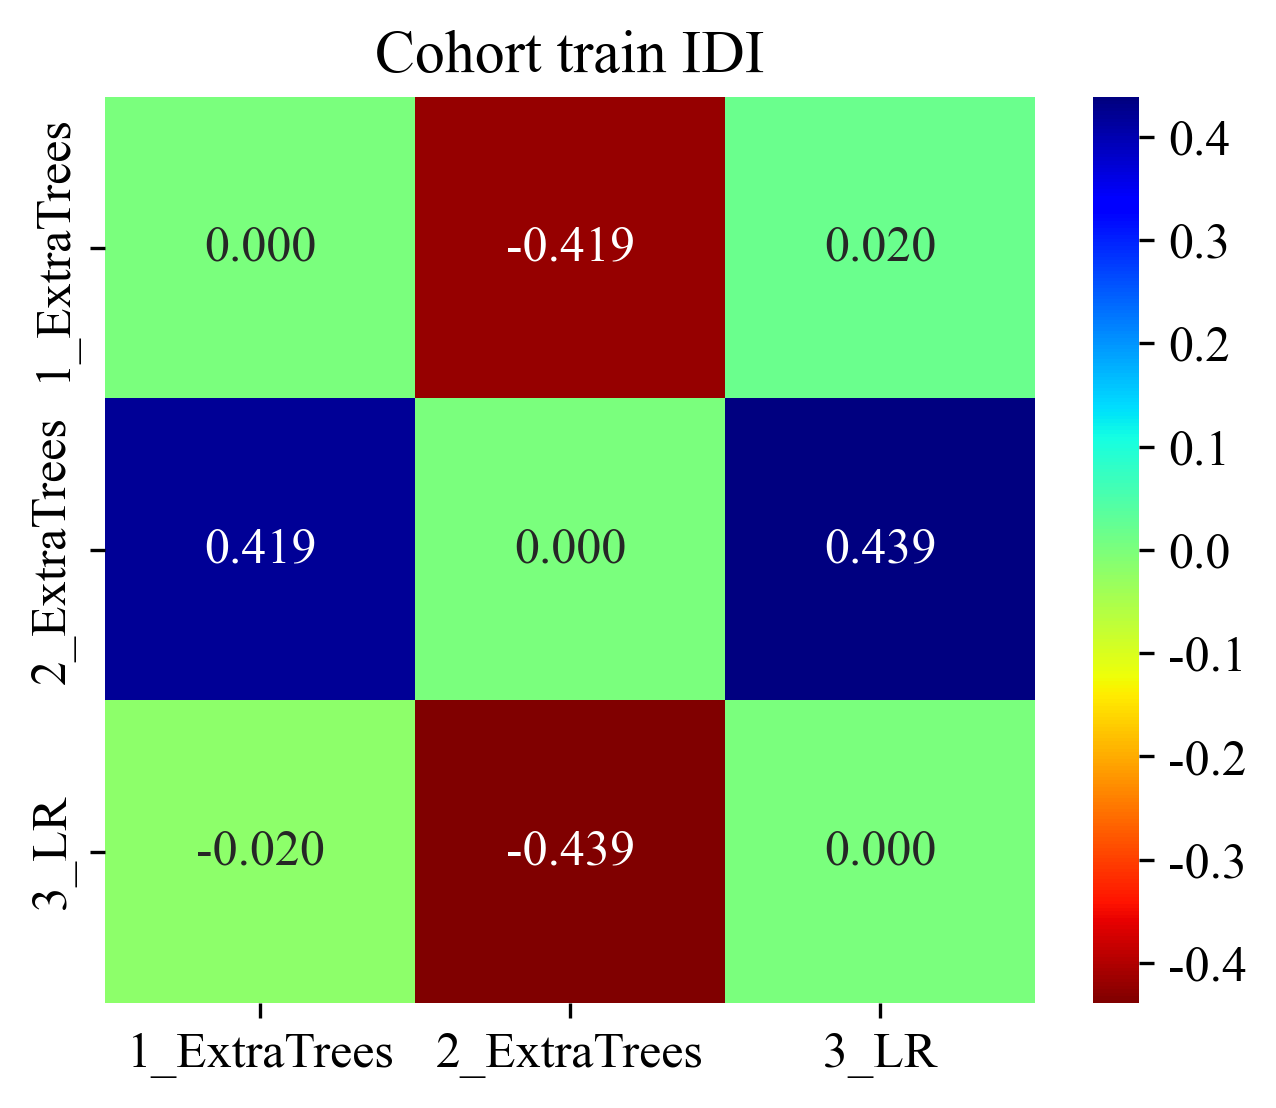

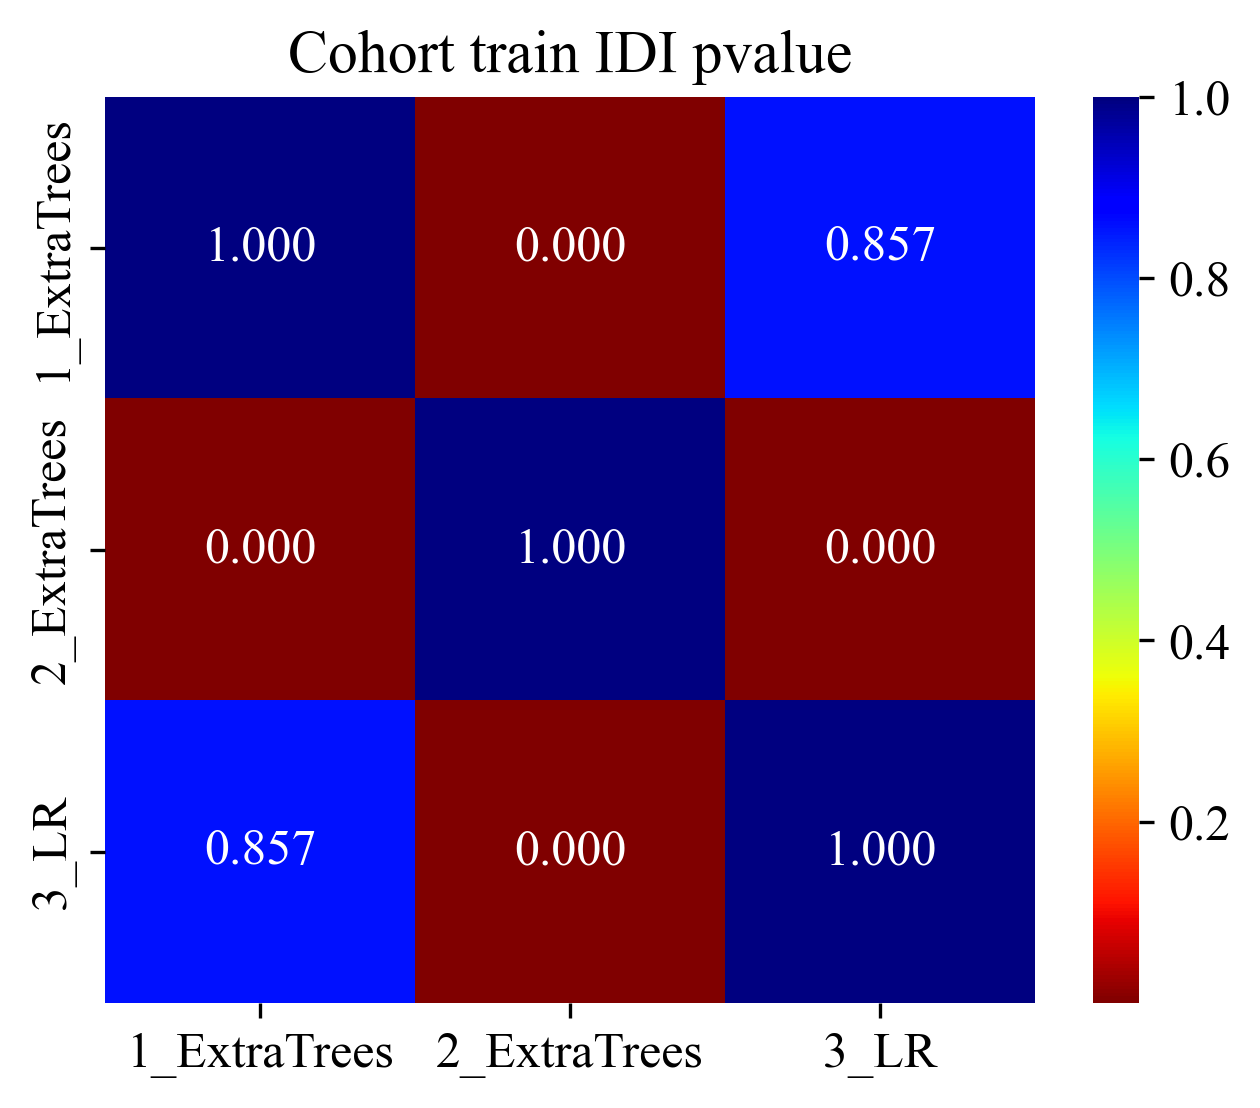

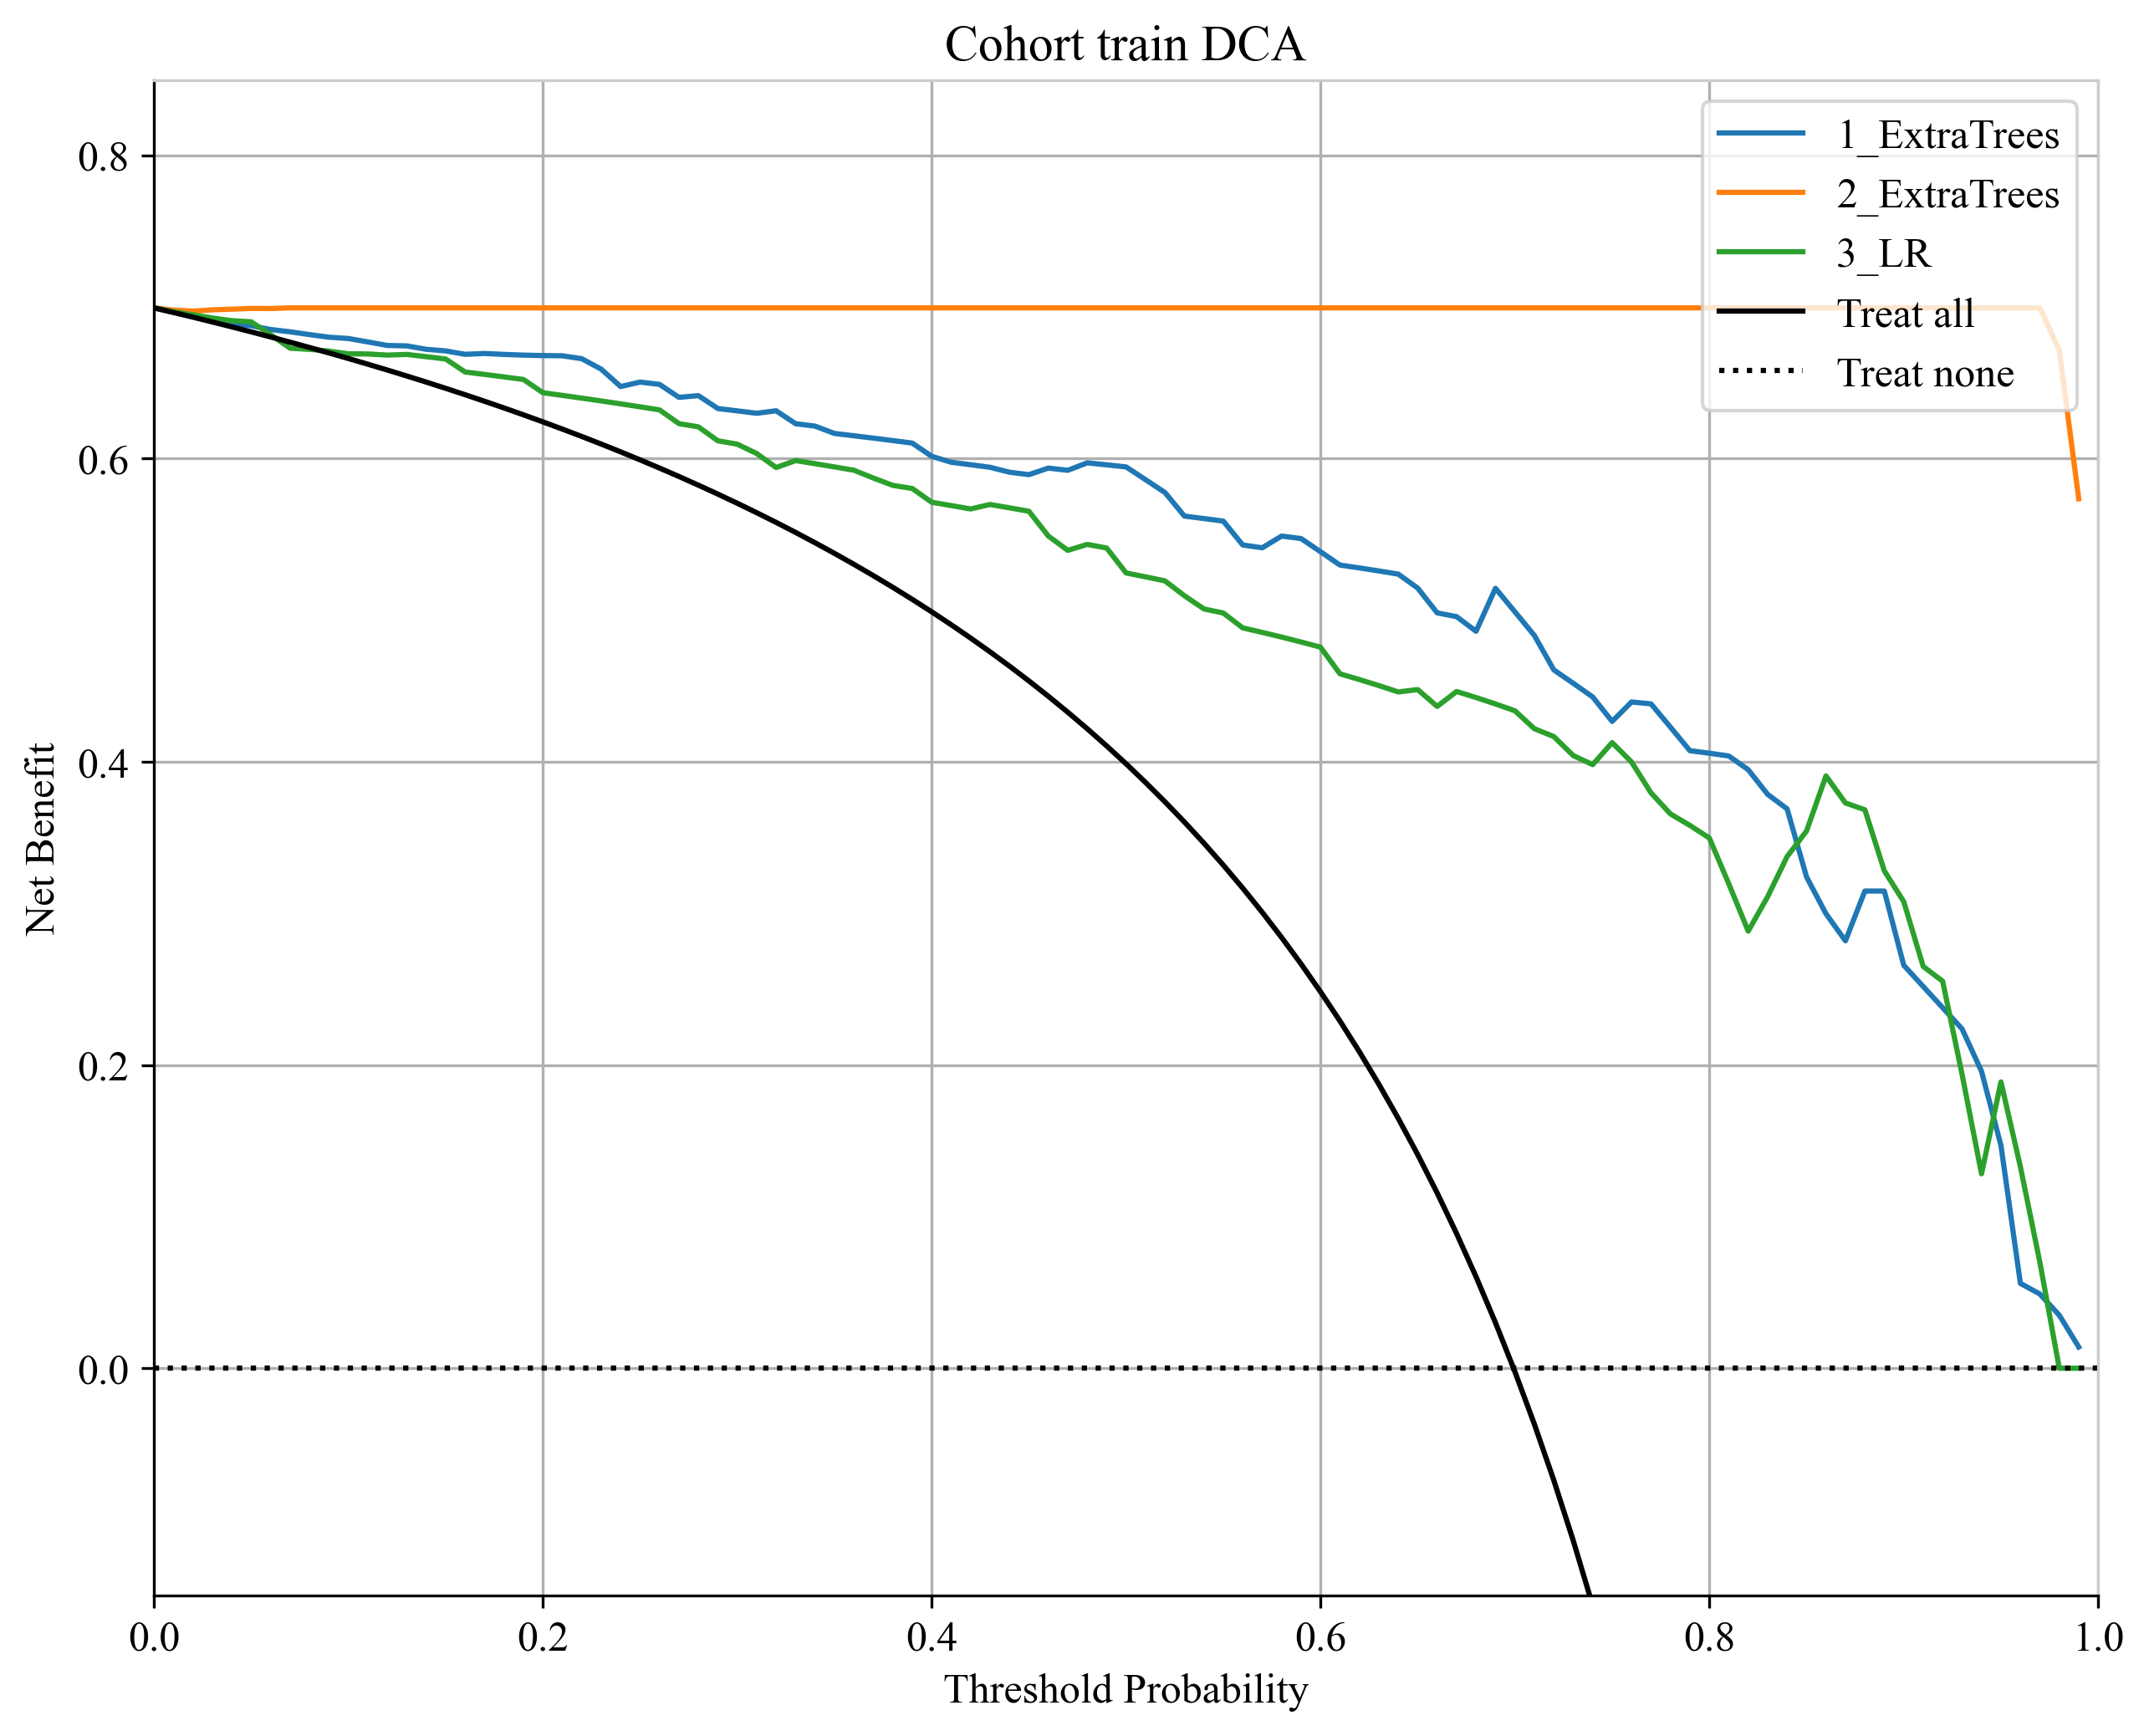

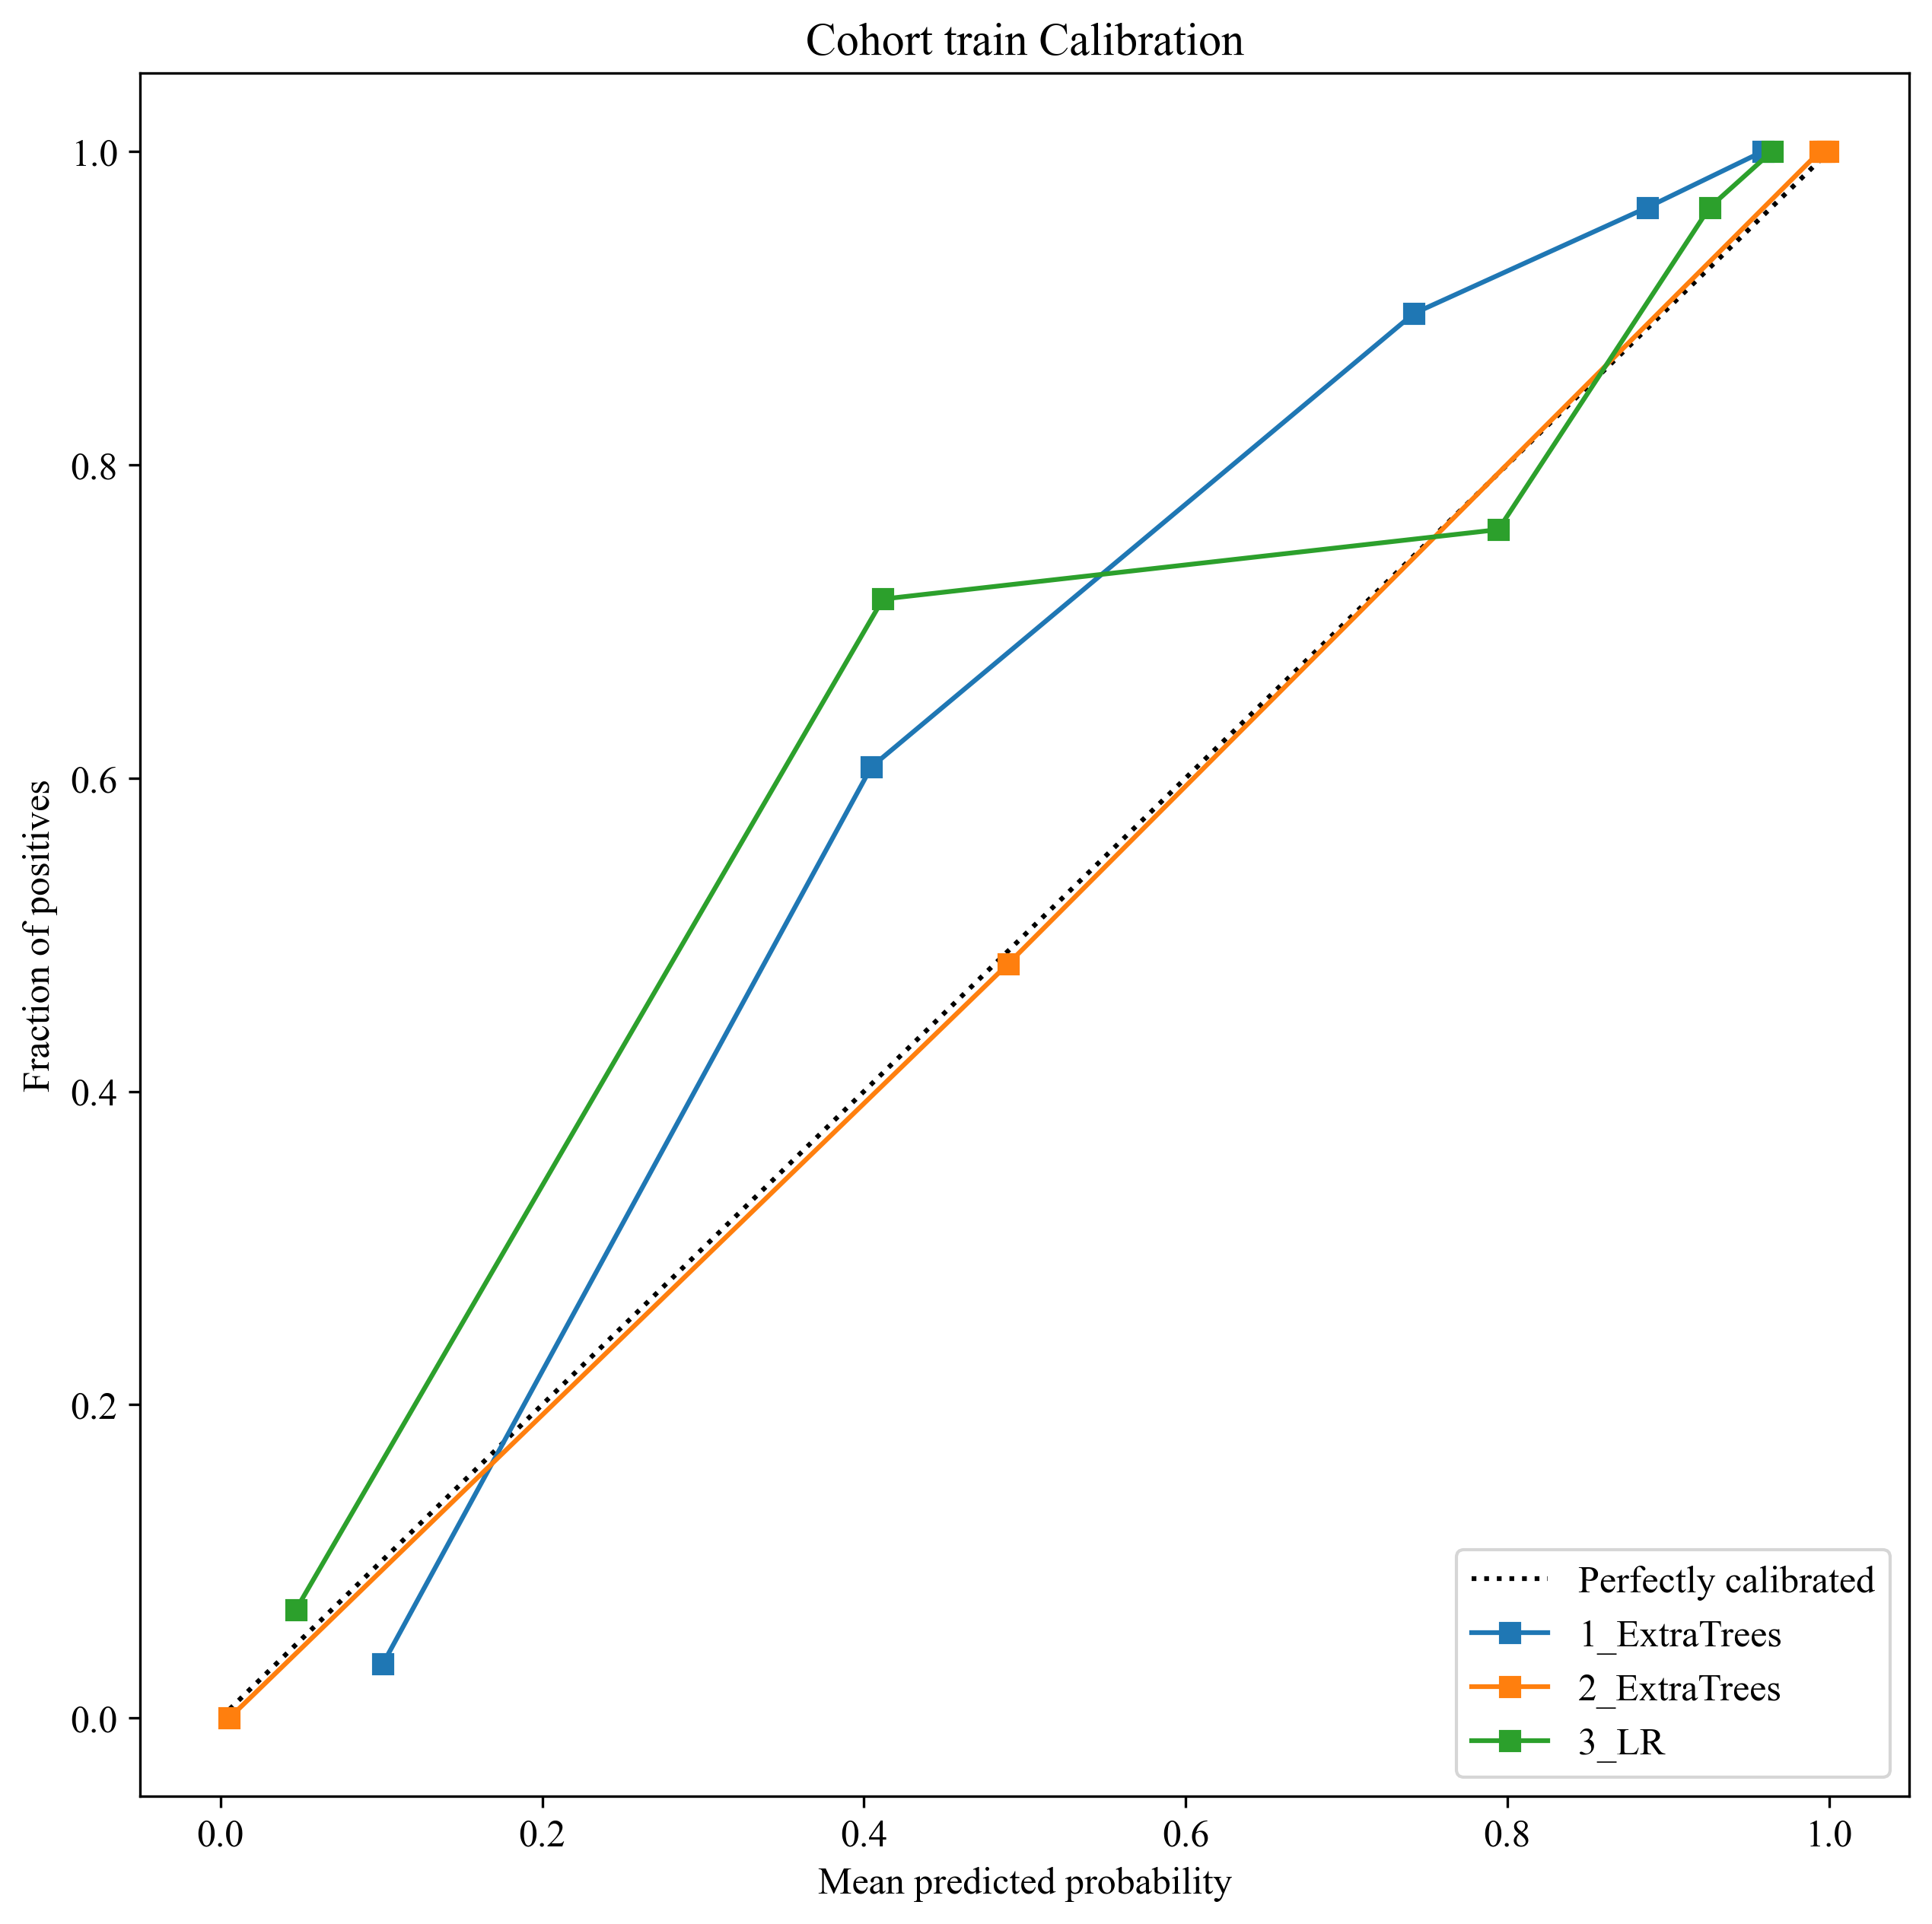

ID   -0_x  1_ExtraTrees   -0_y  2_ExtraTrees     -0   3_LR  \
0    10.nii.gz  0.572         0.428  0.117         0.883  0.997  0.003   
1   103.nii.gz  0.106         0.894  0.737         0.263  0.112  0.888   
2   109.nii.gz  0.065         0.935  0.000         1.000  0.021  0.979   
3    11.nii.gz  0.560         0.440  0.031         0.969  0.787  0.213   
4   112.nii.gz  0.083         0.917  0.000         1.000  0.036  0.964   
..         ...    ...           ...    ...           ...    ...    ...   
57    7.nii.gz  0.824         0.176  0.795         0.205  0.988  0.012   
58   74.nii.gz  0.732         0.268  0.970         0.030  0.807  0.193   
59   87.nii.gz  0.851         0.149  0.302         0.698  0.655  0.345   
60   92.nii.gz  0.556         0.444  0.489         0.511  0.667  0.333   
61   97.nii.gz  0.063         0.937  0.103         0.897  0.032  0.968   

    Enhancement_degree_  Contour  Pleural_invasion  Lymphadenopathy group  \
0                     1        2                 1                1   val   
1                     2        2                 1                1   val   
2                     1        2                 1                0   val   
3                     2        2                 1                1   val   
4                     0        2                 1                0   val   
..                  ...      ...               ...              ...   ...   
57                    1        1                 0                1   val   
58                    2        2                 1                0   val   
59                    2        1                 0                1   val   
60                    0        0                 0                1   val   
61                    2        2                 1                1   val   

    label  
0       1  
1       1  
2       1  
3       1  
4       1  
..    ...  
57      0  
58      1  
59      1  
60      0  
61      1  

[62 rows x 13 columns]

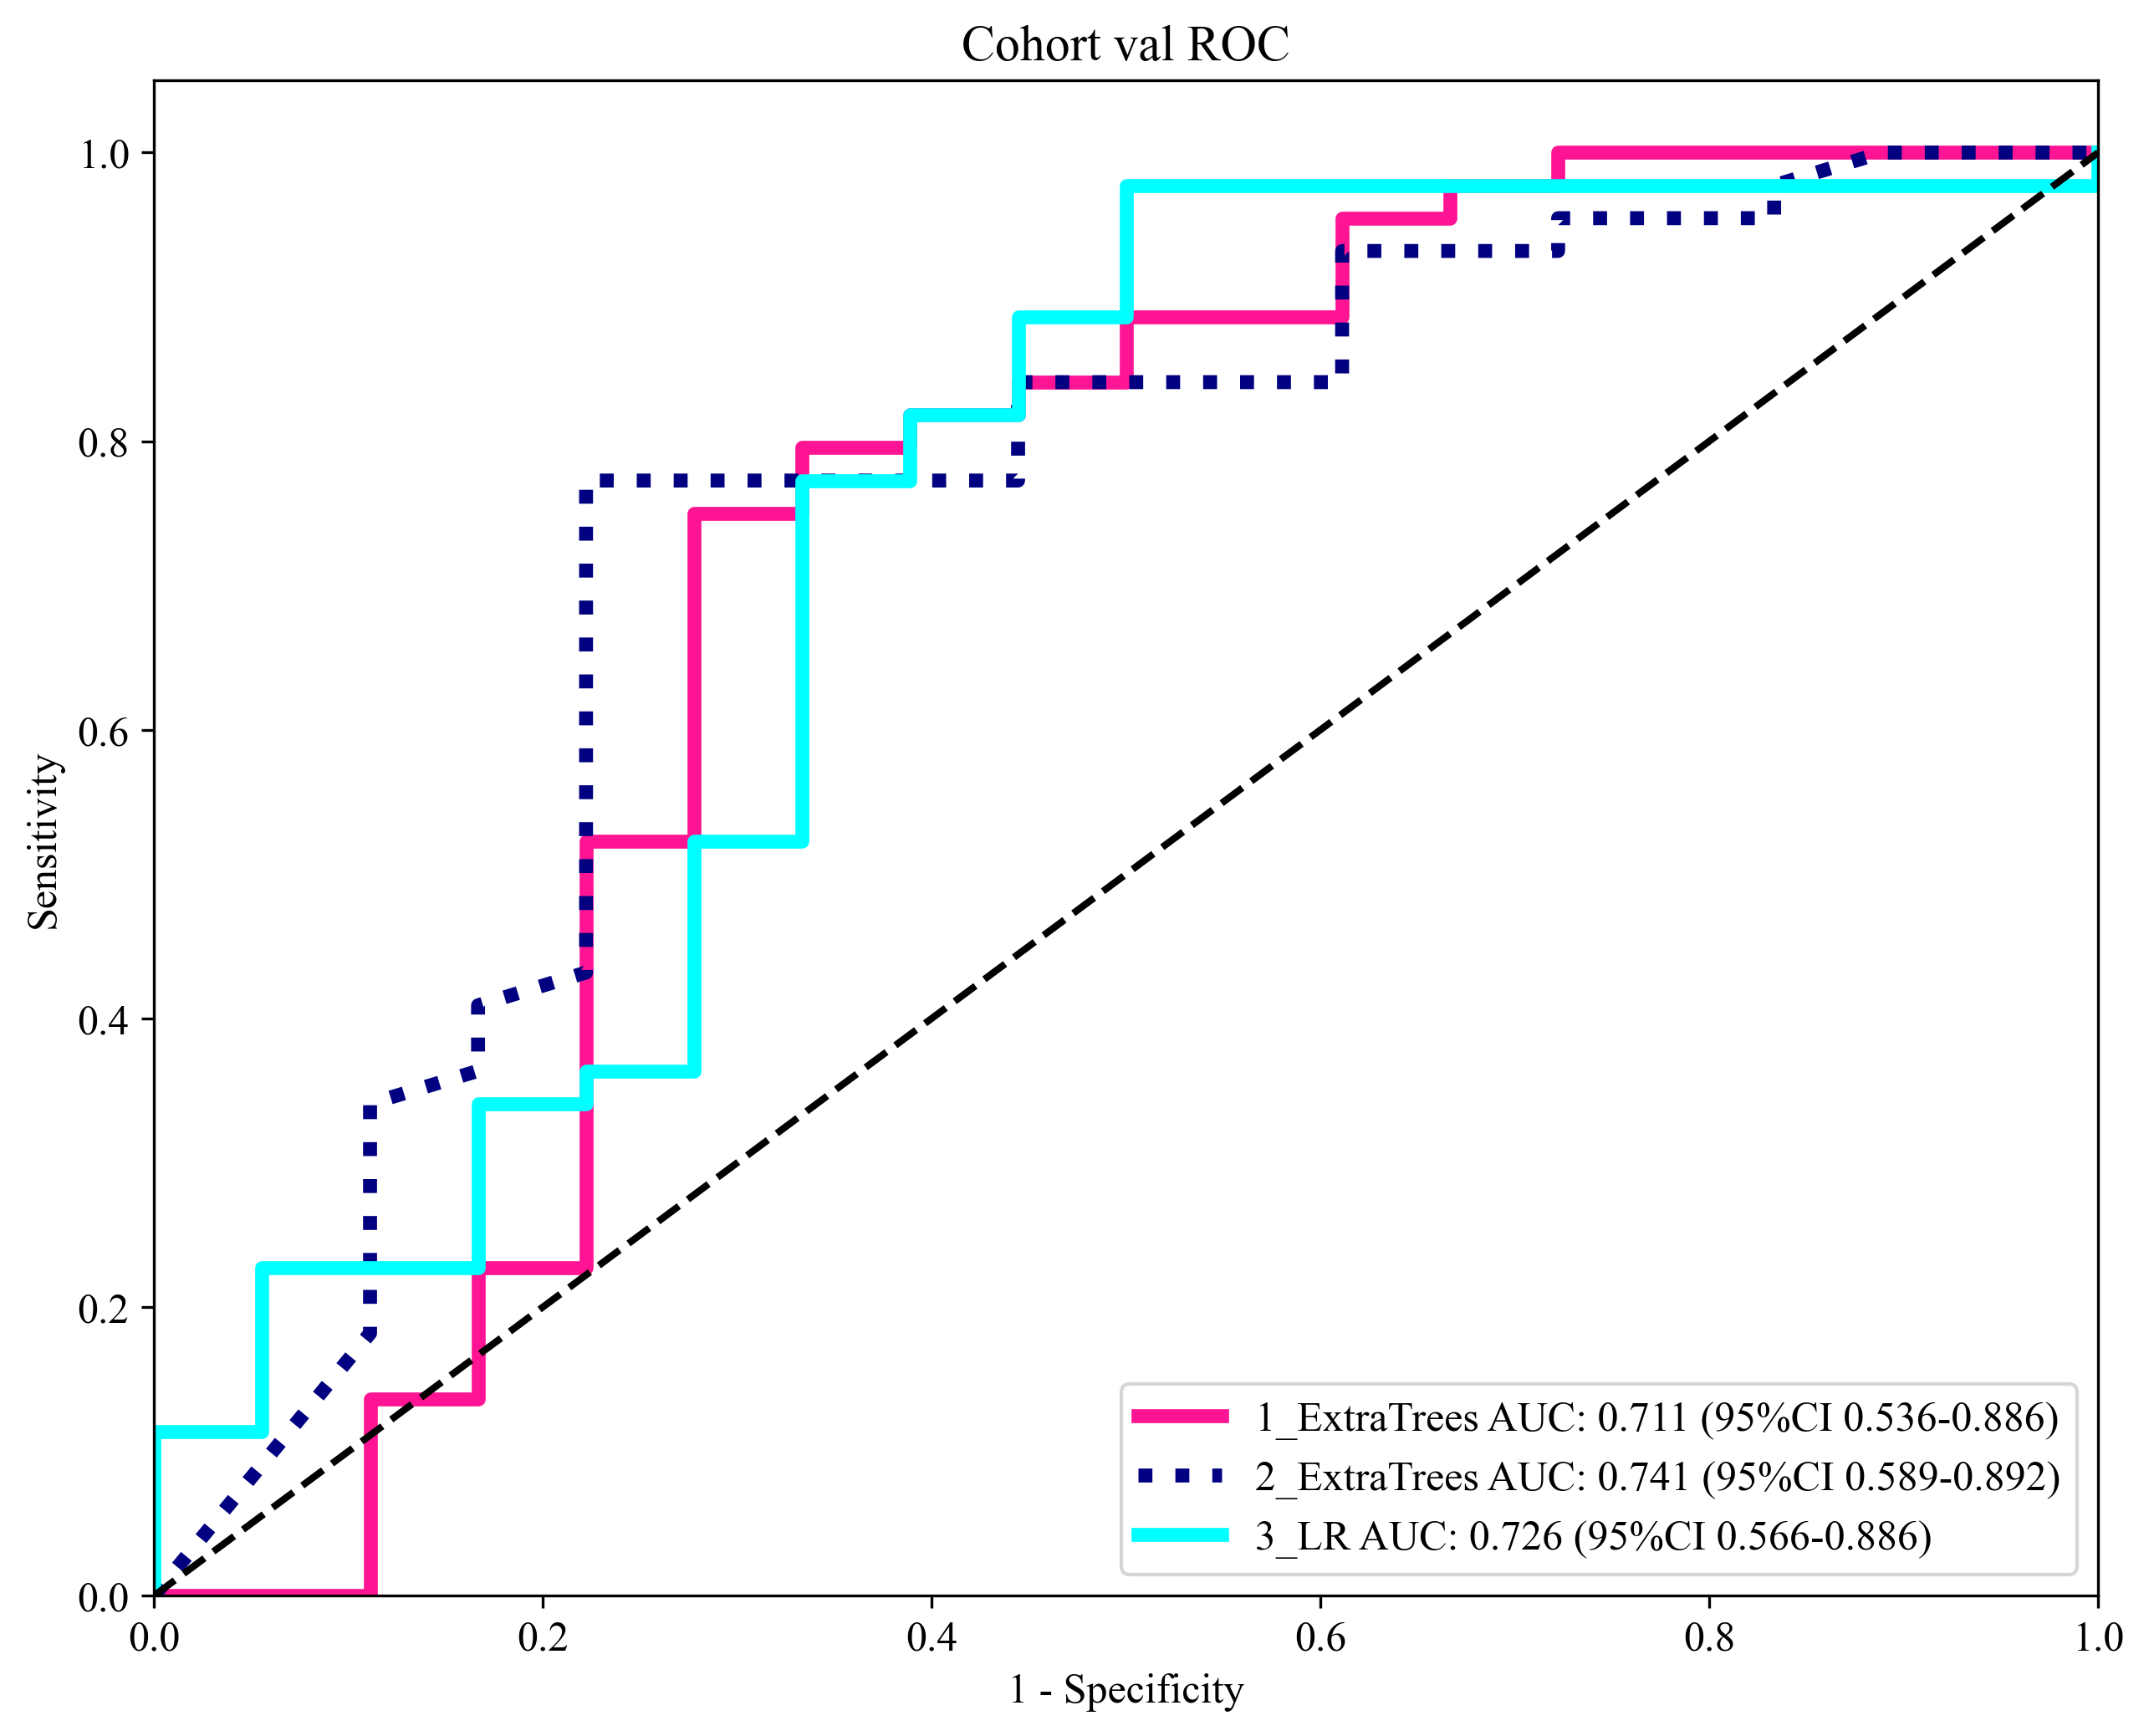

Signature  Accuracy    AUC           95% CI  Sensitivity  Specificity  \
0  1_ExtraTrees     0.895  0.950  0.9147 - 0.9863        0.900        0.884   
1  2_ExtraTrees     1.000  1.000  1.0000 - 1.0000        1.000        1.000   
2          3_LR     0.853  0.910  0.8585 - 0.9606        0.890        0.767   
3  1_ExtraTrees     0.742  0.711  0.5362 - 0.8856        0.750        0.722   
4  2_ExtraTrees     0.774  0.741  0.5892 - 0.8918        0.773        0.778   
5          3_LR     0.839  0.726  0.5656 - 0.8864        0.977        0.500   

     PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0  0.947  0.792      0.947   0.900  0.923      0.506  train  
1  1.000  1.000      1.000   1.000  1.000      0.971  train  
2  0.899  0.750      0.899   0.890  0.894      0.453  train  
3  0.868  0.542      0.868   0.750  0.805      0.638    val  
4  0.895  0.583      0.895   0.773  0.829      0.578    val  
5  0.827  0.900      0.827   0.977  0.896      0.193    val

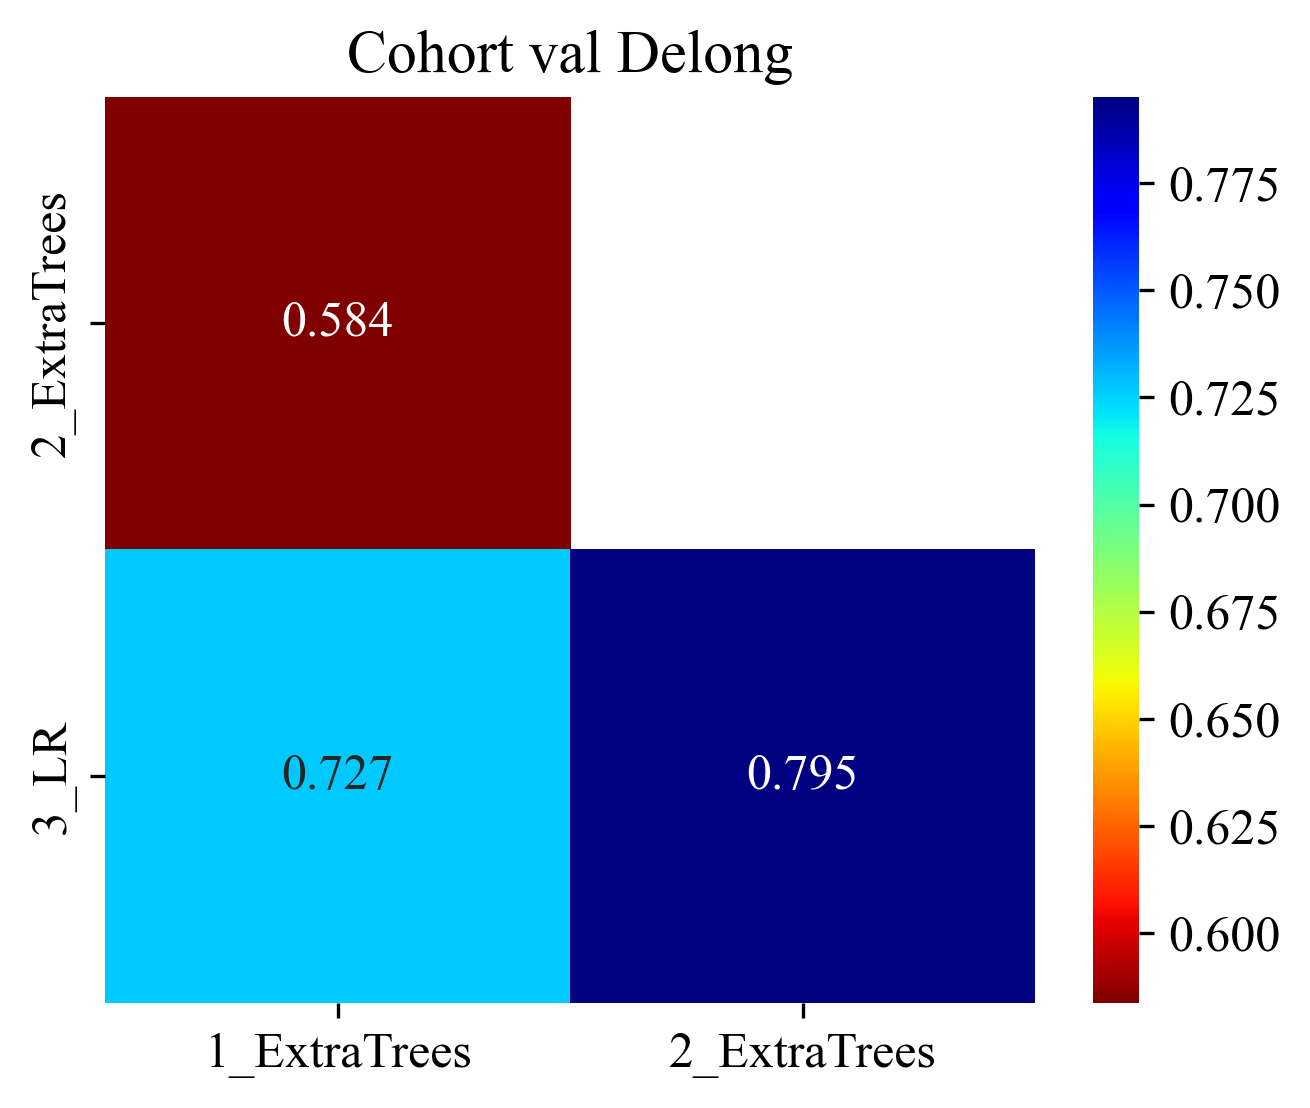

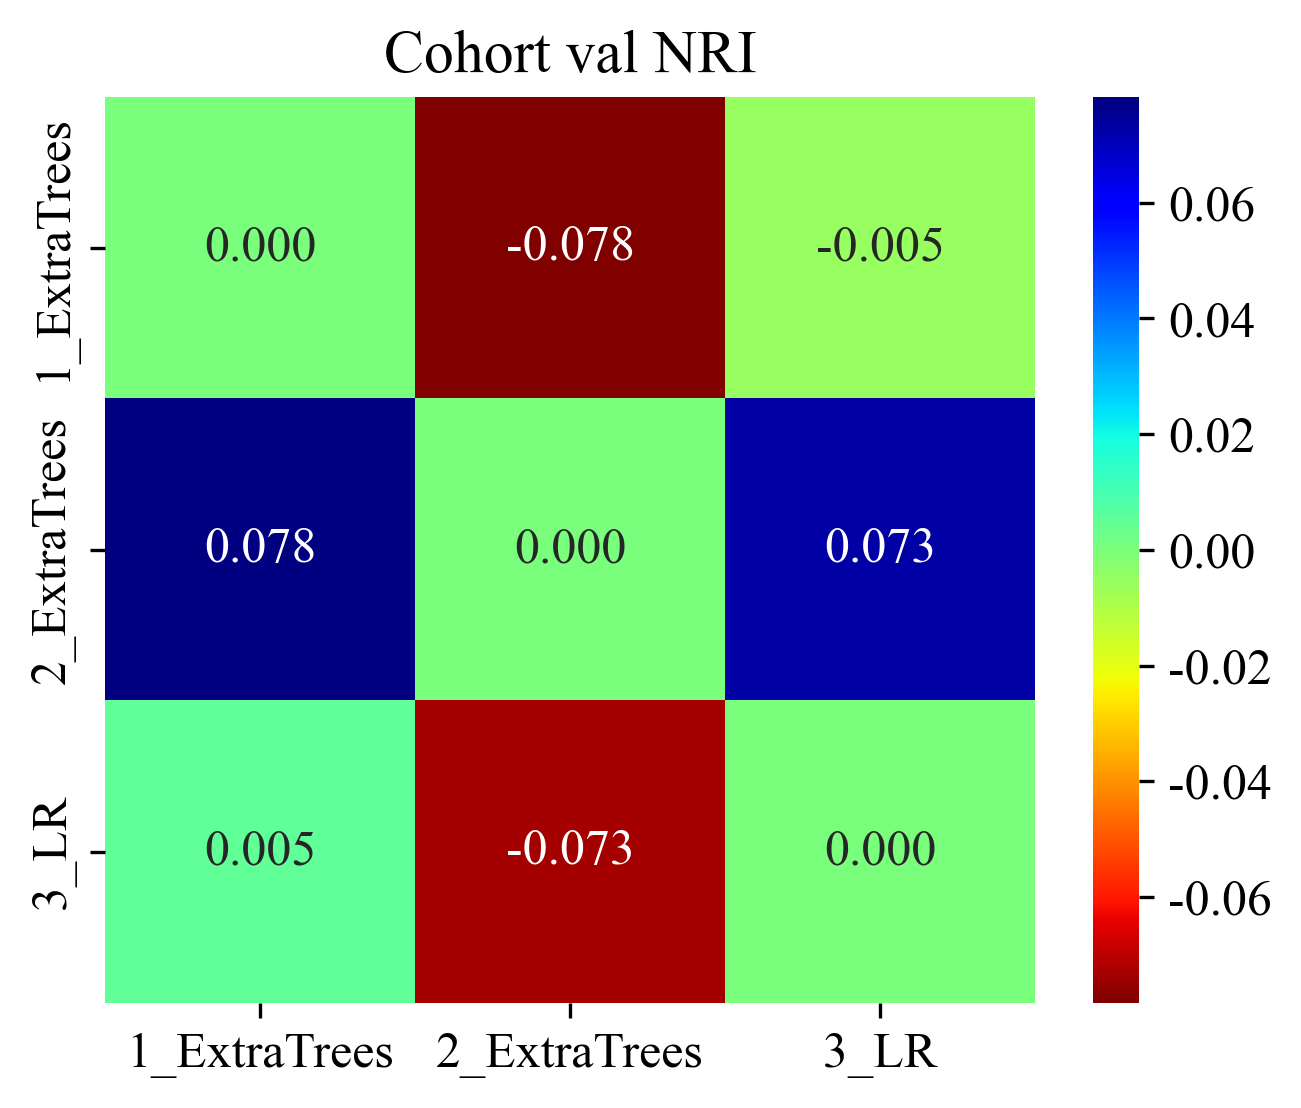

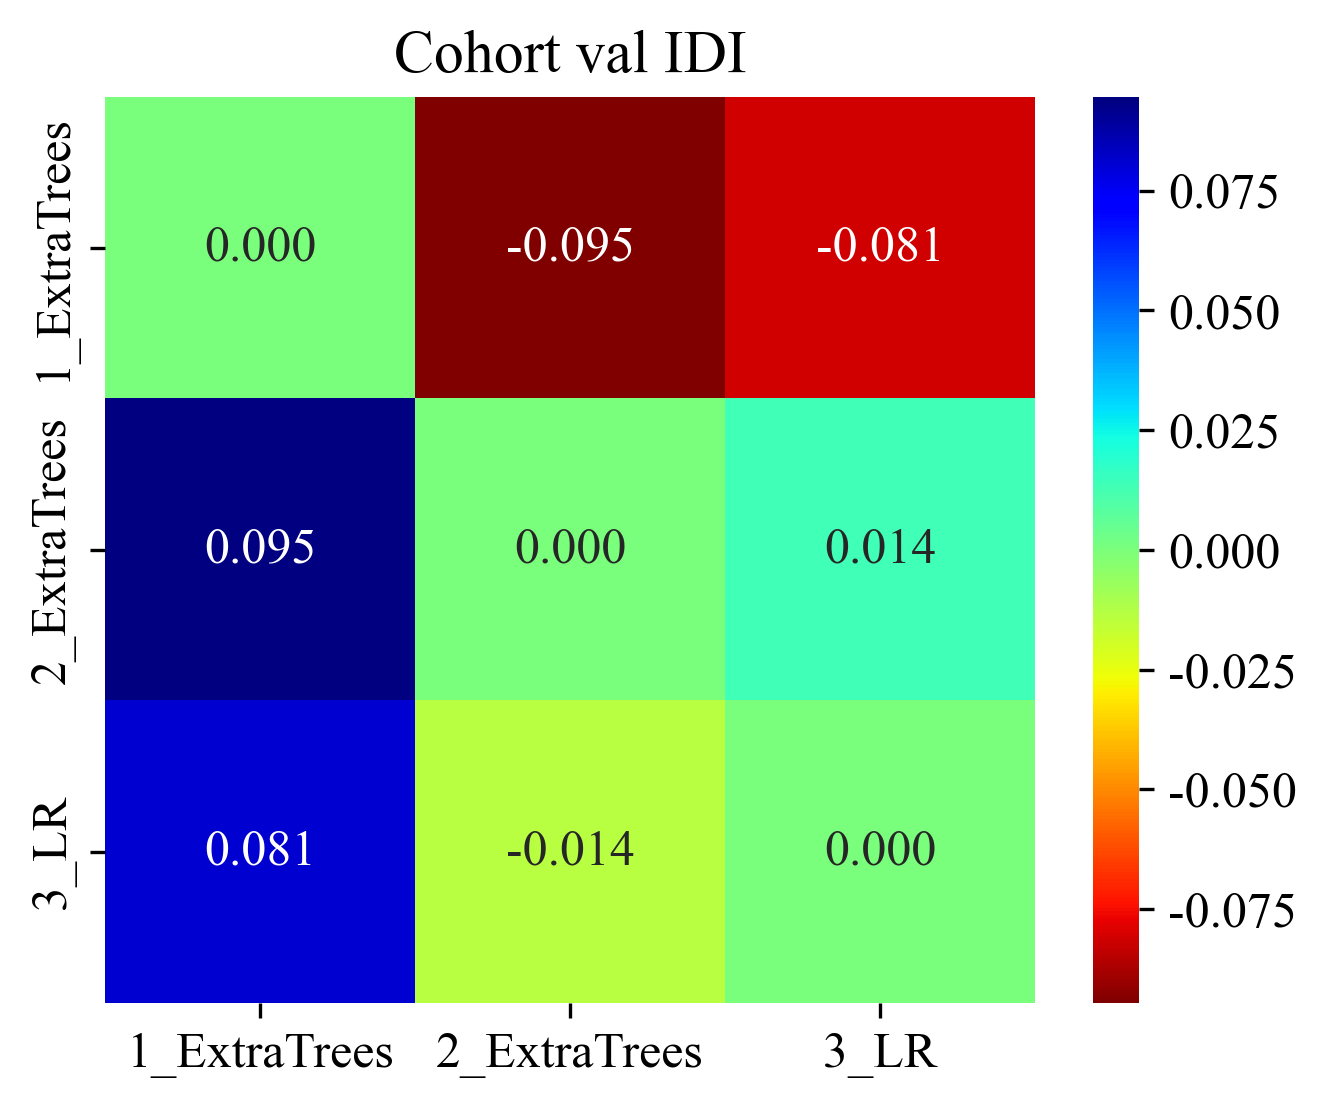

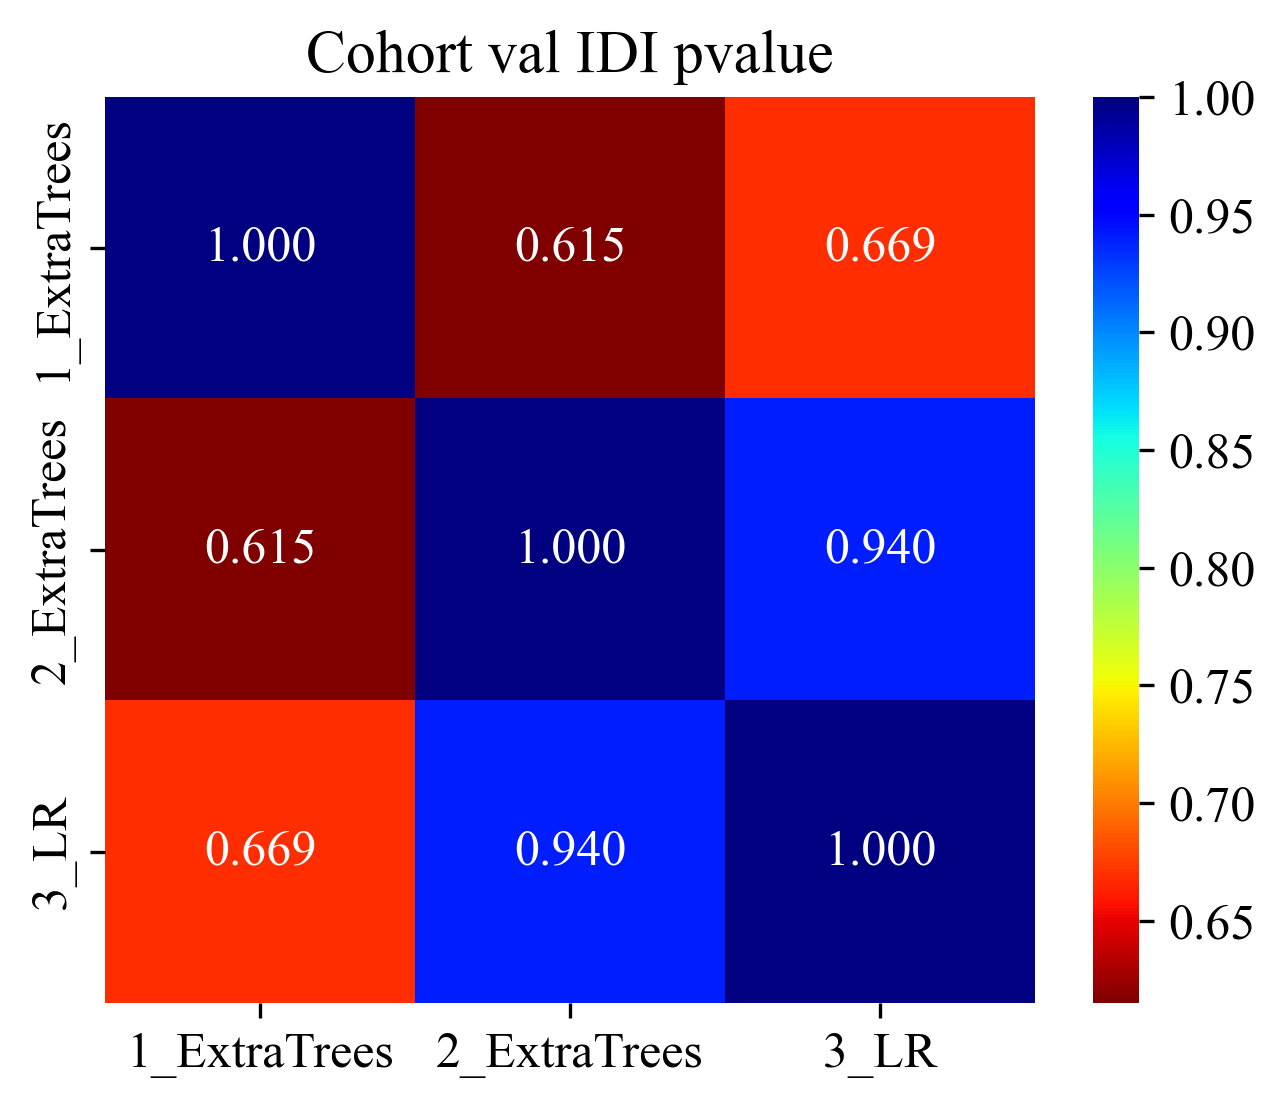

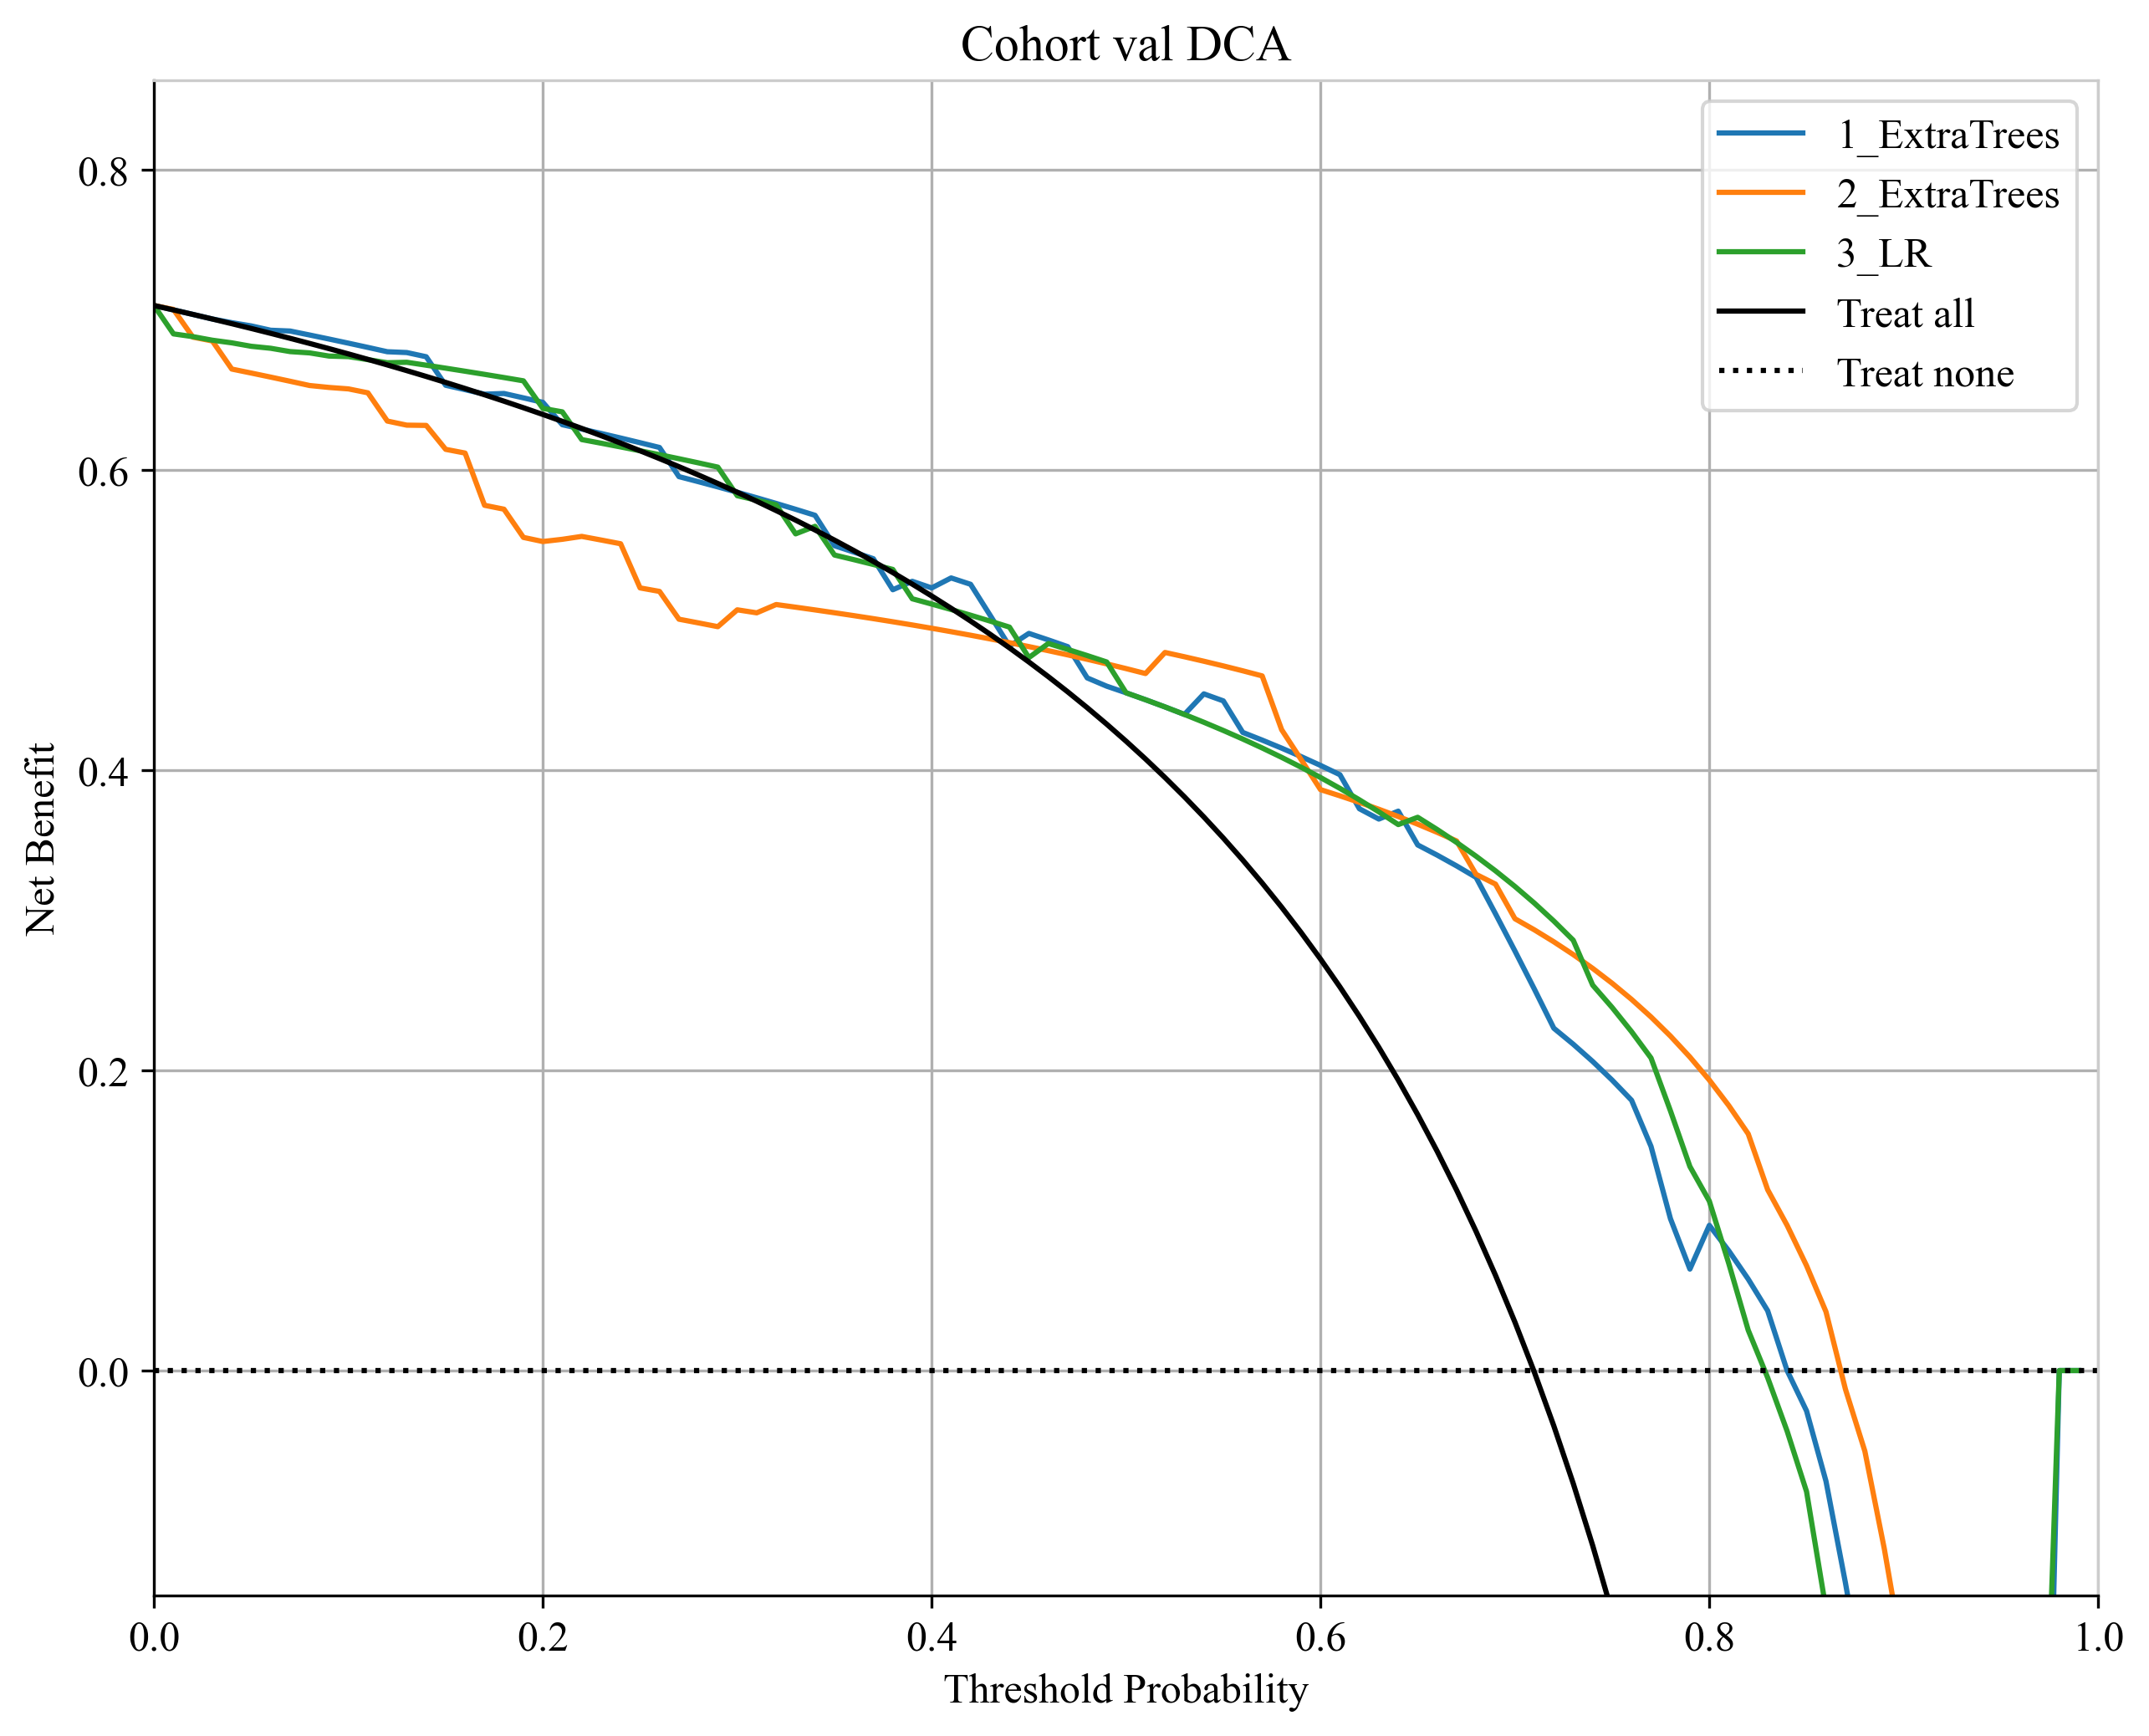

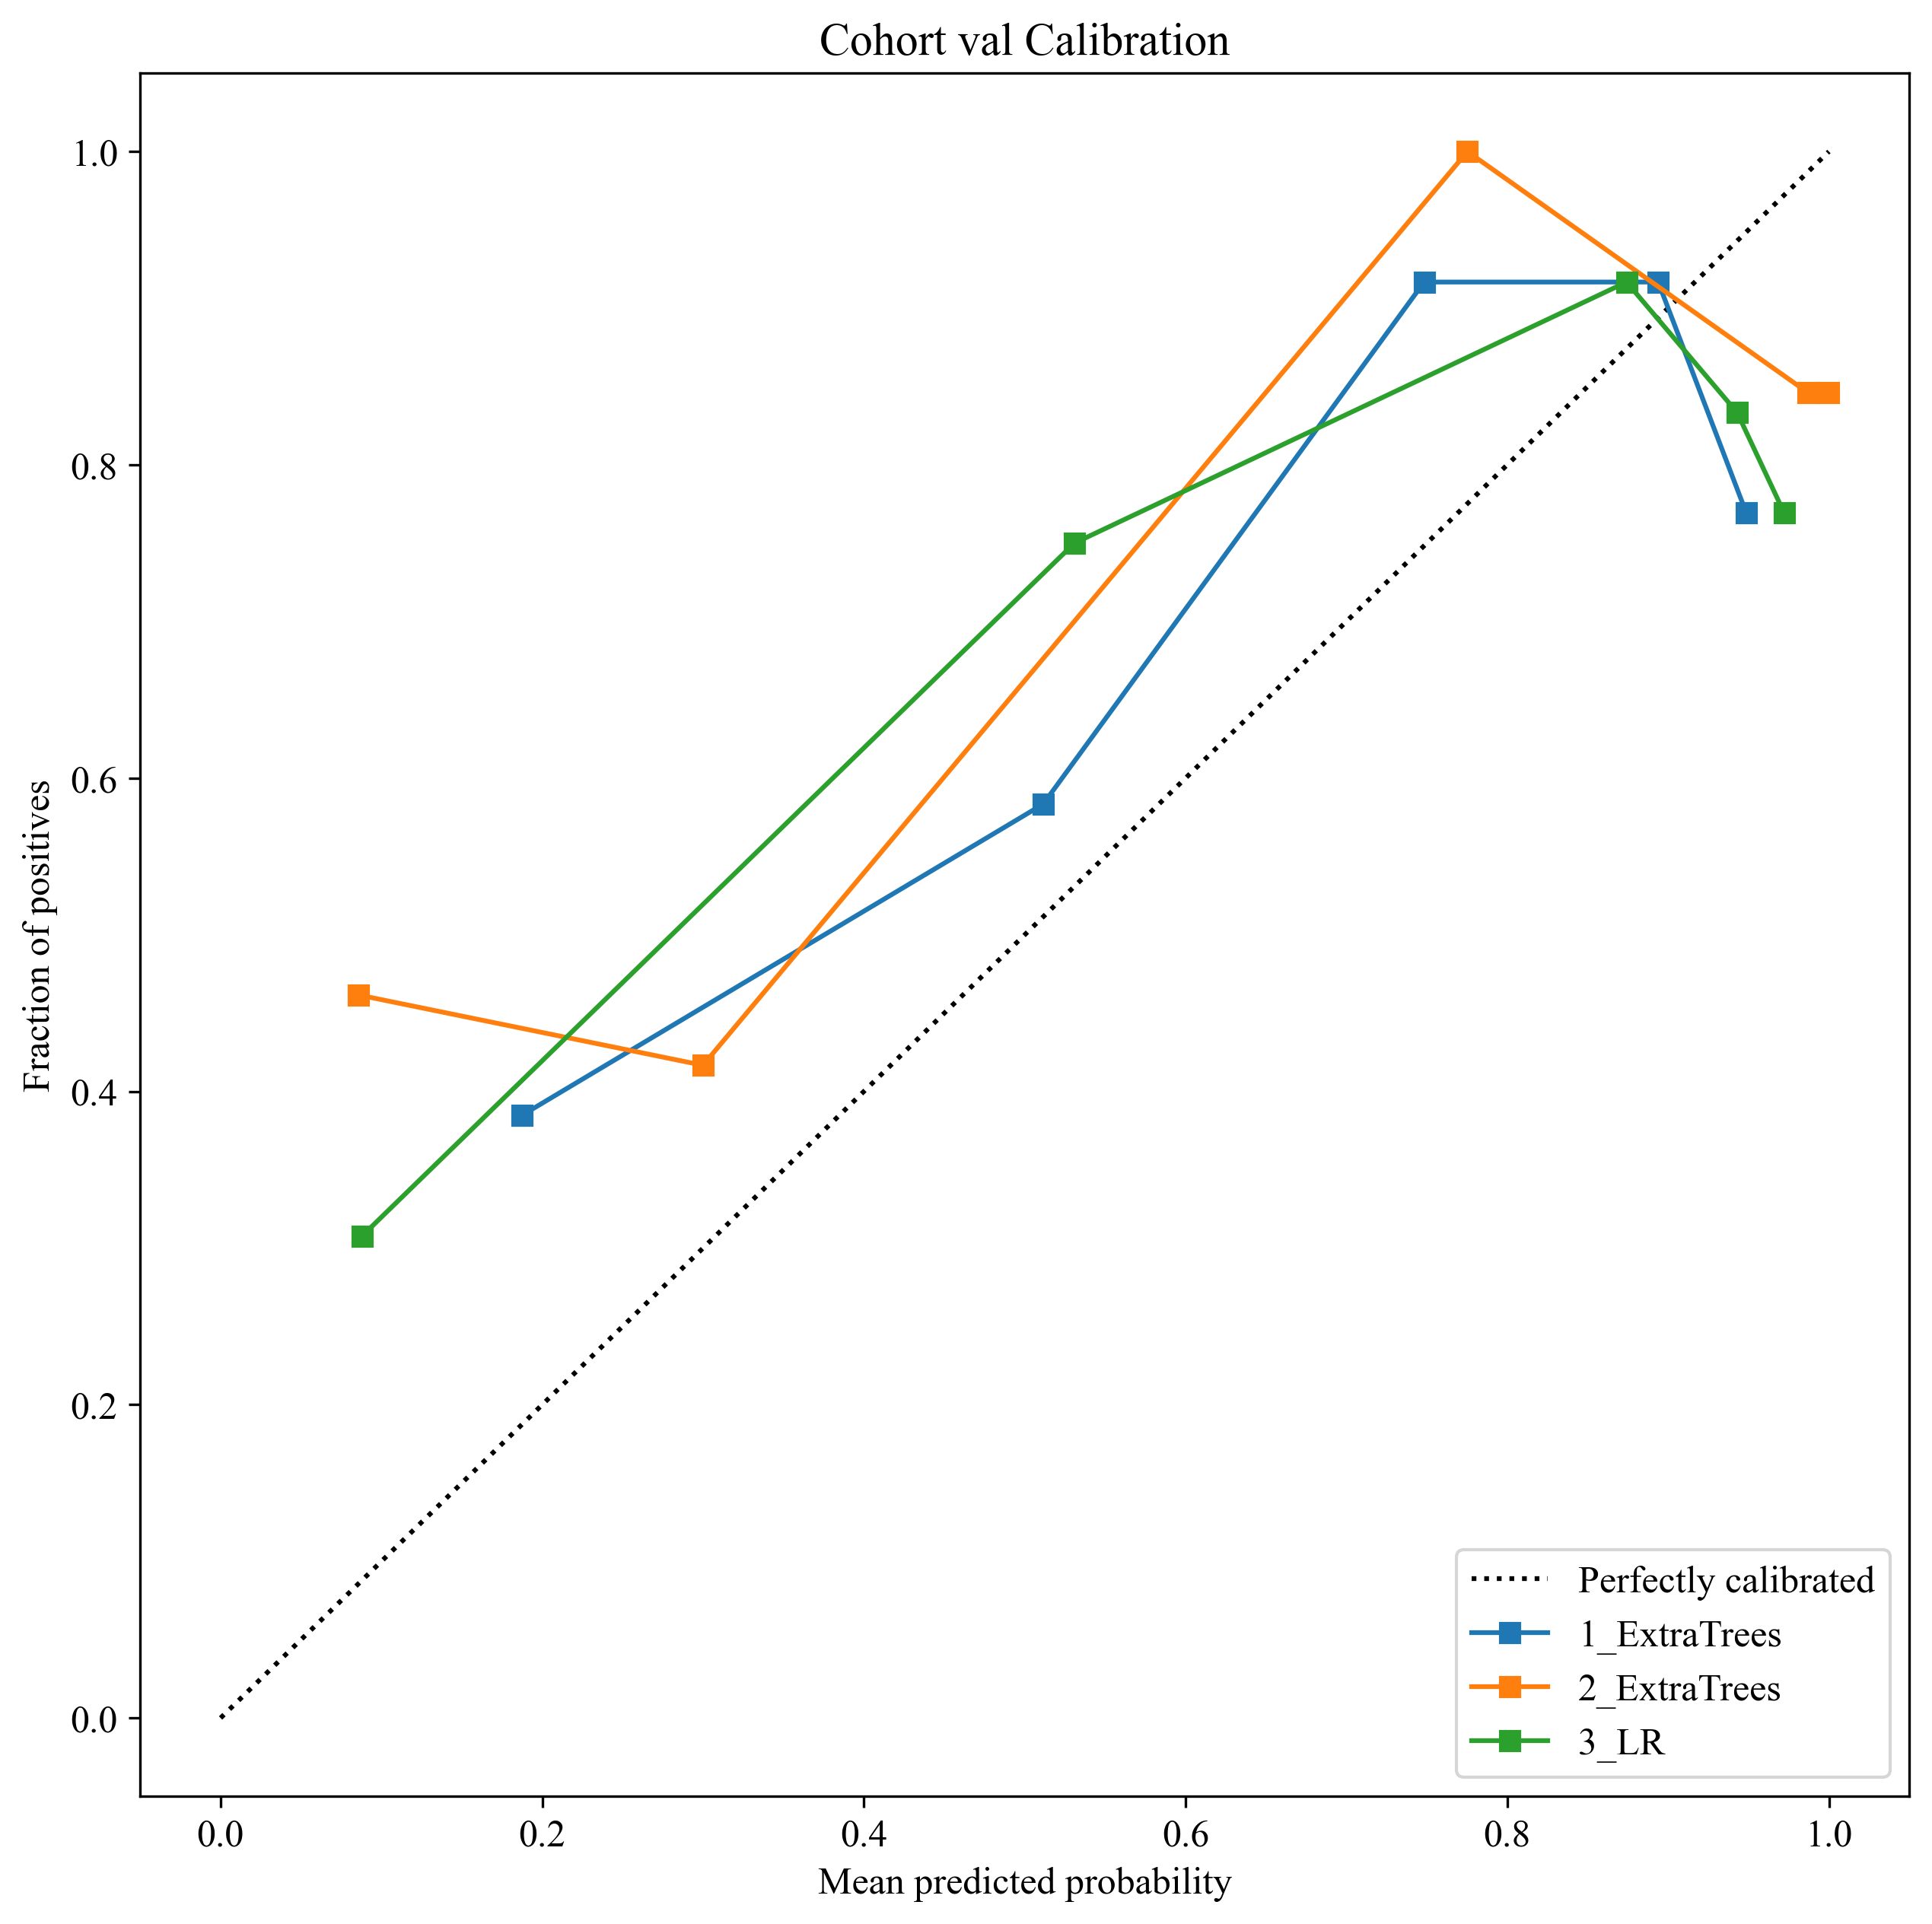

ID   -0_x  1_ExtraTrees   -0_y  2_ExtraTrees     -0   3_LR  \
0   251.nii.gz  0.449         0.551  0.002         0.998  0.318  0.682   
1   252.nii.gz  0.734         0.266  0.839         0.161  0.535  0.465   
2   253.nii.gz  0.927         0.073  0.431         0.569  0.832  0.168   
3   254.nii.gz  0.896         0.104  0.098         0.902  0.780  0.220   
4   255.nii.gz  0.513         0.487  0.748         0.252  0.977  0.023   
..         ...    ...           ...    ...           ...    ...    ...   
78  334.nii.gz  0.245         0.755  0.401         0.599  0.255  0.745   
79  335.nii.gz  0.156         0.844  0.033         0.967  0.031  0.969   
80  336.nii.gz  0.888         0.112  0.885         0.115  0.585  0.415   
81  339.nii.gz  0.141         0.859  0.039         0.961  0.088  0.912   
82  340.nii.gz  0.251         0.749  0.137         0.863  0.039  0.961   

    Enhancement_degree_  Contour  Pleural_invasion  Lymphadenopathy  group  \
0                     1        0                 0                0  test1   
1                     2        0                 1                0  test1   
2                     2        0                 0                0  test1   
3                     2        0                 1                0  test1   
4                     0        2                 1                0  test1   
..                  ...      ...               ...              ...    ...   
78                    1        0                 0                0  test1   
79                    1        2                 0                0  test1   
80                    0        0                 0                0  test1   
81                    1        2                 1                0  test1   
82                    0        2                 0                0  test1   

    label  
0       0  
1       0  
2       0  
3       0  
4       0  
..    ...  
78      0  
79      1  
80      0  
81      1  
82      1  

[83 rows x 13 columns]

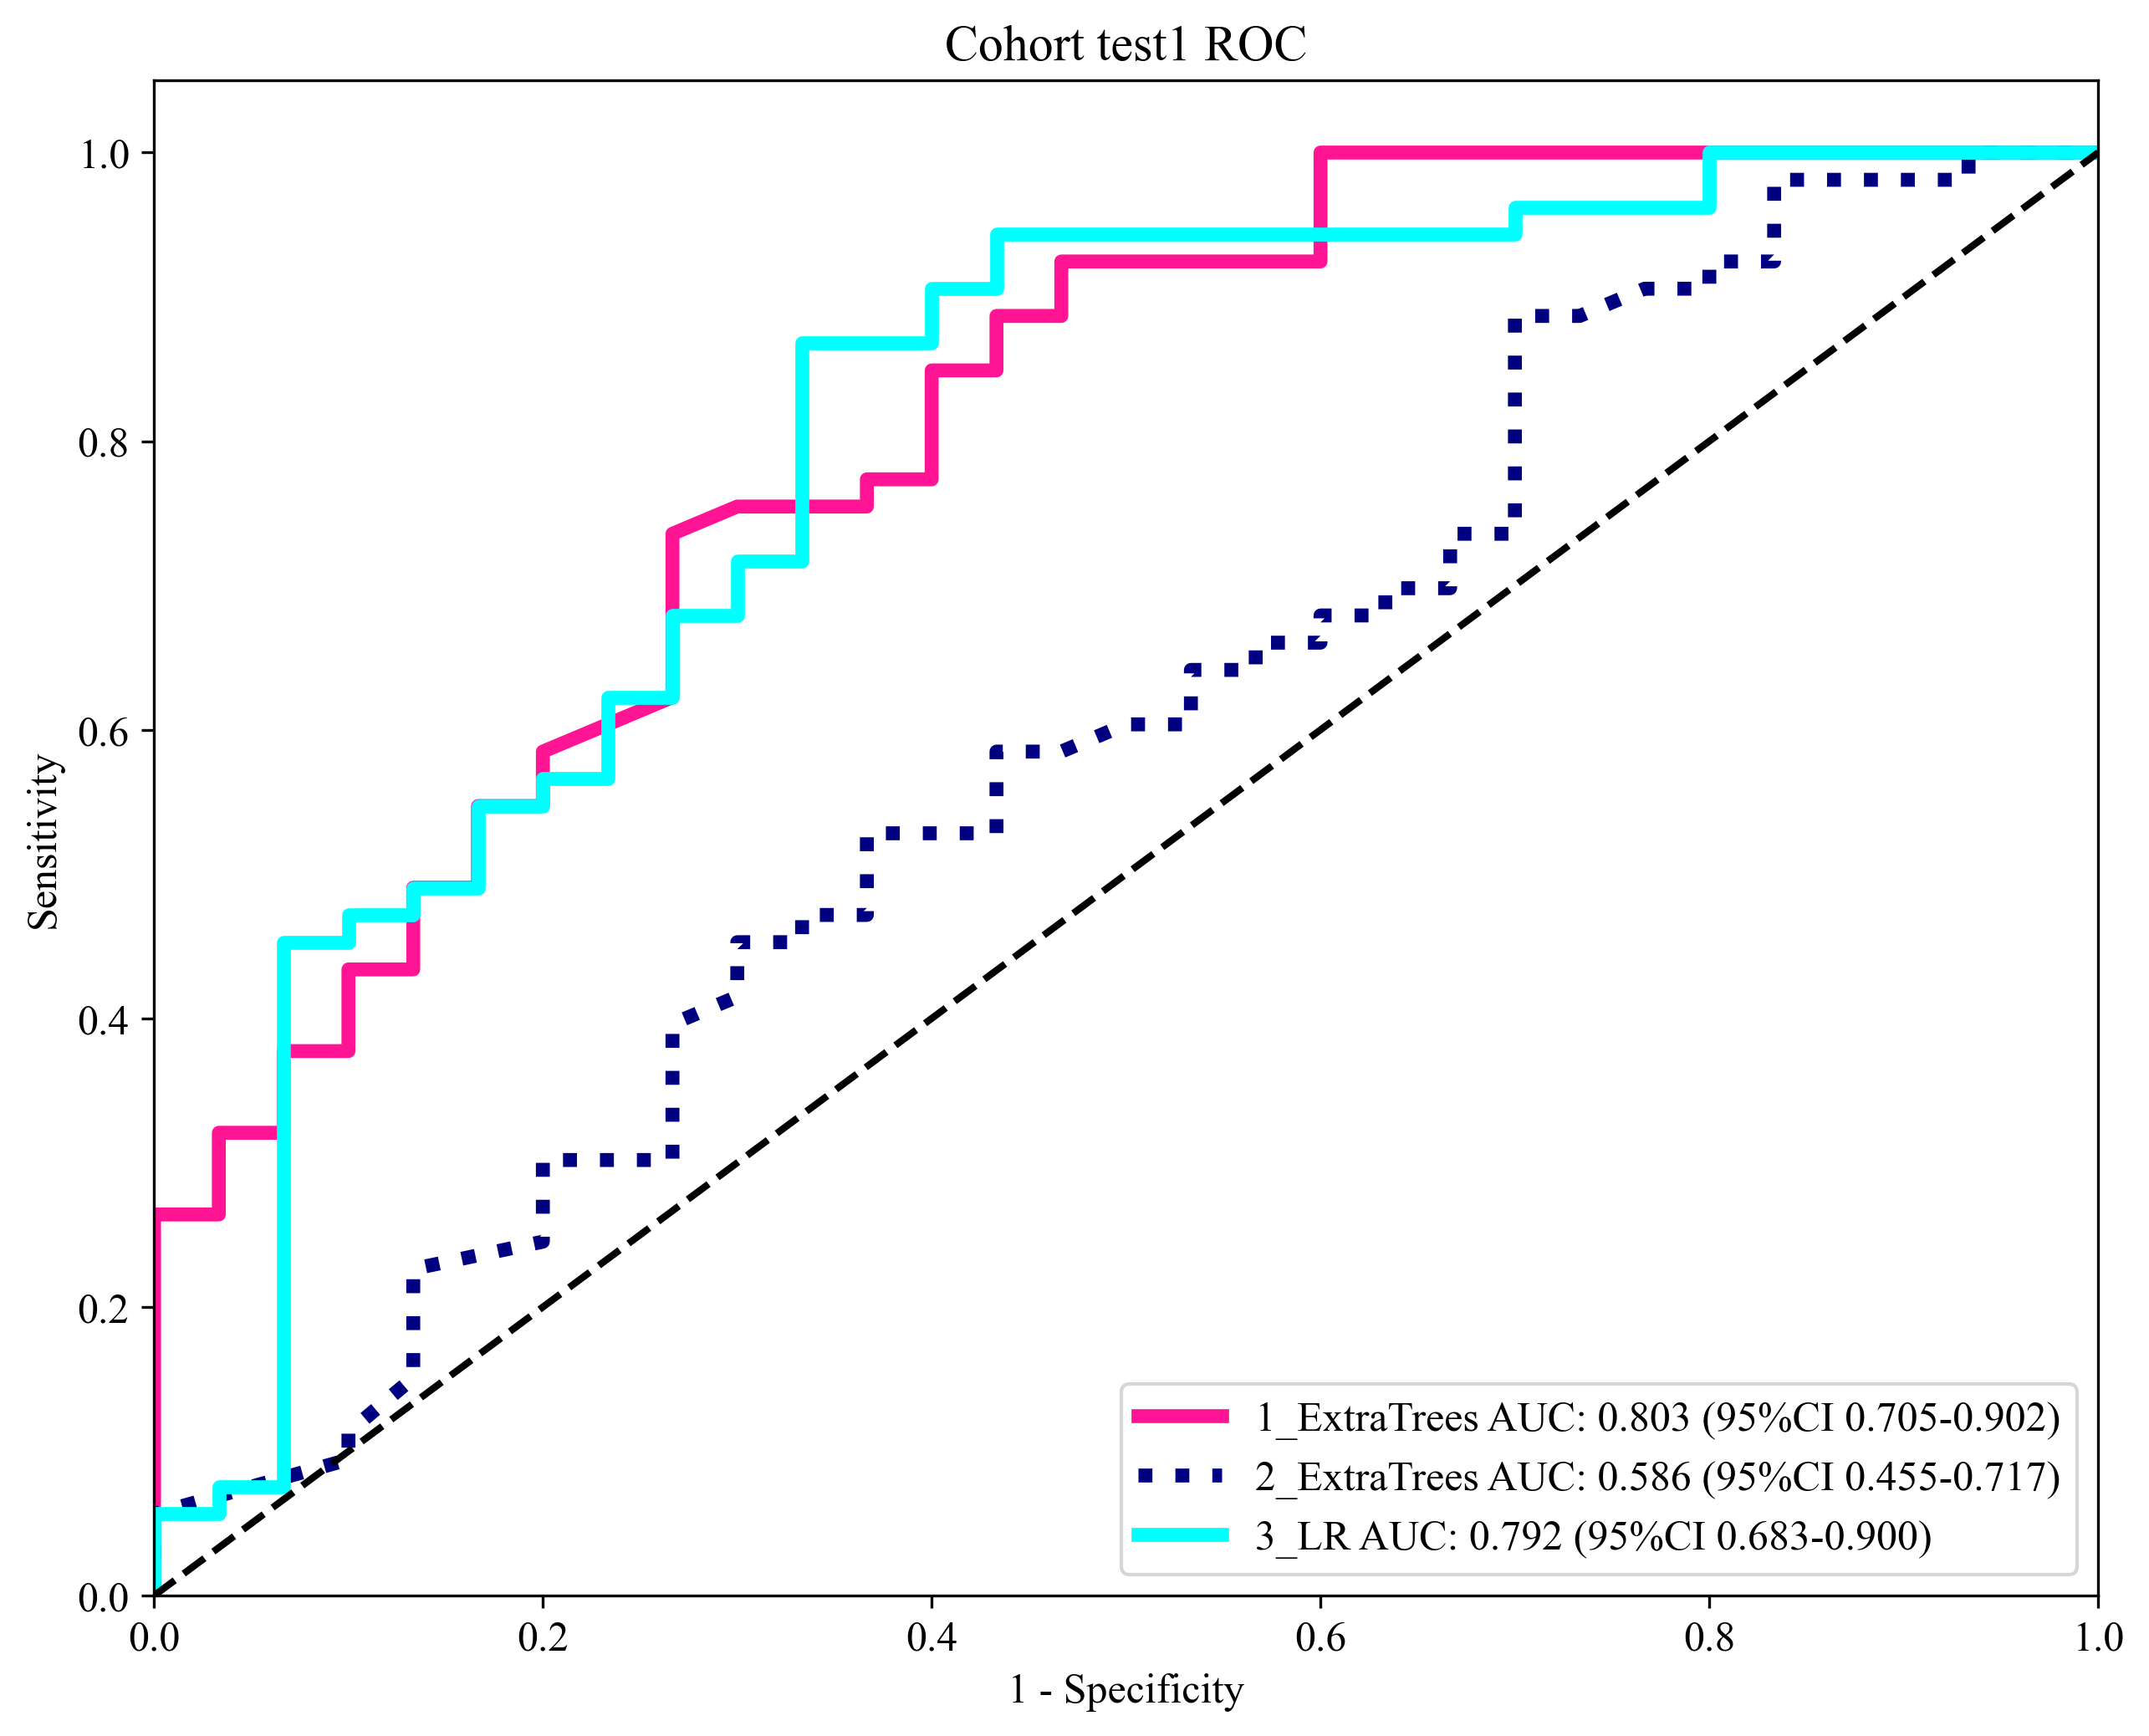

Signature  Accuracy    AUC           95% CI  Sensitivity  Specificity  \
0  1_ExtraTrees     0.895  0.950  0.9147 - 0.9863        0.900        0.884   
1  2_ExtraTrees     1.000  1.000  1.0000 - 1.0000        1.000        1.000   
2          3_LR     0.853  0.910  0.8585 - 0.9606        0.890        0.767   
3  1_ExtraTrees     0.742  0.711  0.5362 - 0.8856        0.750        0.722   
4  2_ExtraTrees     0.774  0.741  0.5892 - 0.8918        0.773        0.778   
5          3_LR     0.839  0.726  0.5656 - 0.8864        0.977        0.500   
6  1_ExtraTrees     0.735  0.803  0.7046 - 0.9023        0.736        0.733   
7  2_ExtraTrees     0.675  0.586  0.4545 - 0.7172        0.887        0.300   
8          3_LR     0.795  0.792  0.6834 - 0.9002        0.868        0.667   

     PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0  0.947  0.792      0.947   0.900  0.923      0.506  train  
1  1.000  1.000      1.000   1.000  1.000      0.971  train  
2  0.899  0.750      0.899   0.890  0.894      0.453  train  
3  0.868  0.542      0.868   0.750  0.805      0.638    val  
4  0.895  0.583      0.895   0.773  0.829      0.578    val  
5  0.827  0.900      0.827   0.977  0.896      0.193    val  
6  0.830  0.611      0.830   0.736  0.780      0.512  test1  
7  0.691  0.600      0.691   0.887  0.777      0.165  test1  
8  0.821  0.741      0.821   0.868  0.844      0.748  test1

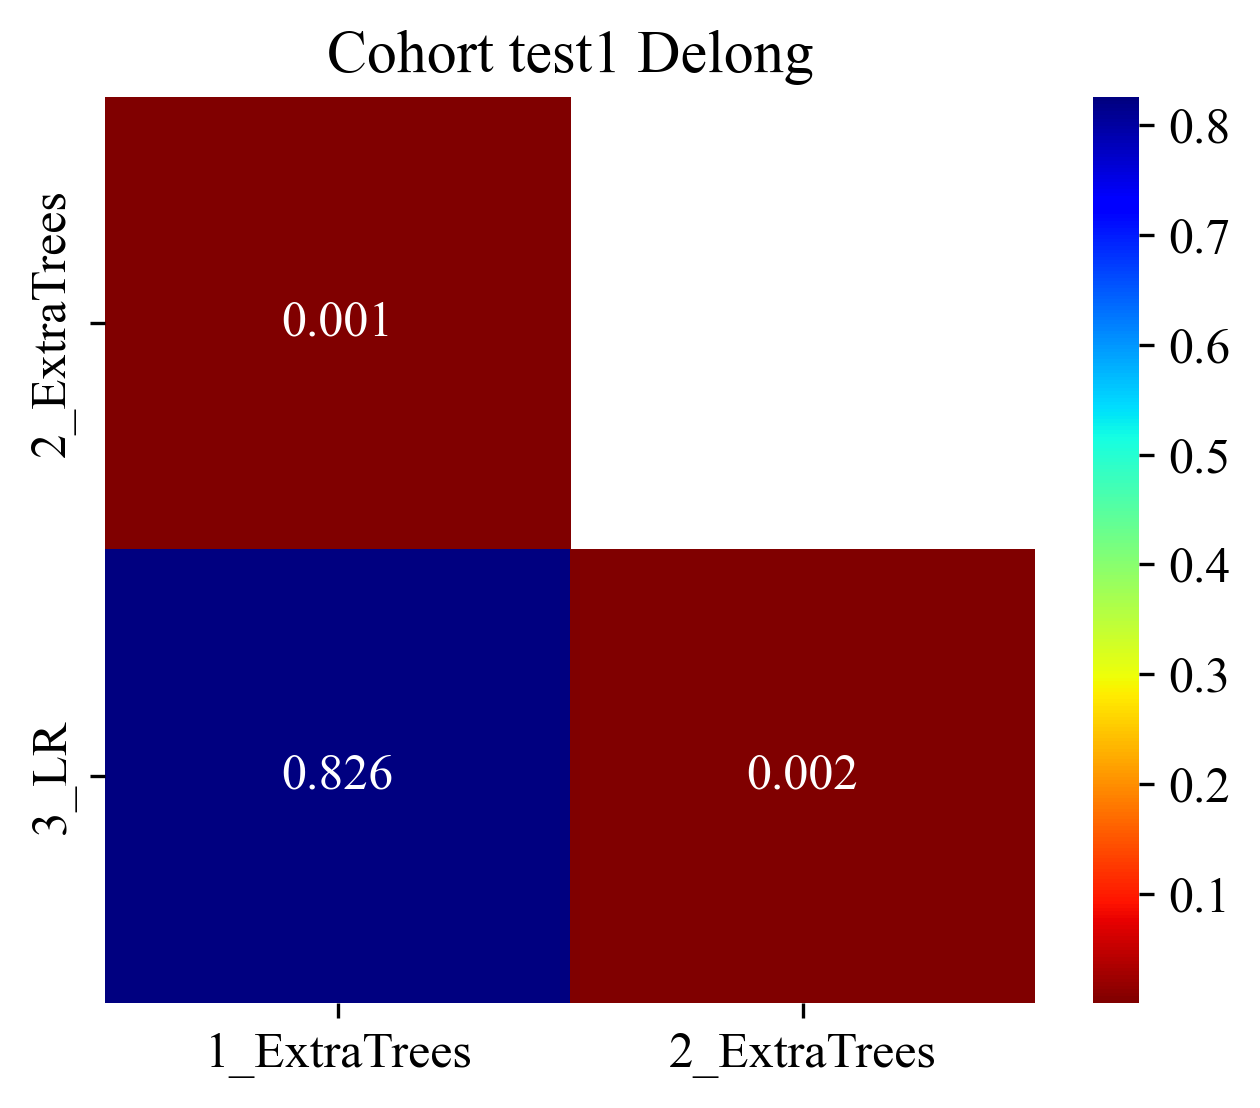

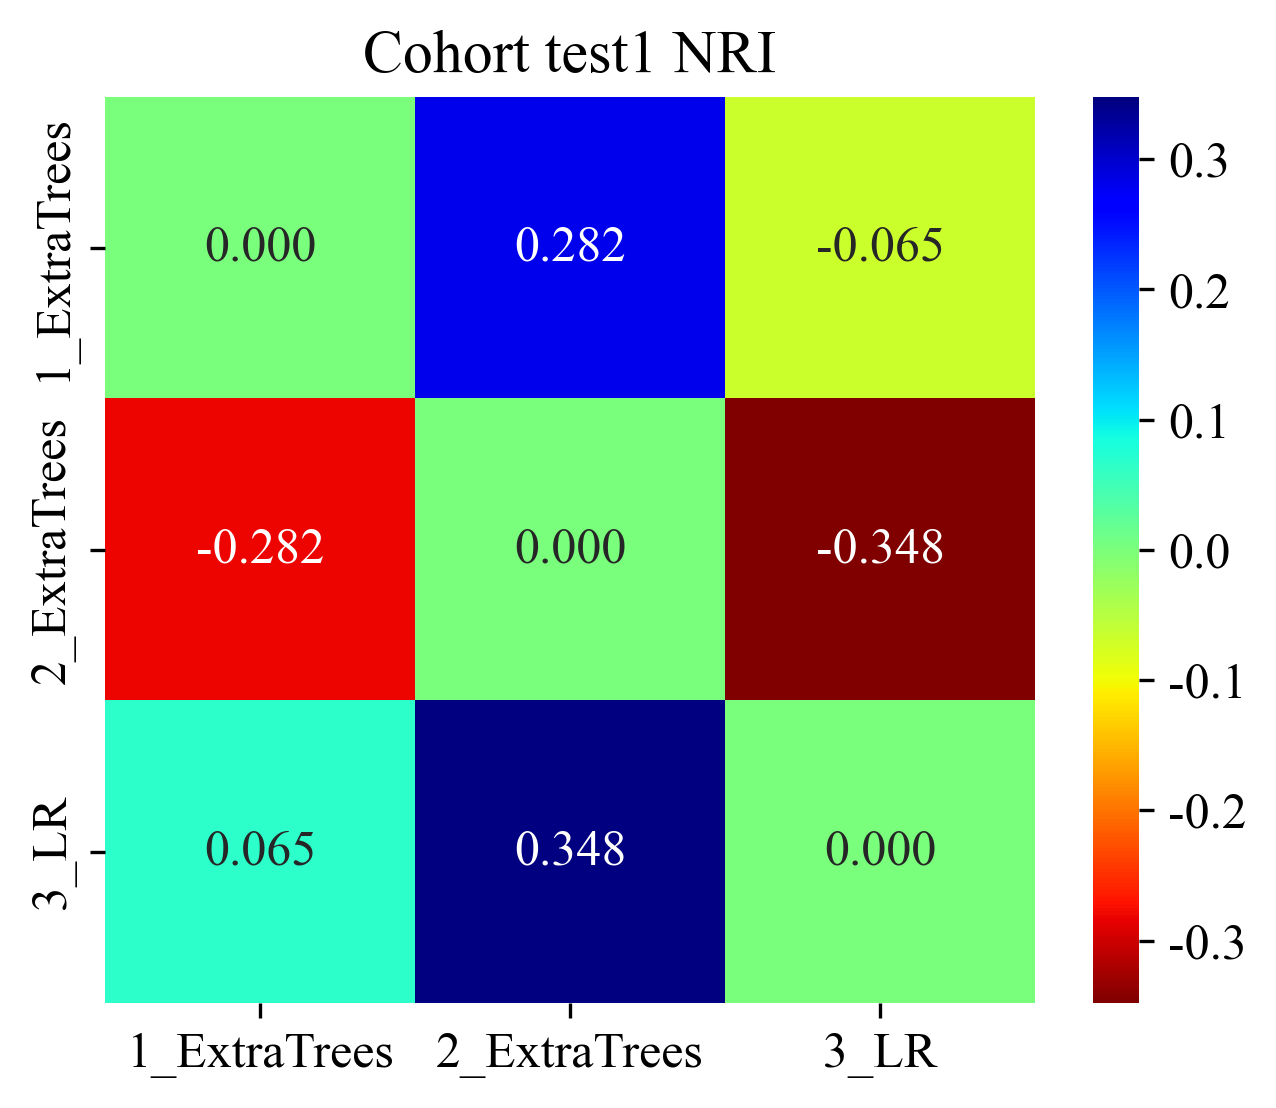

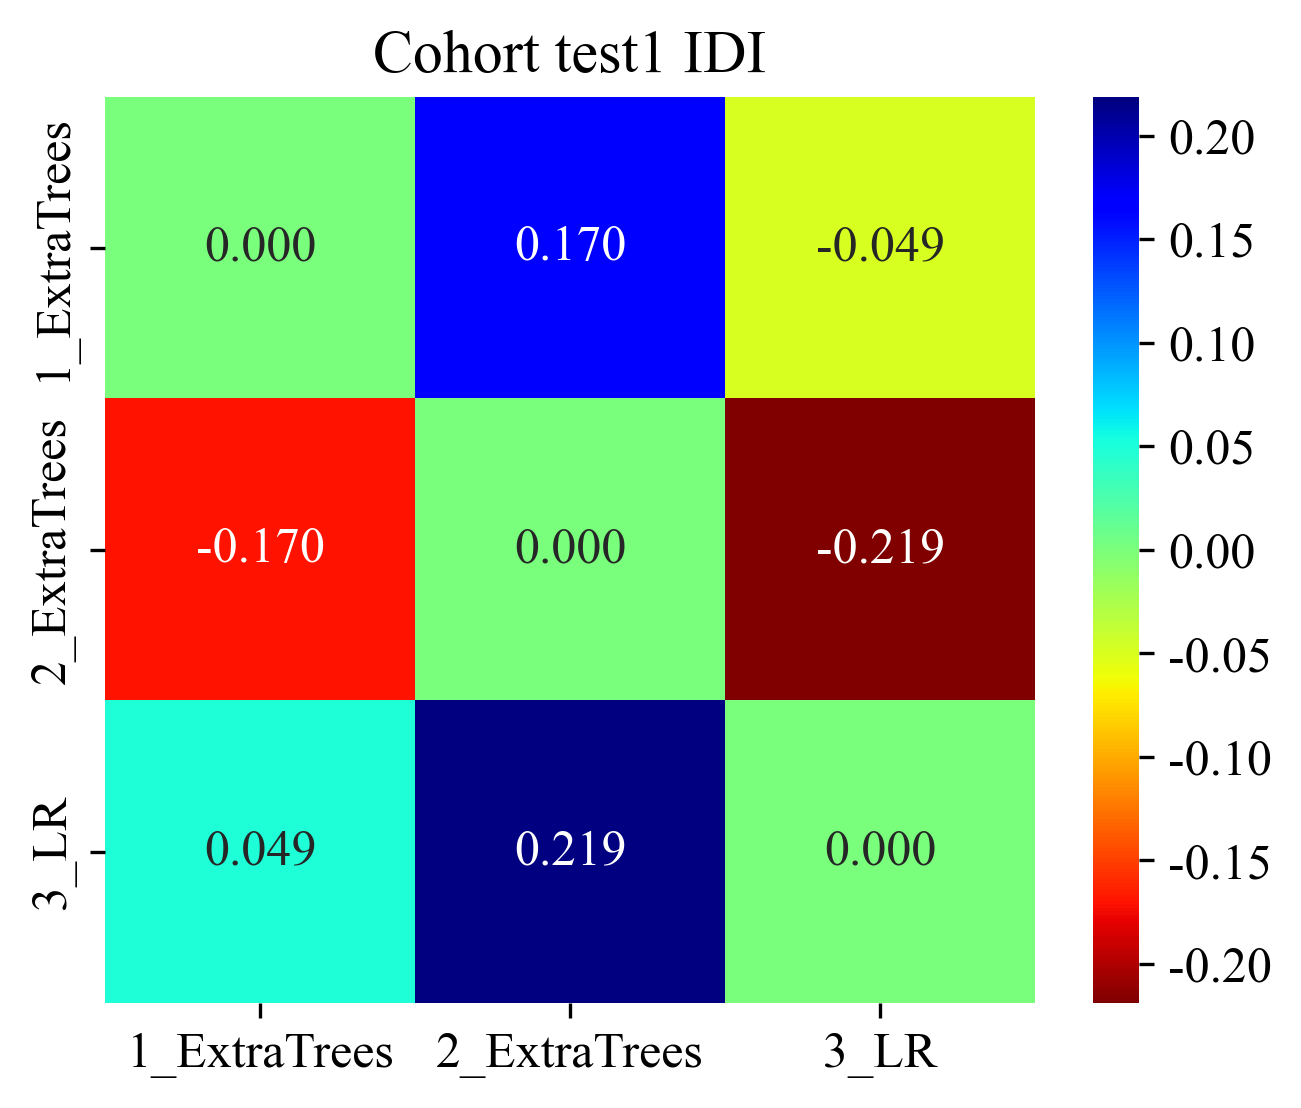

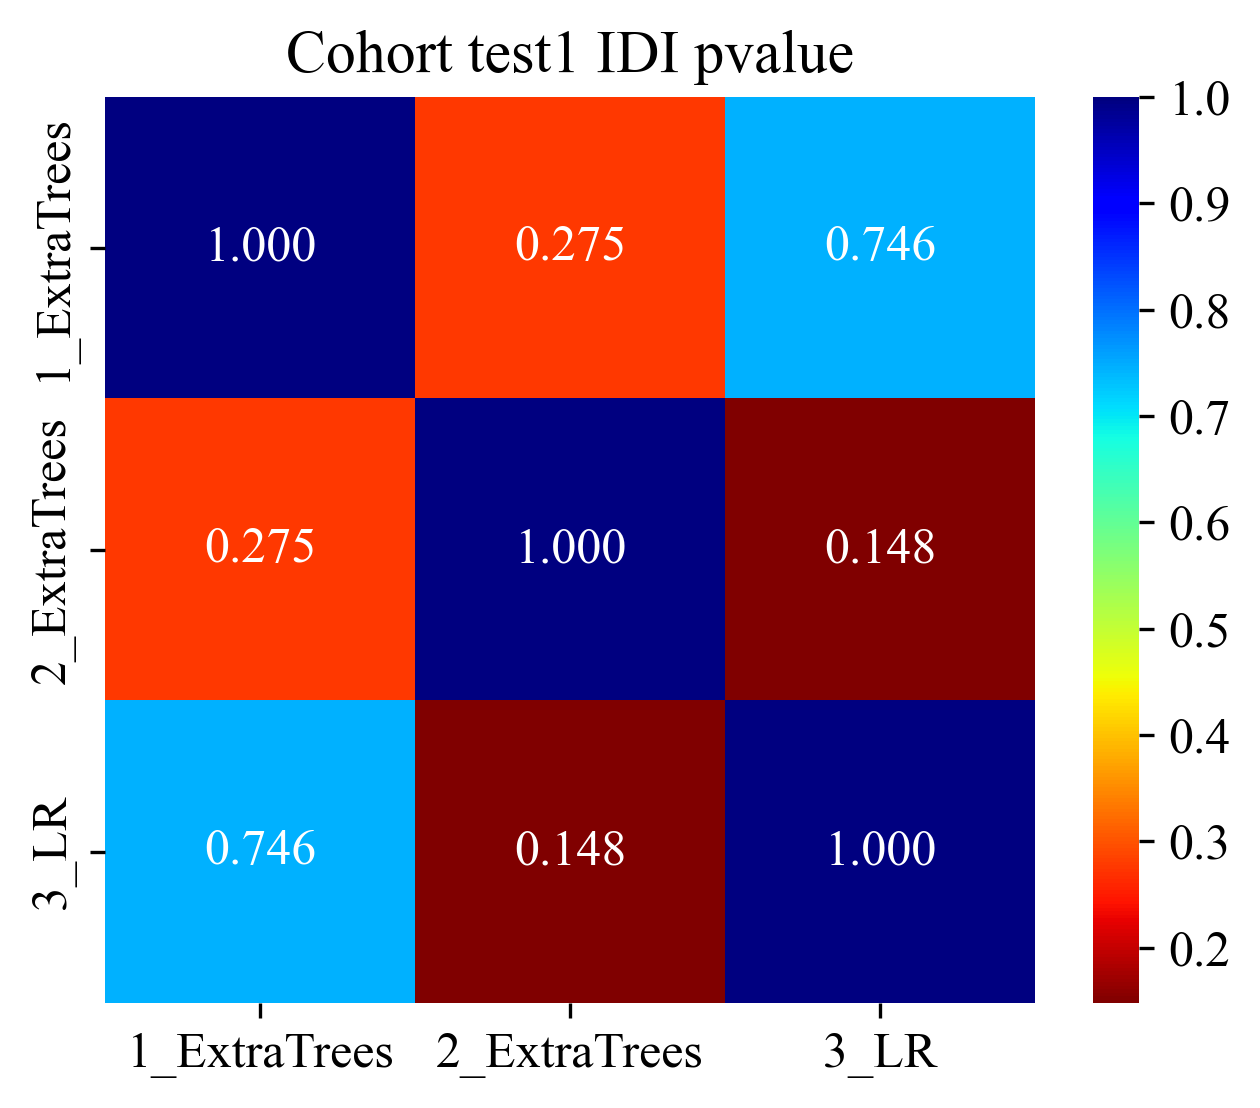

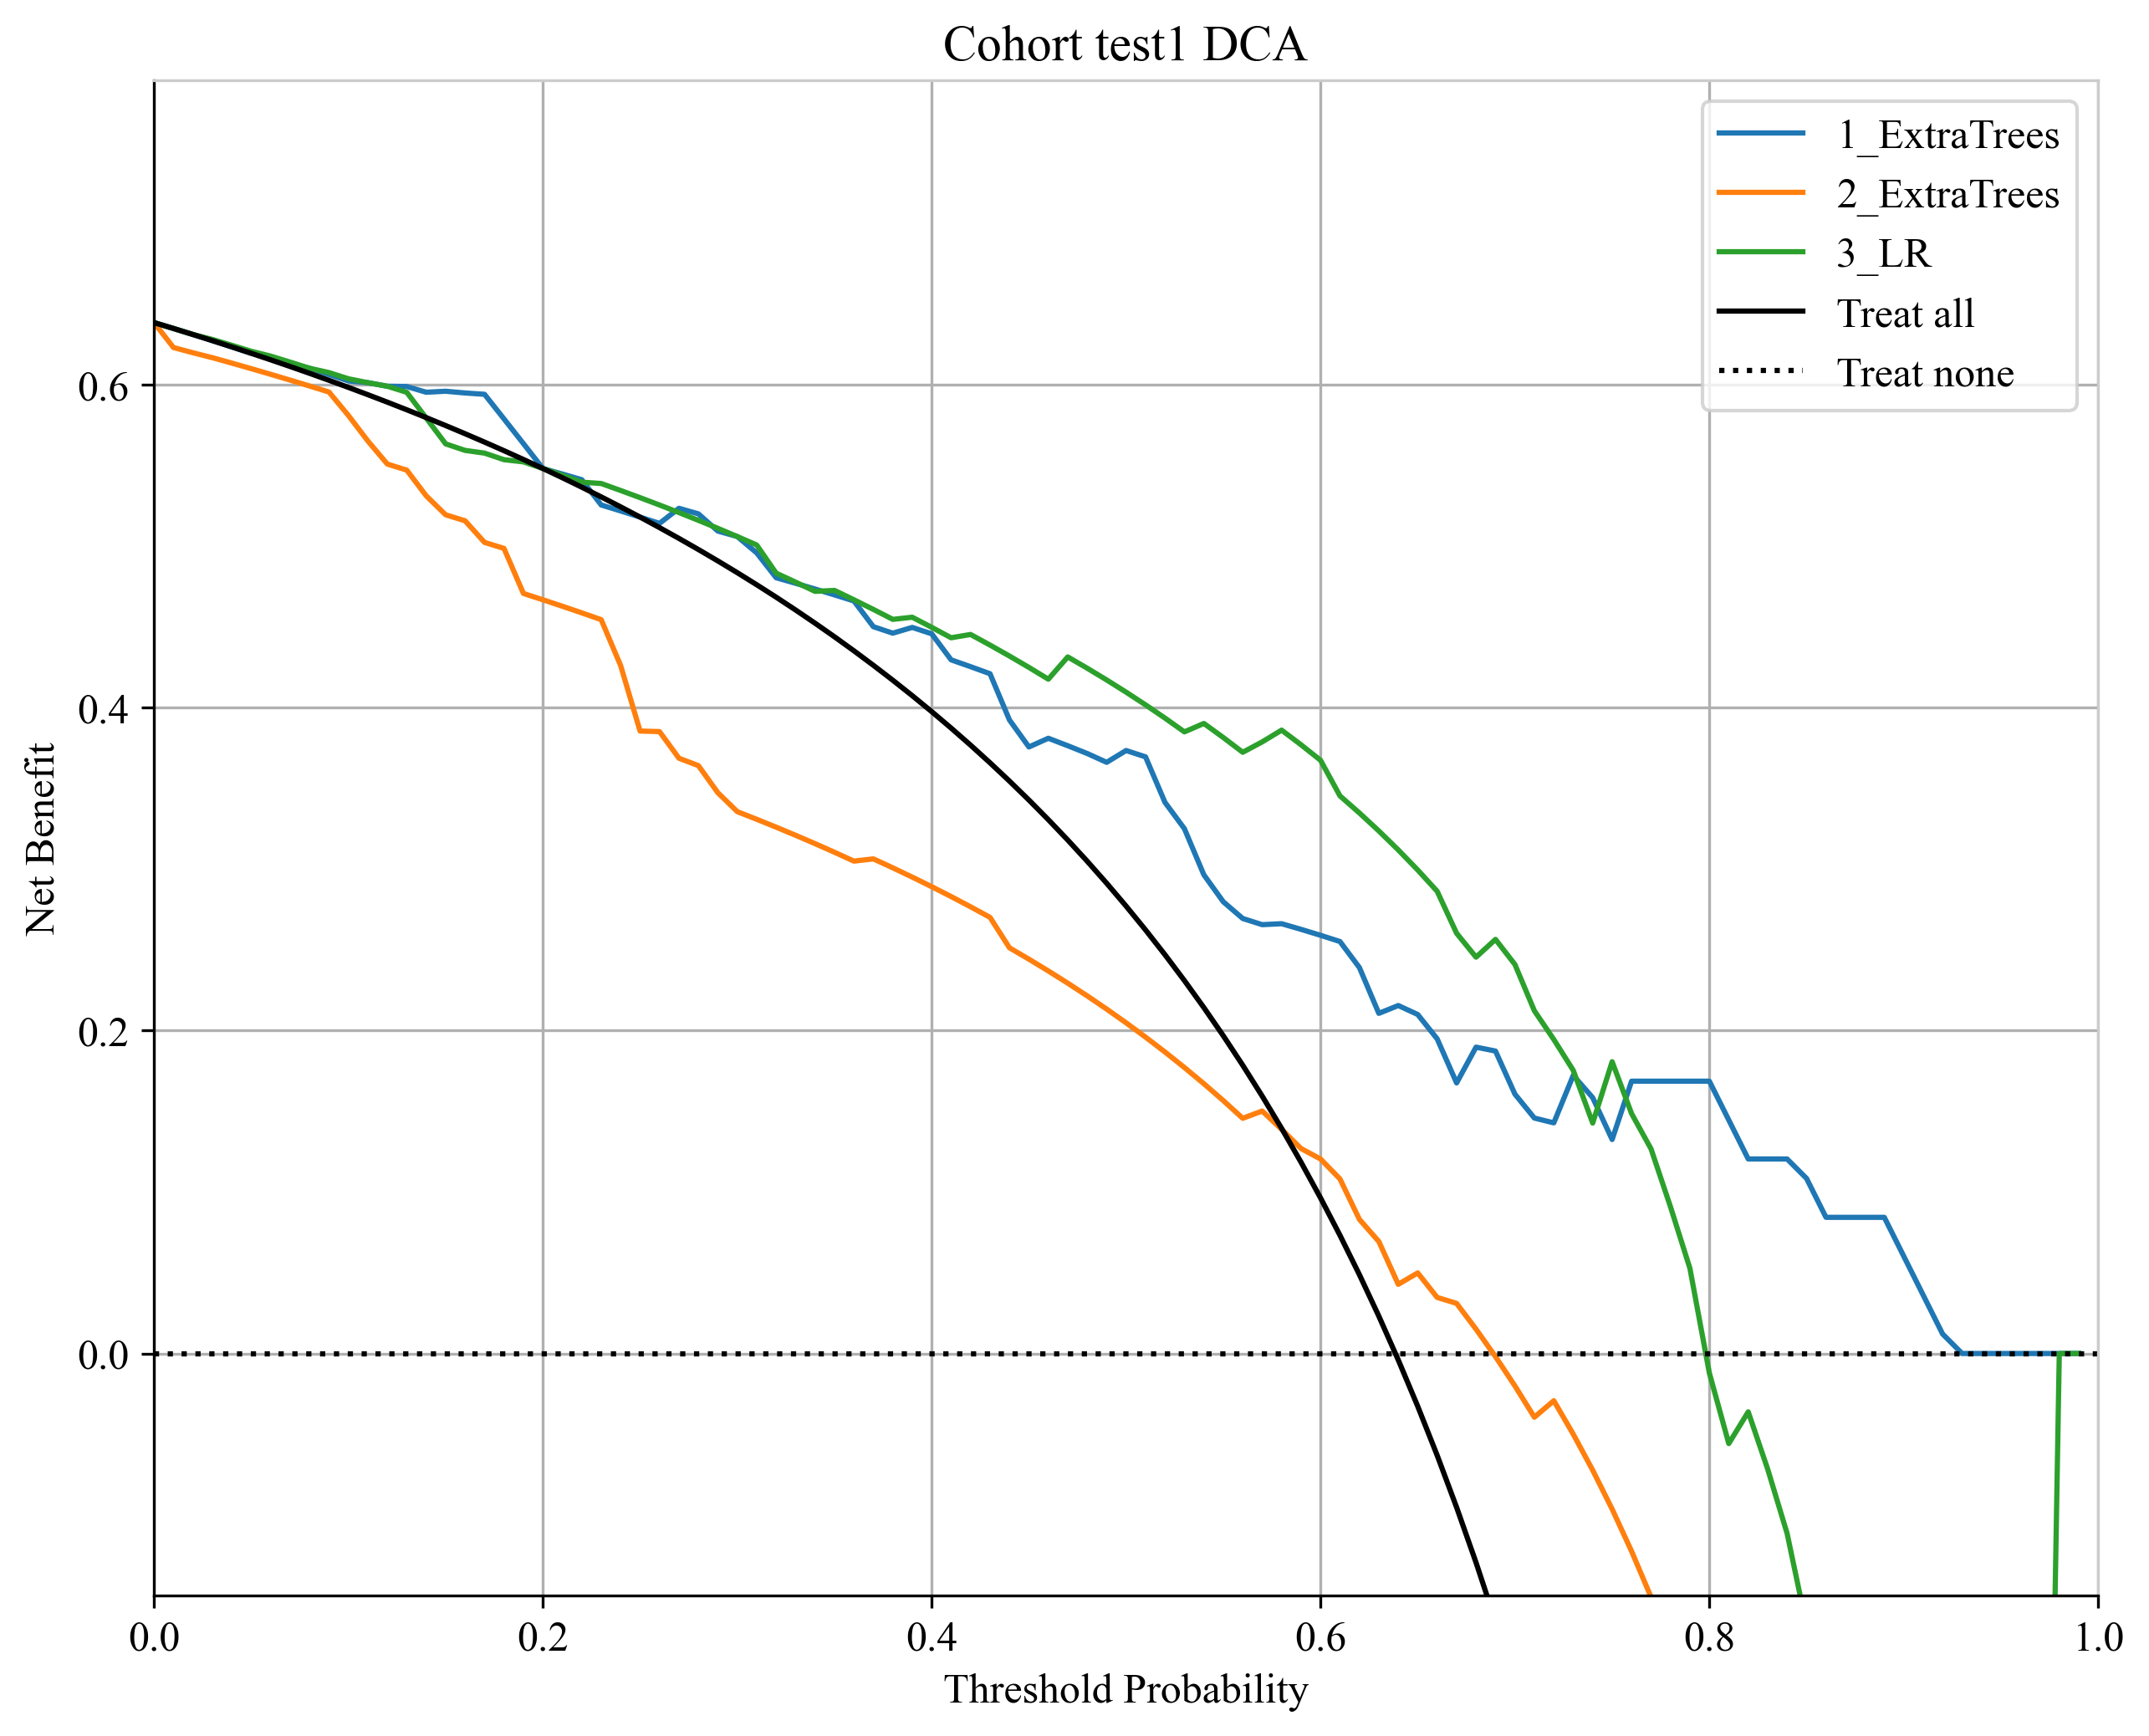

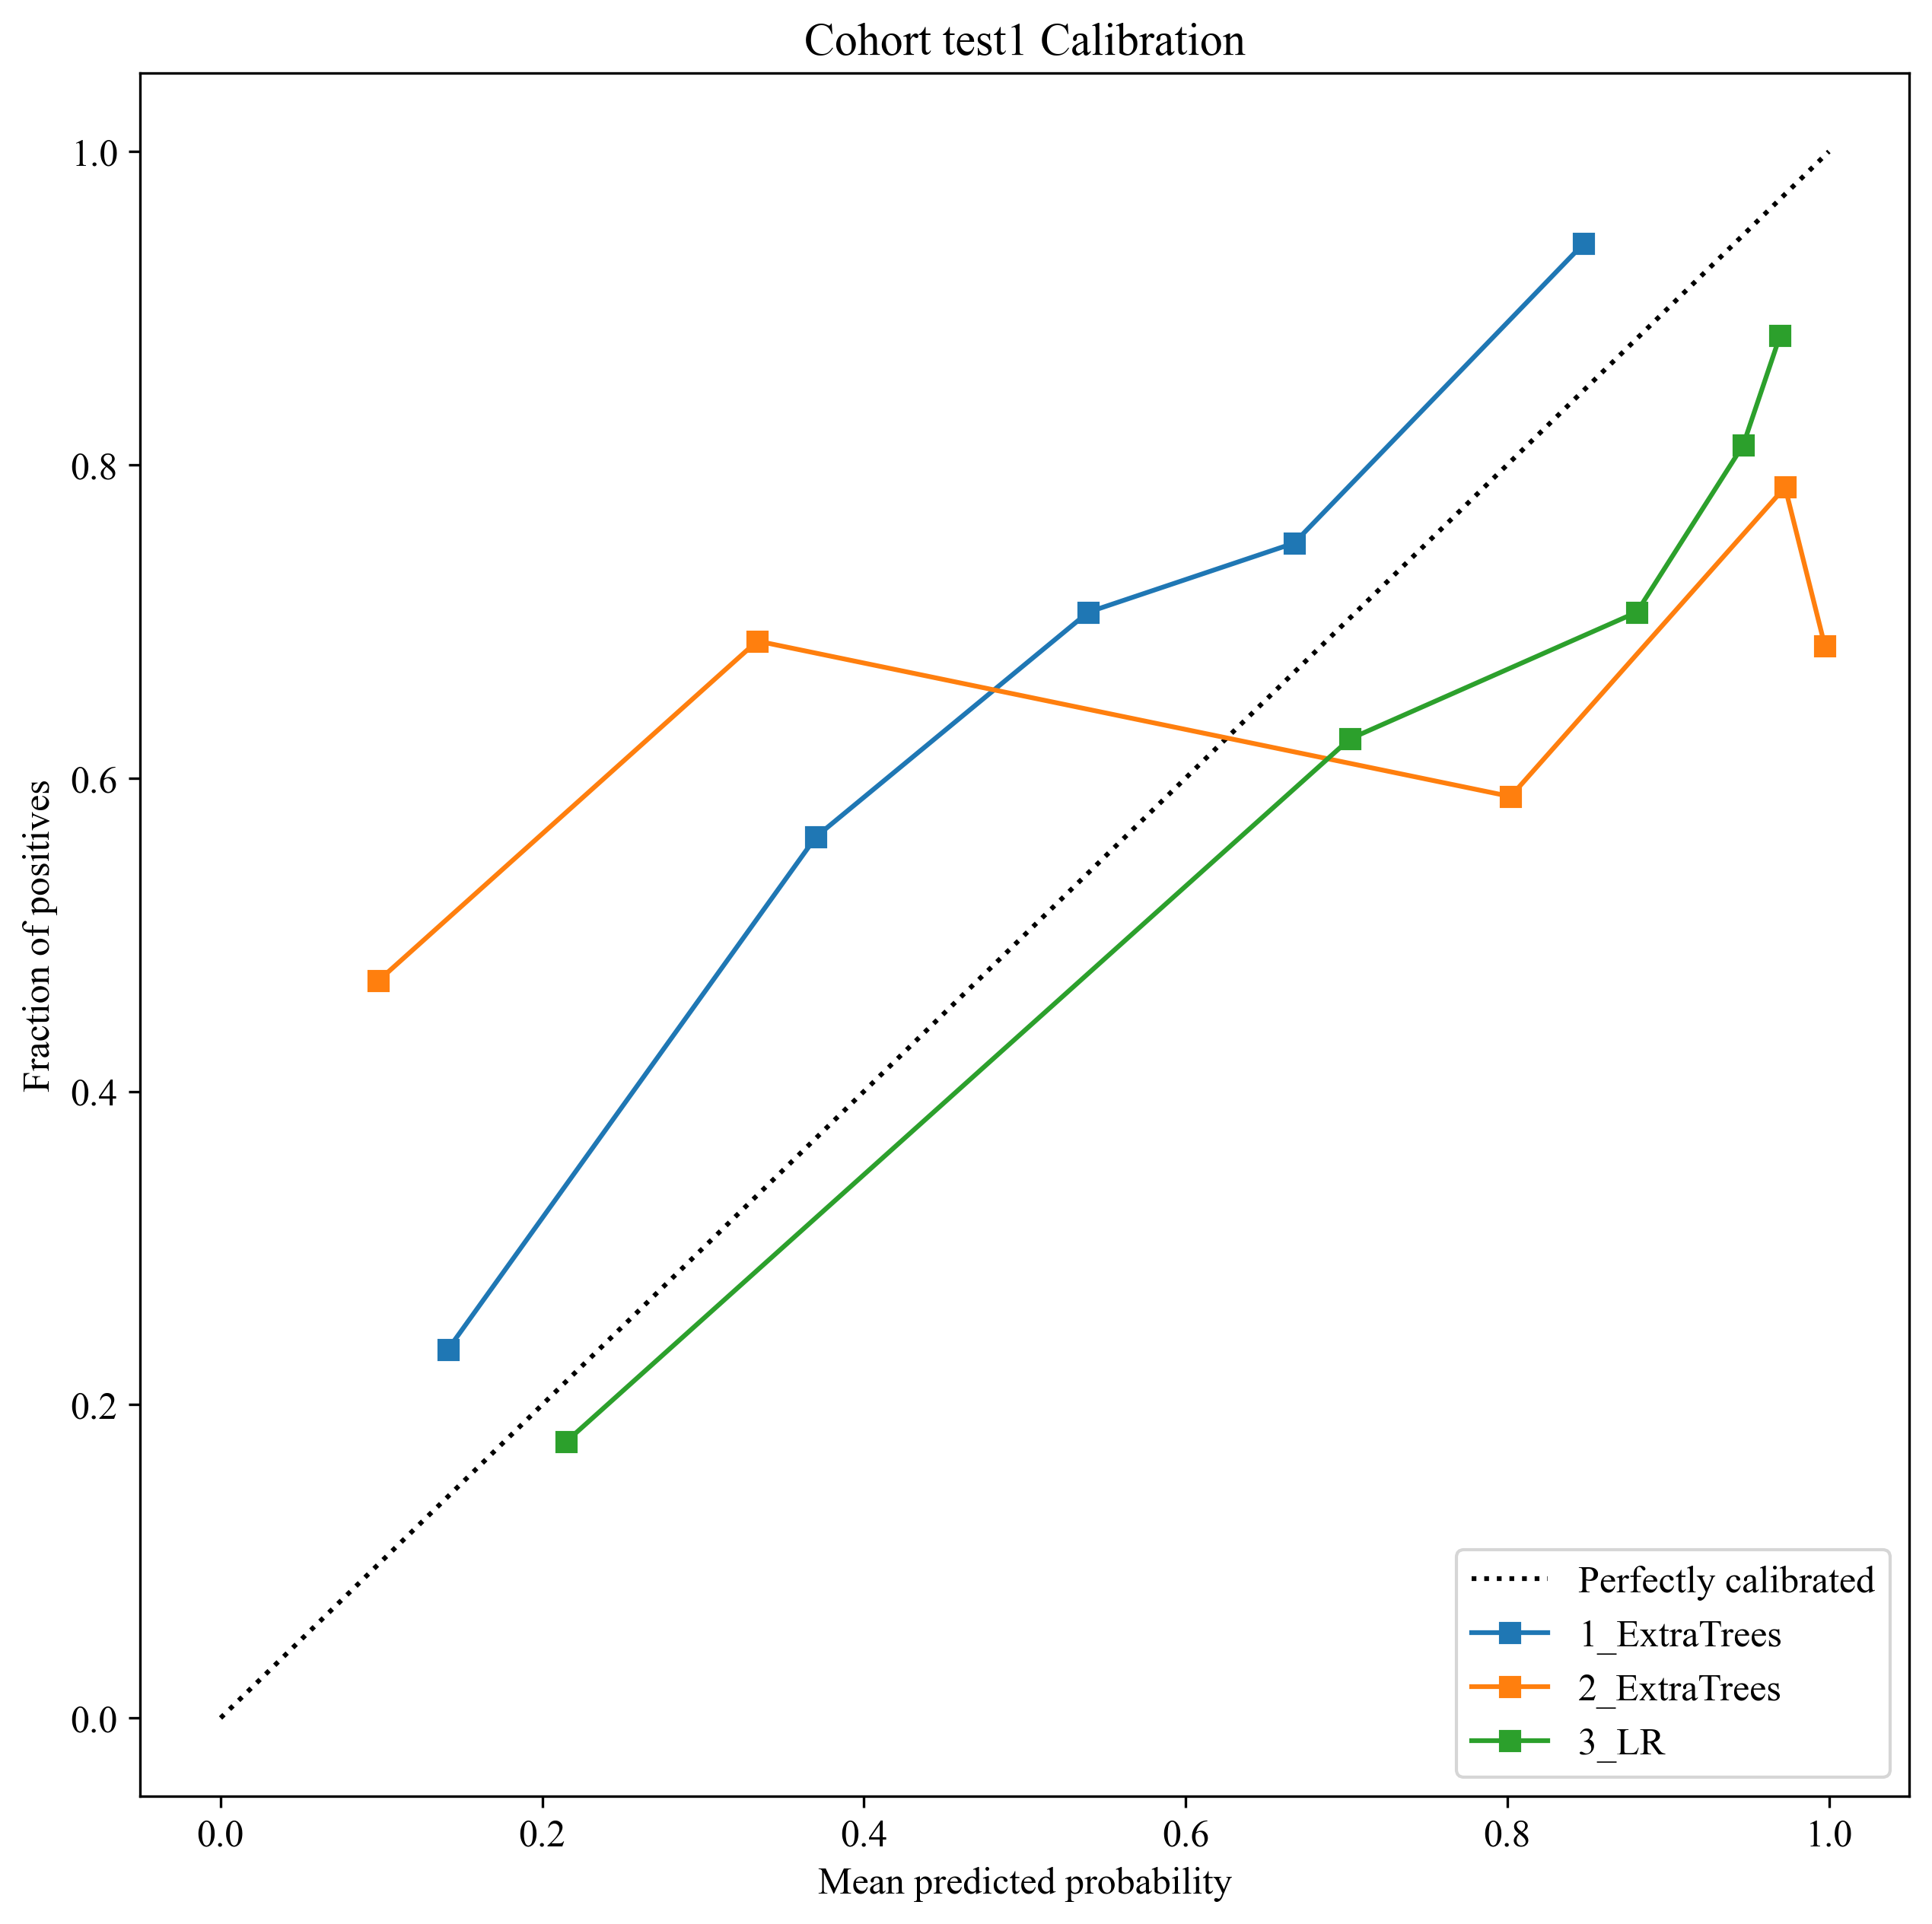

ID   -0_x  1_ExtraTrees   -0_y  2_ExtraTrees     -0   3_LR  \
0   400.nii.gz  0.263         0.737  0.837         0.163  0.053  0.947   
1   401.nii.gz  0.441         0.559  0.152         0.848  0.545  0.455   
2   402.nii.gz  0.838         0.162  0.019         0.981  0.473  0.527   
3   403.nii.gz  0.327         0.673  0.270         0.730  0.083  0.917   
4   404.nii.gz  0.057         0.943  0.003         0.997  0.101  0.899   
5   405.nii.gz  0.113         0.887  0.353         0.647  0.138  0.862   
6   408.nii.gz  0.178         0.822  0.487         0.513  0.209  0.791   
7   409.nii.gz  0.185         0.815  0.870         0.130  0.105  0.895   
8   411.nii.gz  0.657         0.343  0.860         0.140  0.765  0.235   
9   412.nii.gz  0.286         0.714  0.717         0.283  0.041  0.959   
10  416.nii.gz  0.393         0.607  0.969         0.031  0.359  0.641   
11  417.nii.gz  0.771         0.229  0.610         0.390  0.407  0.593   
12  419.nii.gz  0.393         0.607  0.120         0.880  0.343  0.657   
13  420.nii.gz  0.333         0.667  0.102         0.898  0.058  0.942   
14  421.nii.gz  0.072         0.928  0.550         0.450  0.045  0.955   
15  423.nii.gz  0.118         0.882  0.402         0.598  0.029  0.971   
16  425.nii.gz  0.098         0.902  0.034         0.966  0.046  0.954   
17  426.nii.gz  0.517         0.483  0.869         0.131  0.156  0.844   
18  427.nii.gz  0.056         0.944  0.117         0.883  0.021  0.979   
19  428.nii.gz  0.529         0.471  0.003         0.997  0.138  0.862   
20  430.nii.gz  0.059         0.941  0.003         0.997  0.051  0.949   
21  431.nii.gz  0.857         0.143  0.156         0.844  0.908  0.092   
22  432.nii.gz  0.042         0.958  0.000         1.000  0.032  0.968   
23  433.nii.gz  0.111         0.889  0.000         1.000  0.045  0.955   
24  434.nii.gz  0.113         0.887  0.403         0.597  0.046  0.954   
25  435.nii.gz  0.363         0.637  0.002         0.998  0.066  0.934   
26  436.nii.gz  0.278         0.722  0.003         0.997  0.041  0.959   
27  437.nii.gz  0.585         0.415  0.870         0.130  0.093  0.907   
28  438.nii.gz  0.475         0.525  0.998         0.002  0.746  0.254   
29  439.nii.gz  0.809         0.191  0.086         0.914  0.638  0.362   
30  440.nii.gz  0.270         0.730  0.037         0.963  0.103  0.897   
31  441.nii.gz  0.172         0.828  0.005         0.995  0.038  0.962   
32  442.nii.gz  0.124         0.876  0.005         0.995  0.040  0.960   
33  443.nii.gz  0.120         0.880  0.003         0.997  0.033  0.967   
34  444.nii.gz  0.791         0.209  0.859         0.141  0.838  0.162   
35  445.nii.gz  0.363         0.637  0.770         0.230  0.233  0.767   
36  446.nii.gz  0.451         0.549  0.989         0.011  0.840  0.160   
37  447.nii.gz  0.488         0.512  0.737         0.263  0.264  0.736   
38  448.nii.gz  0.131         0.869  0.035         0.965  0.048  0.952   
39  449.nii.gz  0.363         0.637  0.652         0.348  0.059  0.941   
40  450.nii.gz  0.326         0.674  0.037         0.963  0.043  0.957   
41  451.nii.gz  0.475         0.525  0.037         0.963  0.234  0.766   
42  452.nii.gz  0.185         0.815  0.052         0.948  0.054  0.946   
43  453.nii.gz  0.859         0.141  0.860         0.140  0.482  0.518   
44  454.nii.gz  0.851         0.149  0.160         0.840  0.447  0.553   
45  455.nii.gz  0.177         0.823  0.652         0.348  0.049  0.951   
46  457.nii.gz  0.384         0.616  0.819         0.181  0.057  0.943   
47  458.nii.gz  0.295         0.705  0.000         1.000  0.030  0.970   

    Enhancement_degree_  Contour  Pleural_invasion  Lymphadenopathy  group  \
0                     0        0                 0                0  test2   
1                     1        1                 0                0  test2   
2                     0        0                 0                0  test2   
3                     1        1                 0                0  test

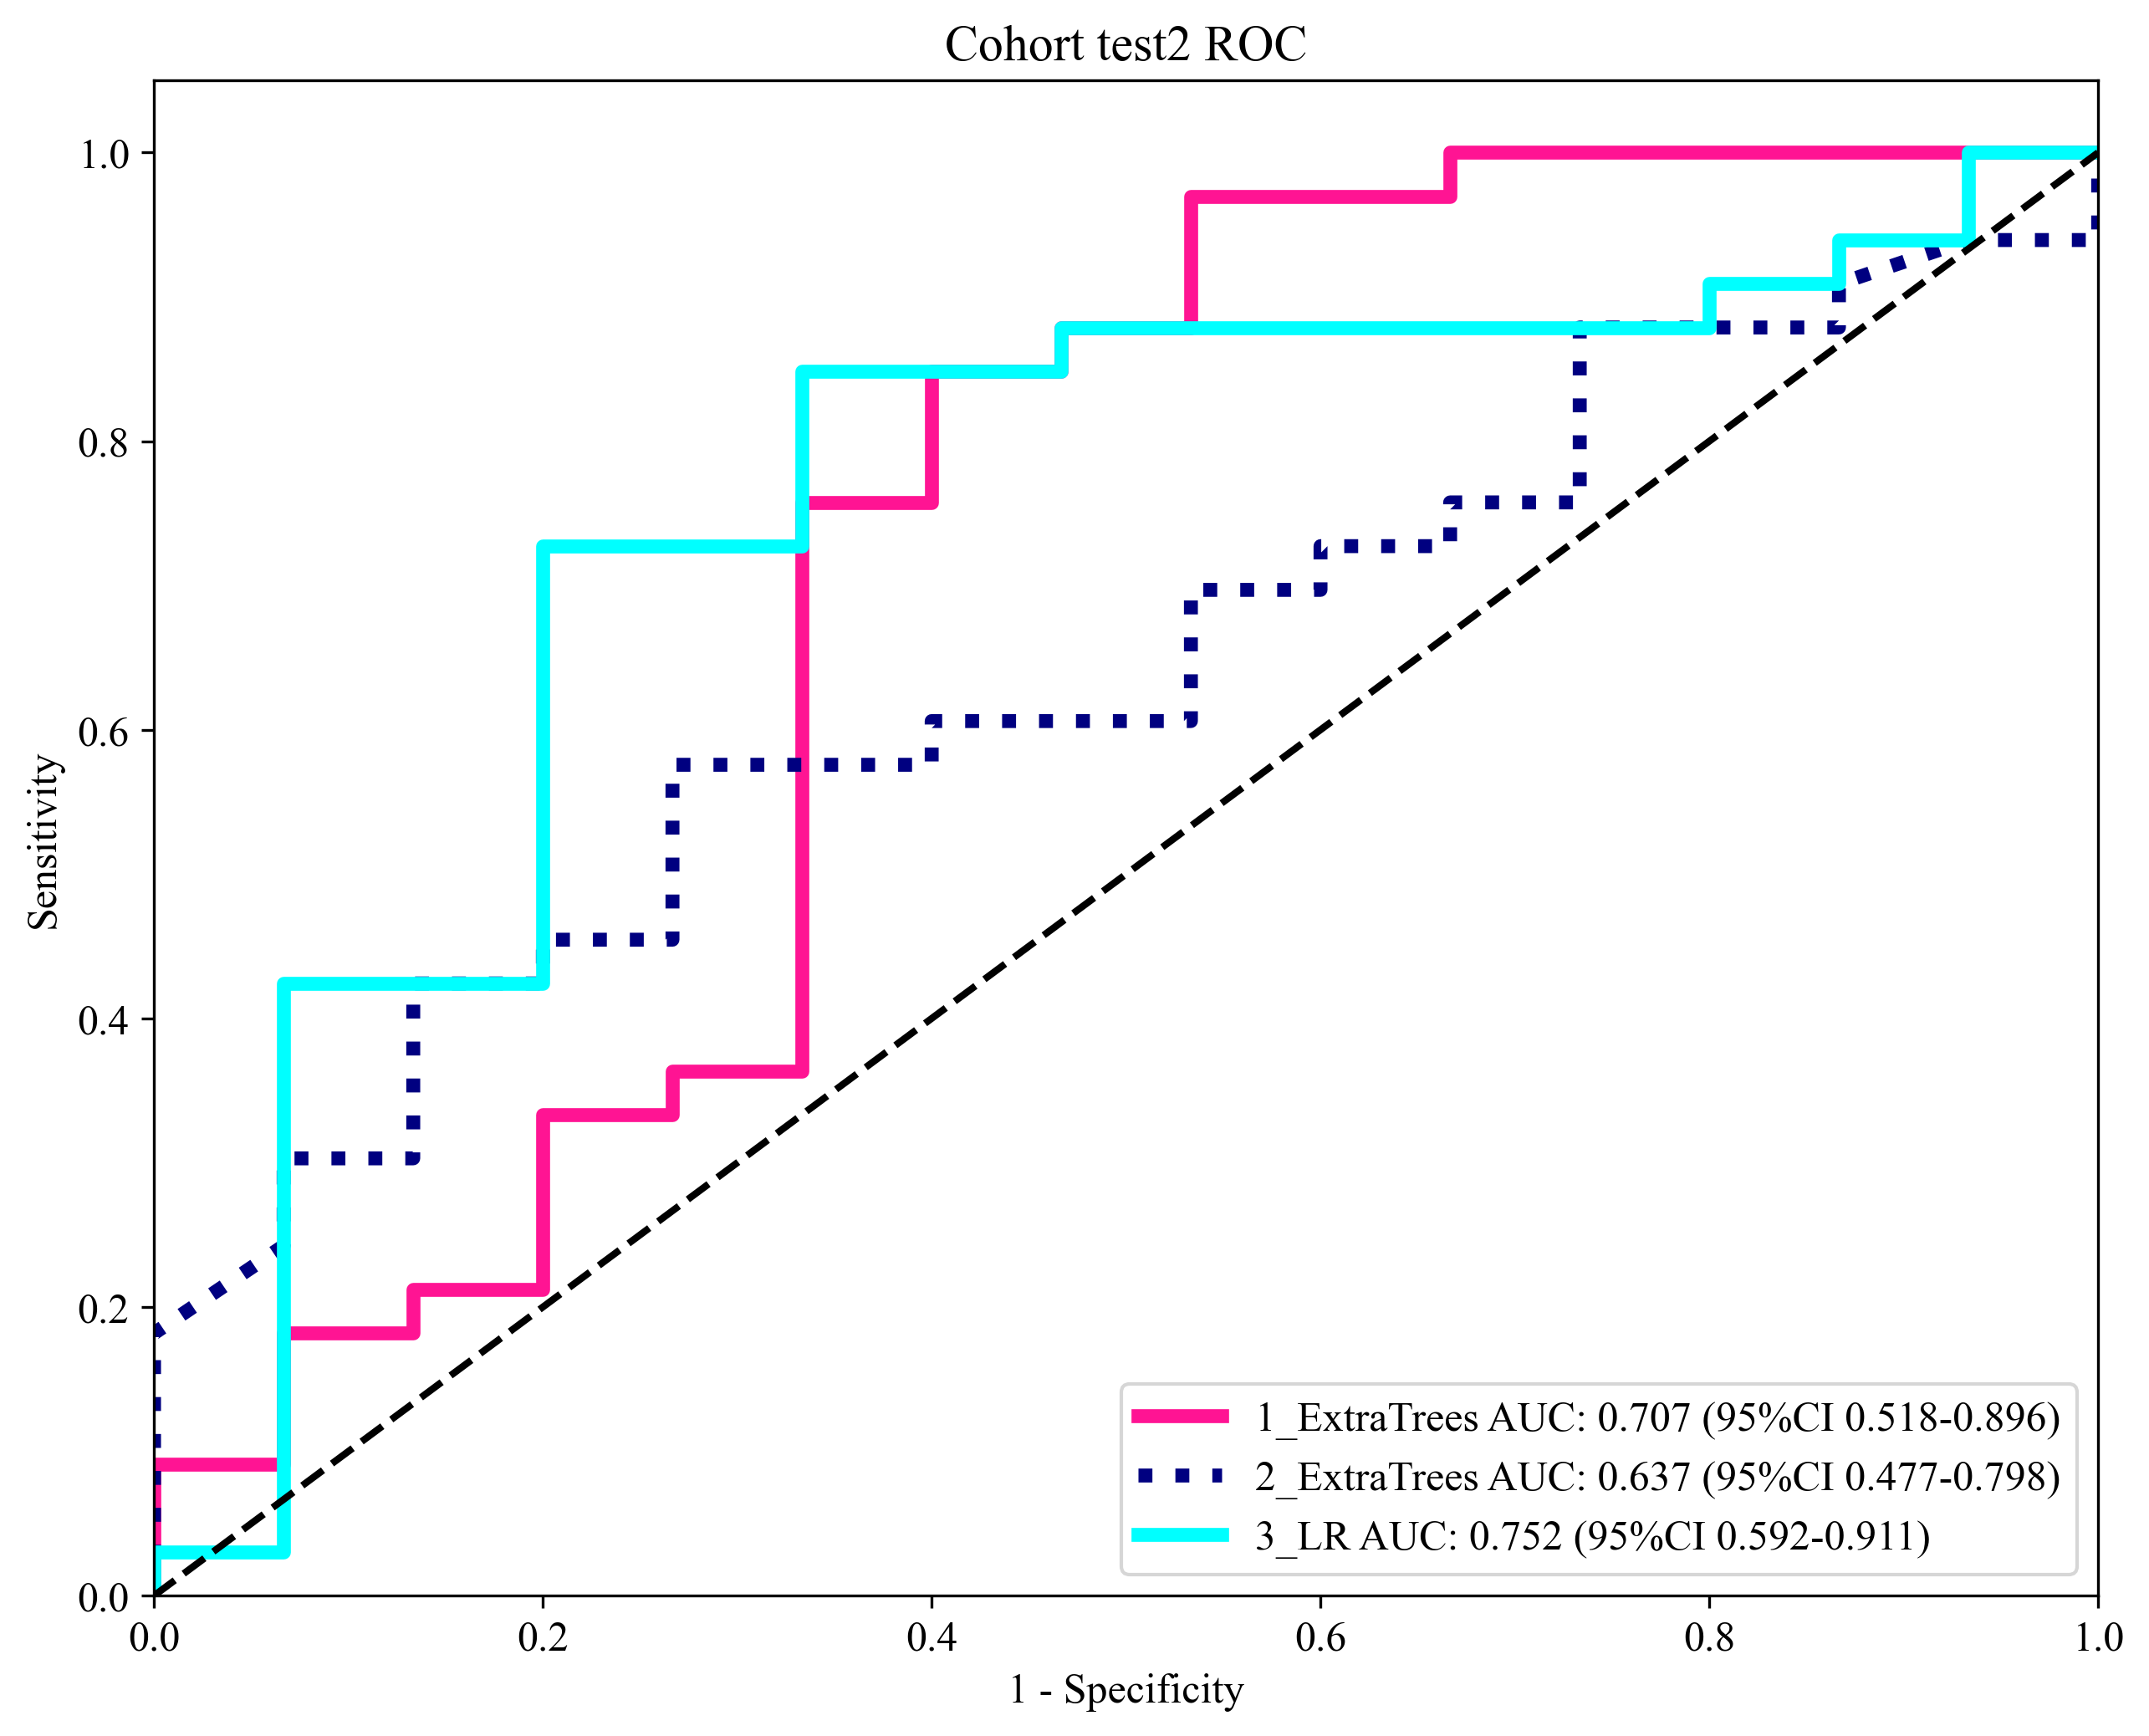

Signature  Accuracy    AUC           95% CI  Sensitivity  Specificity  \
0   1_ExtraTrees     0.895  0.950  0.9147 - 0.9863        0.900        0.884   
1   2_ExtraTrees     1.000  1.000  1.0000 - 1.0000        1.000        1.000   
2           3_LR     0.853  0.910  0.8585 - 0.9606        0.890        0.767   
3   1_ExtraTrees     0.742  0.711  0.5362 - 0.8856        0.750        0.722   
4   2_ExtraTrees     0.774  0.741  0.5892 - 0.8918        0.773        0.778   
5           3_LR     0.839  0.726  0.5656 - 0.8864        0.977        0.500   
6   1_ExtraTrees     0.735  0.803  0.7046 - 0.9023        0.736        0.733   
7   2_ExtraTrees     0.675  0.586  0.4545 - 0.7172        0.887        0.300   
8           3_LR     0.795  0.792  0.6834 - 0.9002        0.868        0.667   
9   1_ExtraTrees     0.771  0.707  0.5182 - 0.8960        0.848        0.600   
10  2_ExtraTrees     0.625  0.637  0.4766 - 0.7981        0.576        0.733   
11          3_LR     0.750  0.752  0.5916 - 0.9114        0.727        0.800   

      PPV    NPV  Precision  Recall     F1  Threshold Cohort  
0   0.947  0.792      0.947   0.900  0.923      0.506  train  
1   1.000  1.000      1.000   1.000  1.000      0.971  train  
2   0.899  0.750      0.899   0.890  0.894      0.453  train  
3   0.868  0.542      0.868   0.750  0.805      0.638    val  
4   0.895  0.583      0.895   0.773  0.829      0.578    val  
5   0.827  0.900      0.827   0.977  0.896      0.193    val  
6   0.830  0.611      0.830   0.736  0.780      0.512  test1  
7   0.691  0.600      0.691   0.887  0.777      0.165  test1  
8   0.821  0.741      0.821   0.868  0.844      0.748  test1  
9   0.824  0.643      0.824   0.848  0.836      0.549  test2  
10  0.826  0.440      0.826   0.576  0.679      0.848  test2  
11  0.889  0.571      0.889   0.727  0.800      0.897  test2

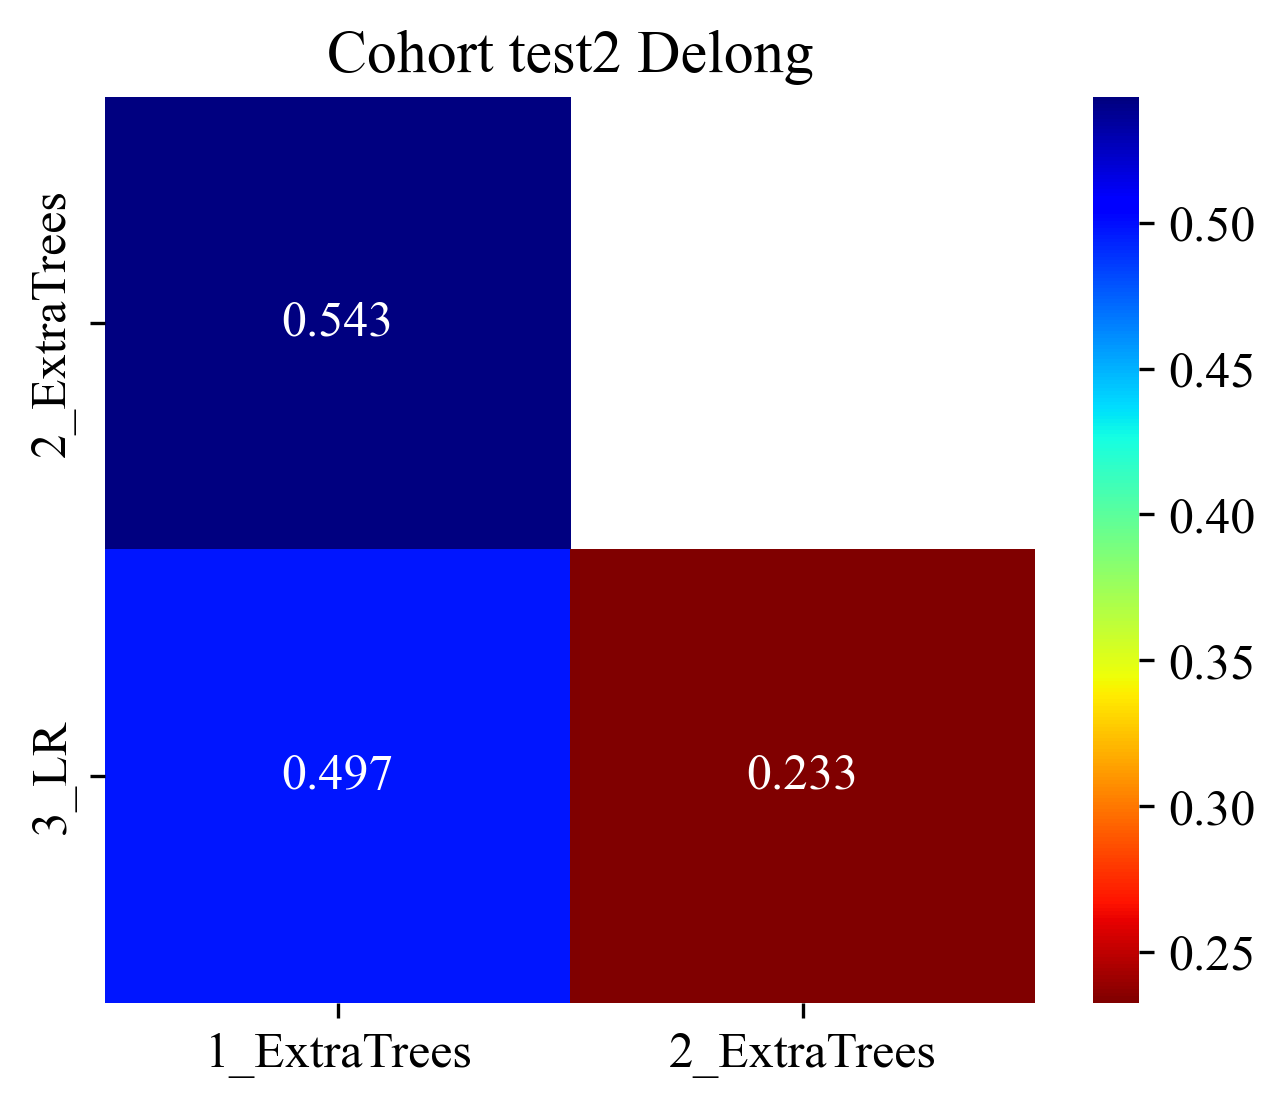

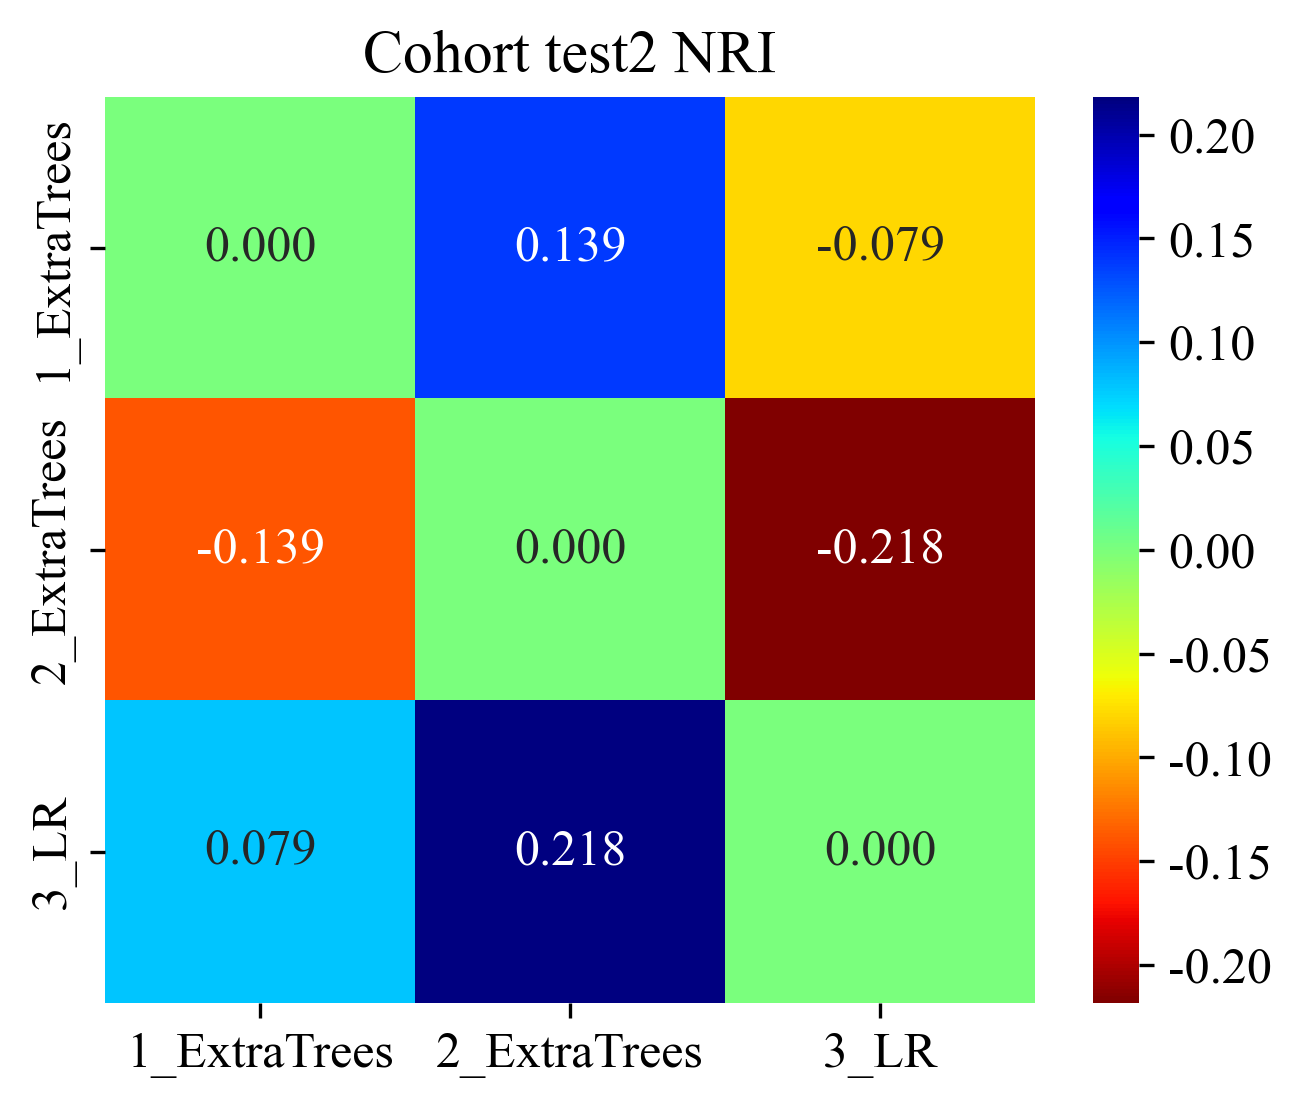

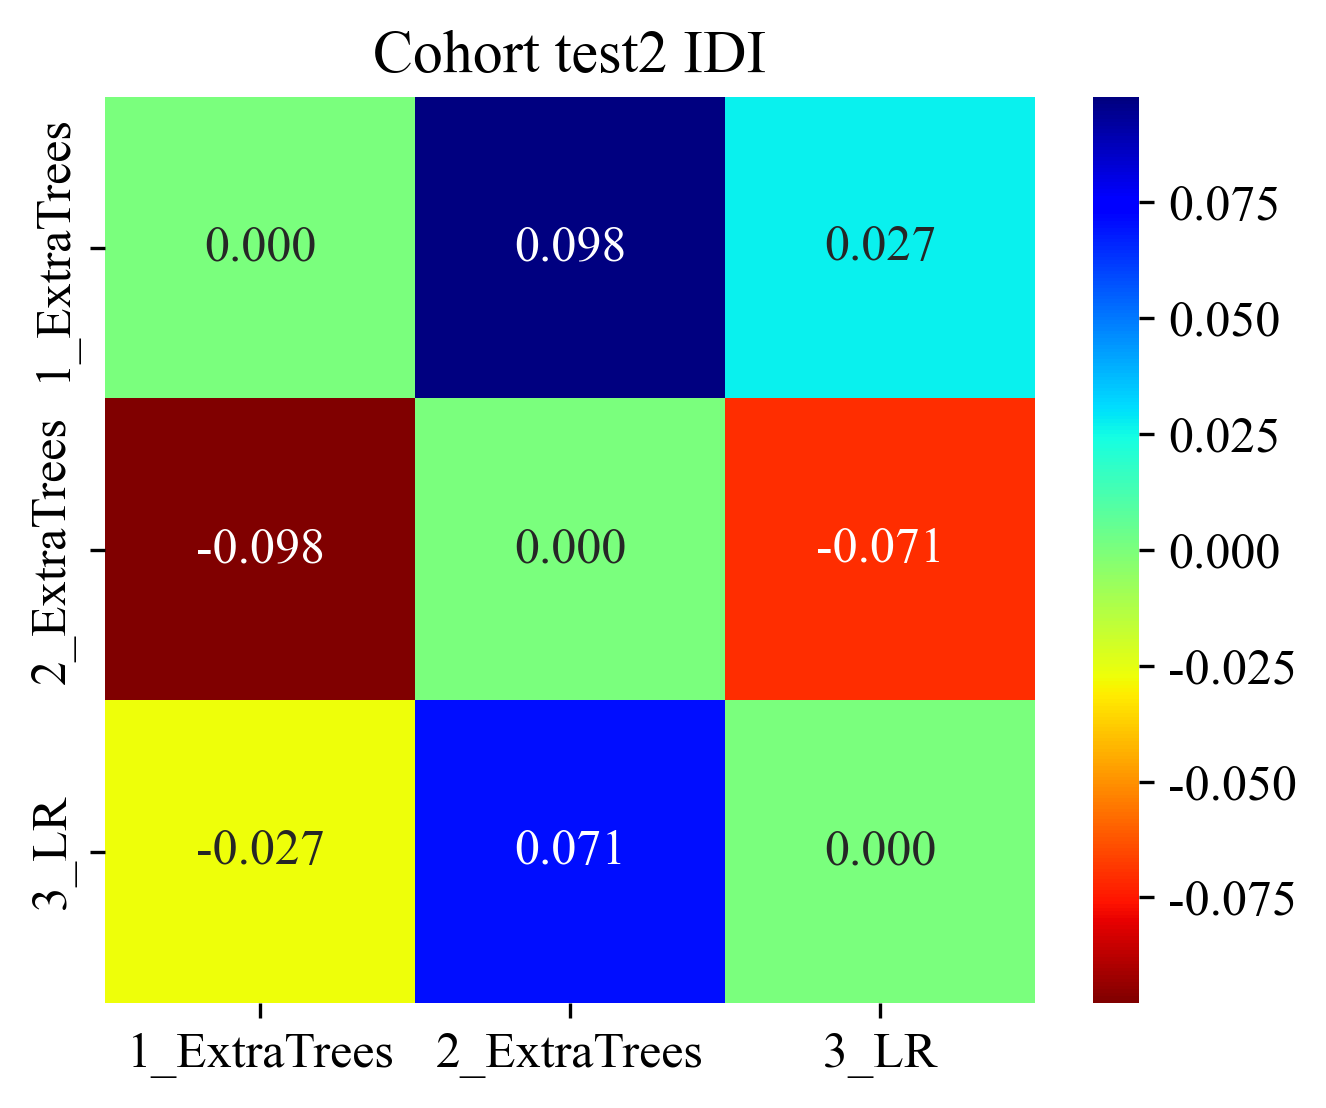

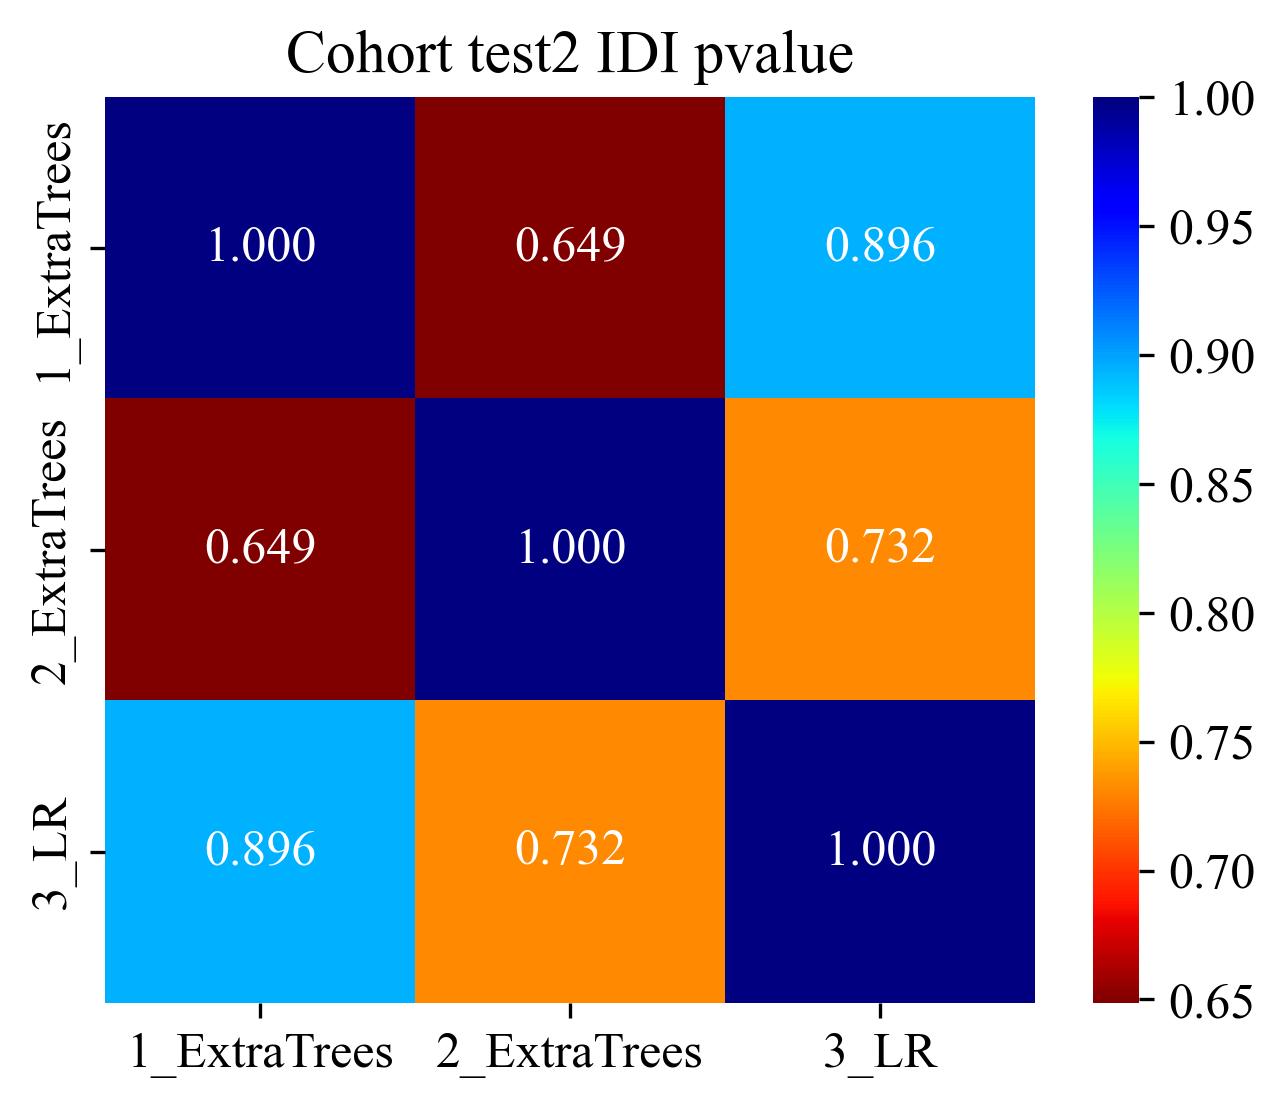

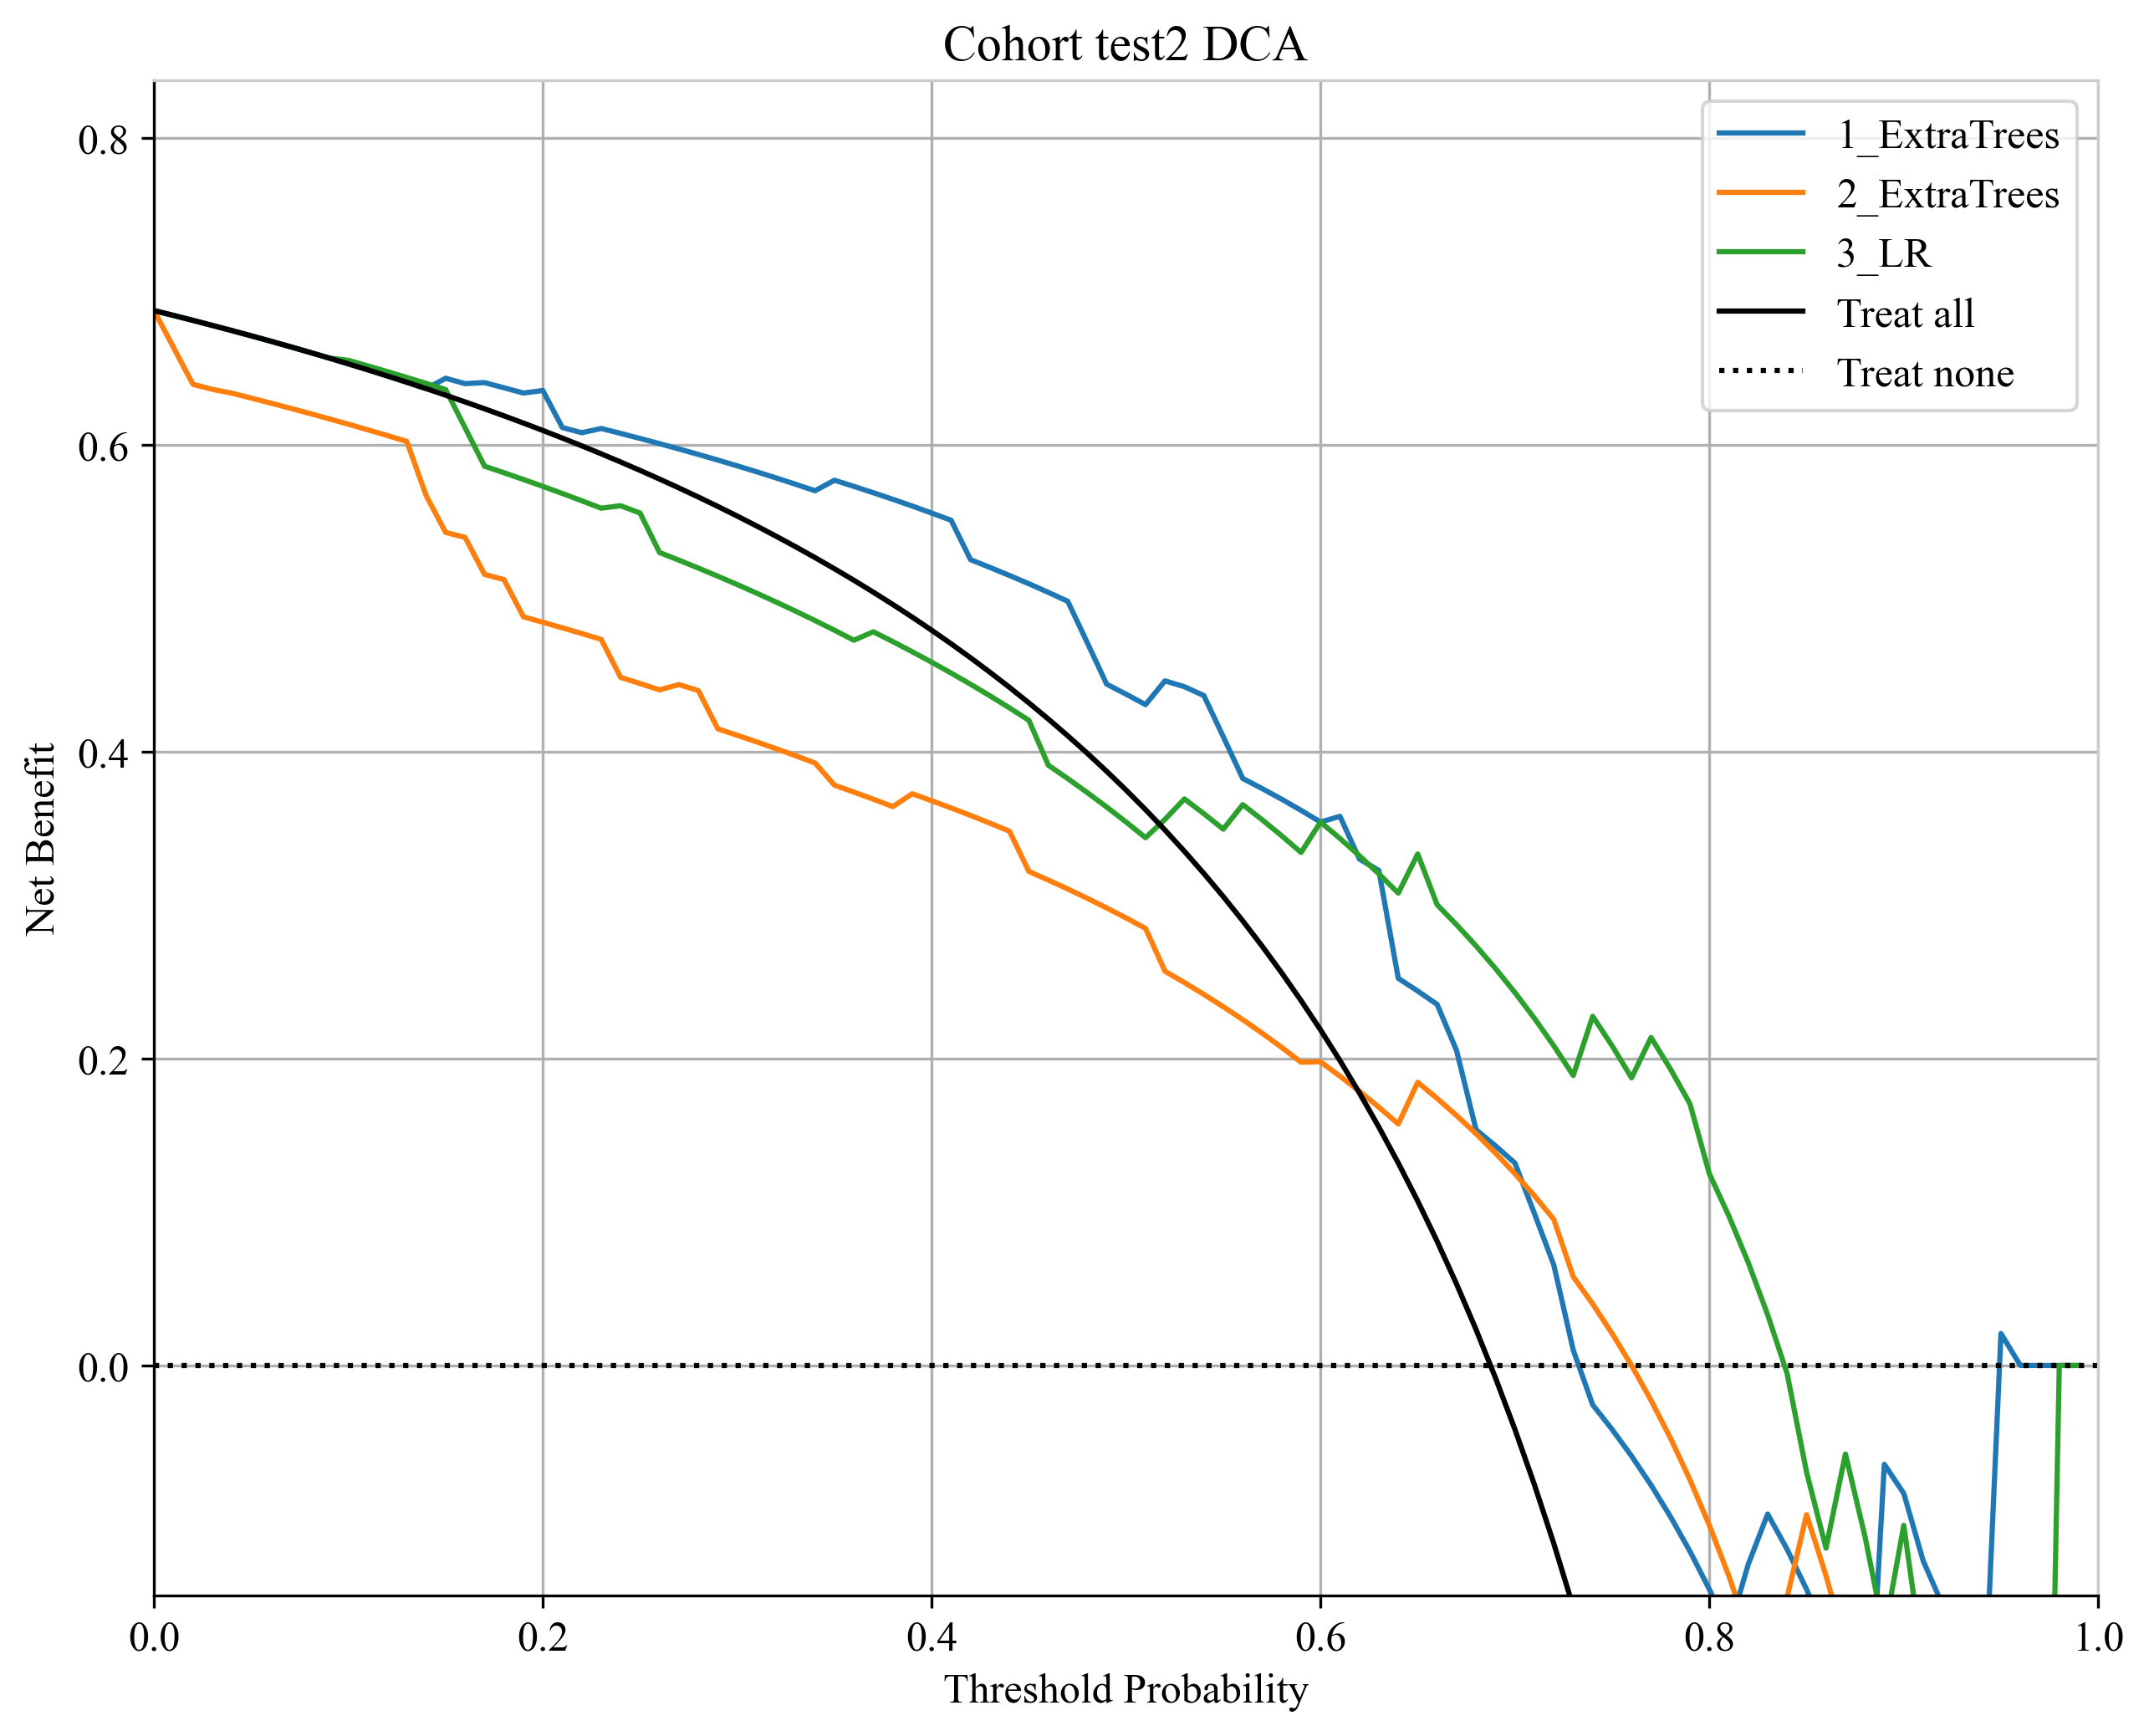

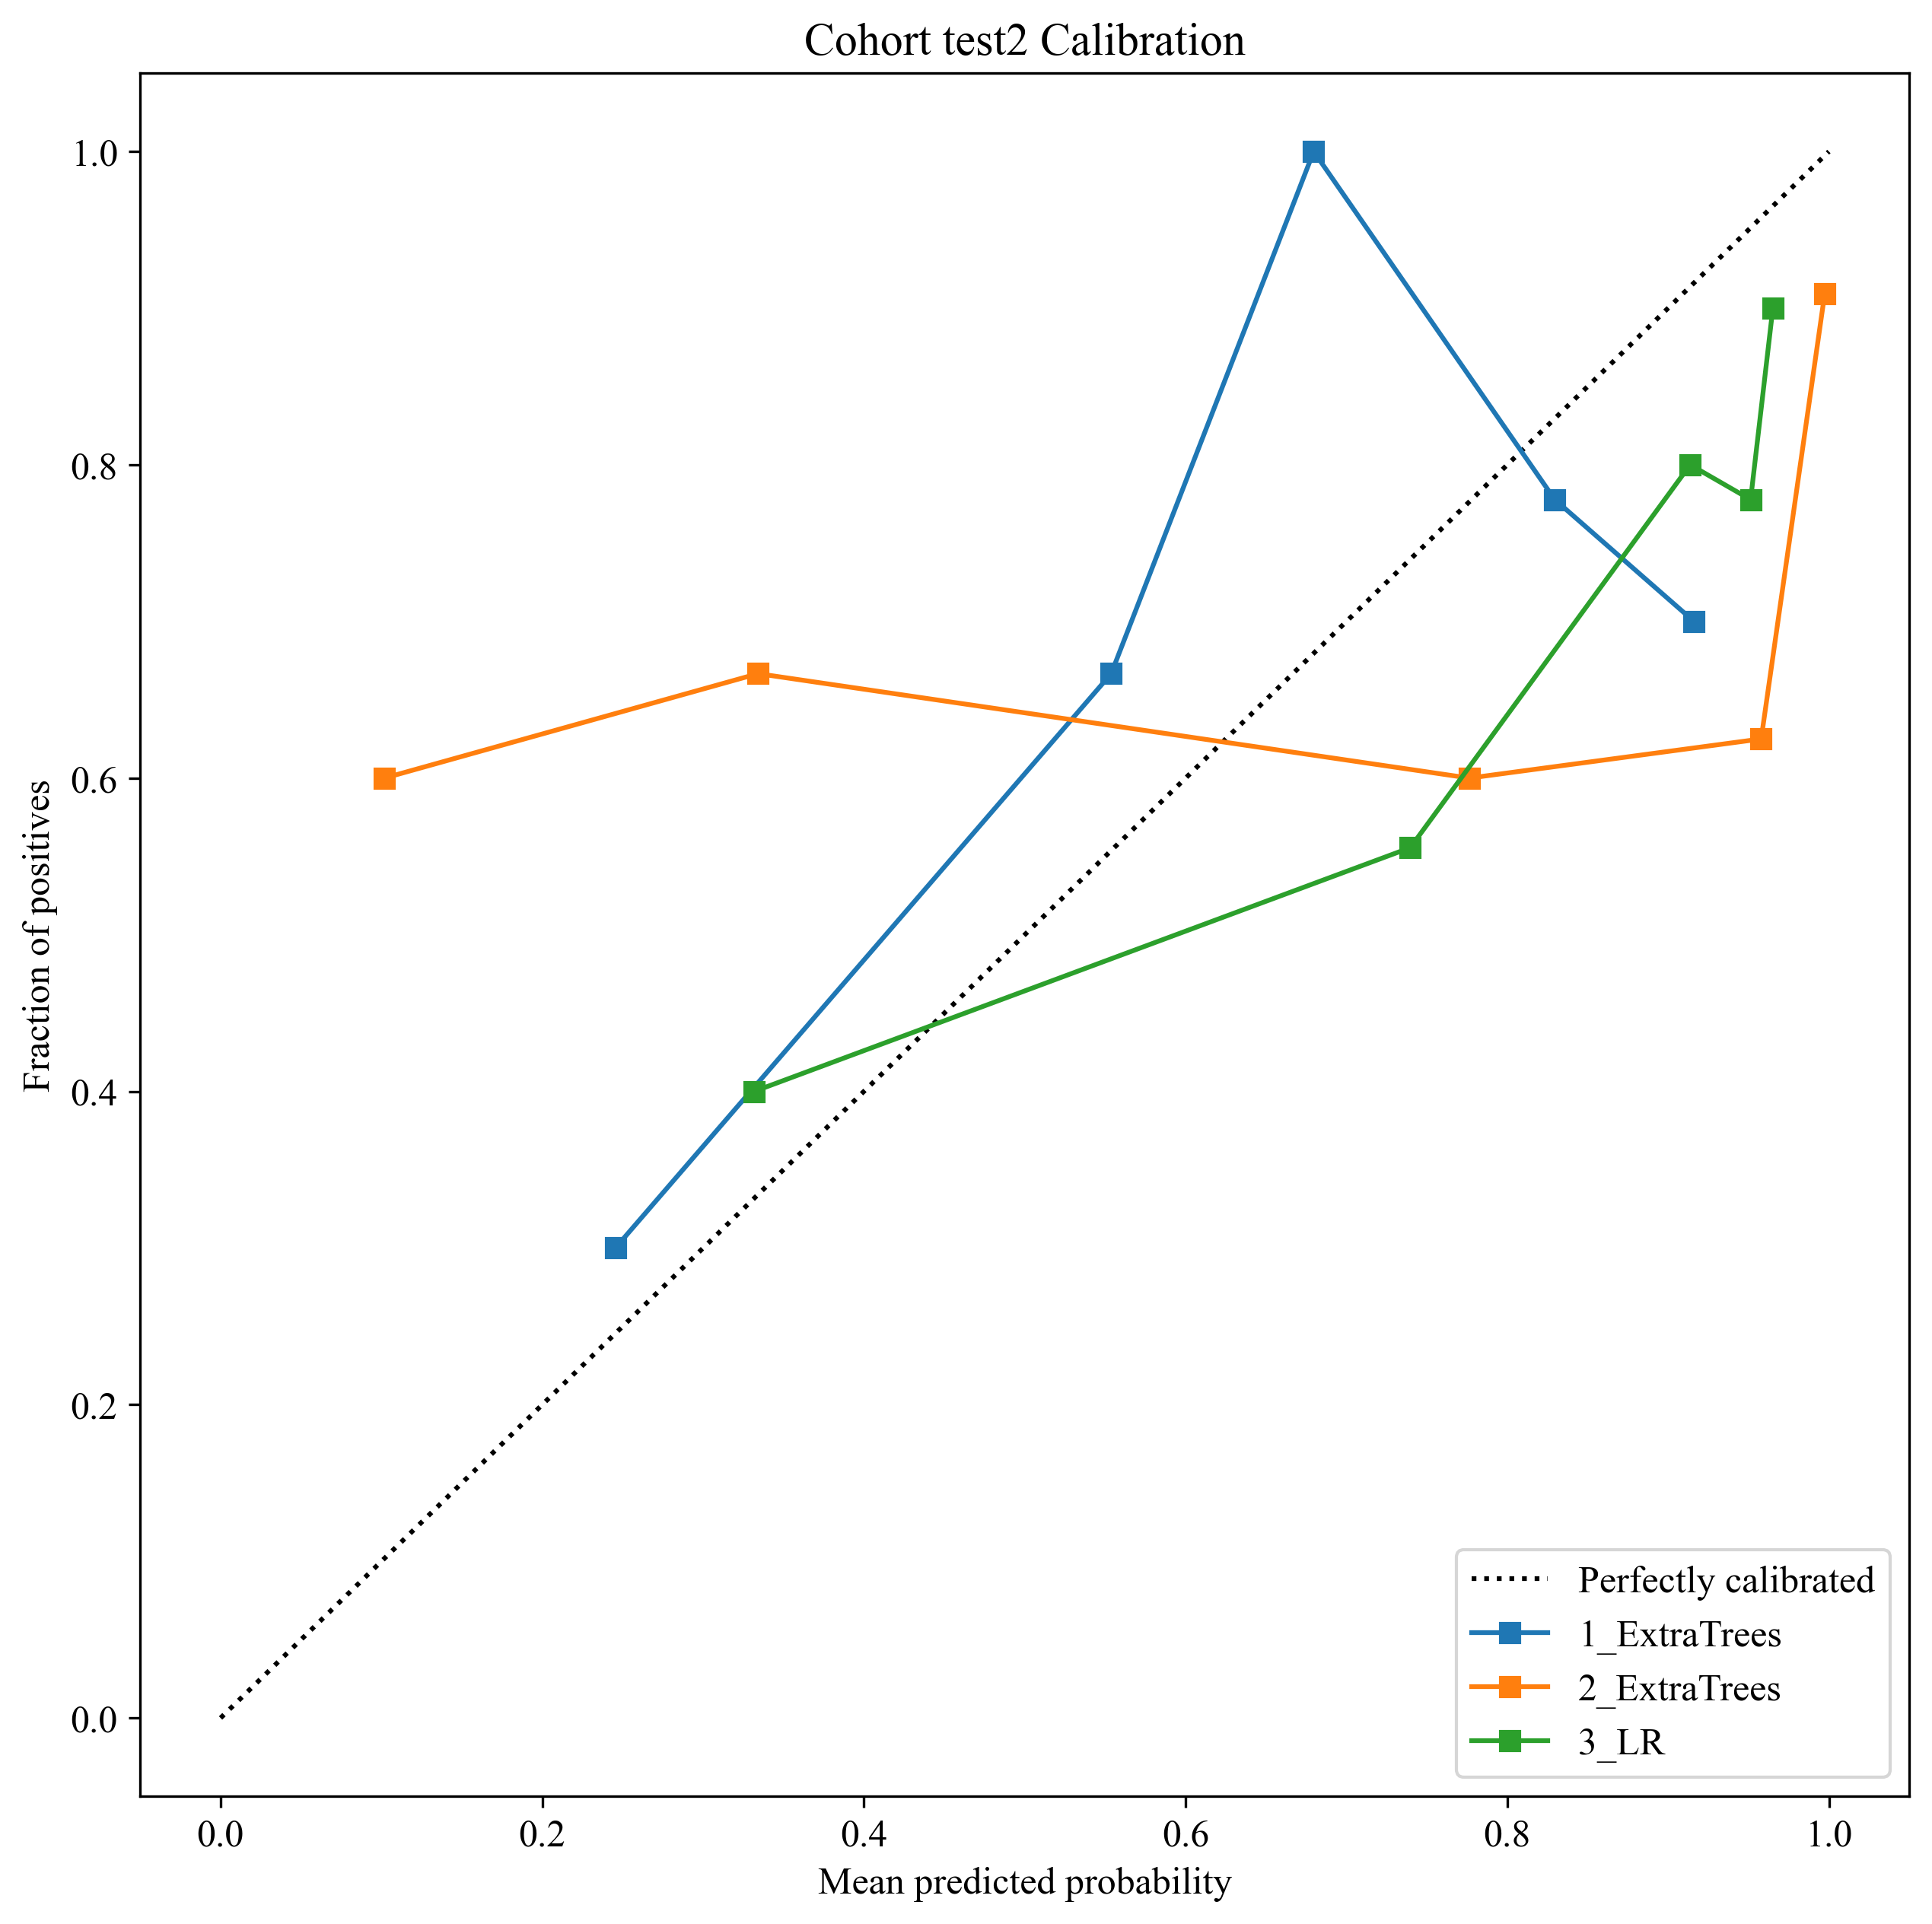

1_ExtraTrees  2_ExtraTrees       3_LR Cohort
0         0.073         0.997  2.686e-02  train
1         0.005         0.000  4.800e-06    val
2         0.104         0.000  8.500e-07  test1
3         0.079         0.000  2.711e-06  test2

In [2]:
import pandas as pd
from onekey_algo.custom.components.comp1 import normalize_df, merge_results
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from onekey_algo.custom.components import metrics
from onekey_algo.custom.components.delong import delong_roc_test
from onekey_algo.custom.components.comp1 import draw_matrix
from onekey_algo.custom.components.metrics import NRI, IDI
from onekey_algo.custom.components.comp1 import plot_DCA
from onekey_algo.custom.components.comp1 import draw_calibration
from onekey_algo.custom.components import stats
from onekey_algo.custom.components.metrics import analysis_pred_binary

hosmer = []
youden = {}
metric = []
fig_size = (5, 4)
for subset in [s for s in get_param_in_cwd('subsets', ['train', 'test'])]:
    ALL_results = None
    for mn in  model_names:
        r = pd.read_csv(f"./results/{mn}_{subset if subset == 'train' else 'test'}.csv")
        r.columns = ['ID', '-0', mn]
        if ALL_results is None:
            ALL_results = r
        else:
            ALL_results = pd.merge(ALL_results, r, on='ID', how='inner')
    Clinic = pd.read_csv('data/clinic_sel.csv')
    cnames = [c for c in Clinic.columns if c not in ['ID', 'group', 'label']]
    ALL_results =merge_results(ALL_results, Clinic[['ID'] + cnames], label_data[label_data['group'] == subset], label_col='ID')
    ALL_results = ALL_results.dropna(axis=1)
    display(ALL_results)
    # 绘制整体的ROC曲线
    pred_column = [f'{task}-0', f'{task}-1']
    gt = [np.array(ALL_results[task]) for _ in model_names]
    pred_train = [np.array(ALL_results[d]) for d in model_names]
    okcomp.comp1.draw_roc(gt, pred_train, labels=model_names, title=f'Cohort {subset} ROC', auto_point=False)
    plt.savefig(f'img/mc_{subset}_auc.svg')
    plt.show()
    
    # 汇总所有的Metric
    for mname, y, score in zip(model_names, gt, pred_train):
        # 计算验证集指标
        acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres = analysis_pred_binary(y, score)
        ci = f"{ci[0]:.4f} - {ci[1]:.4f}"
        youden[mname] = thres
        metric.append((mname, acc, auc, ci, tpr, tnr, ppv, npv, precision, recall, f1, thres, subset))
    metric_ = pd.DataFrame(metric, index=None, columns=['Signature', 'Accuracy', 'AUC', '95% CI',
                                                       'Sensitivity', 'Specificity', 
                                                       'PPV', 'NPV', 'Precision', 'Recall', 'F1',
                                                       'Threshold', 'Cohort'])

    display(metric_)
    
    # 绘制Delong
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=fig_size)
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            if i <= j:
                cm[i][j] = np.nan
            else:
                cm[i][j] = delong_roc_test(ALL_results[task], ALL_results[mni], ALL_results[mnj])[0][0]
    cm = pd.DataFrame(cm[1:, :-1], index=model_names[1:], columns=model_names[:-1])
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} Delong')
    plt.savefig(f'img/mc_delong_each_cohort_{subset}.svg', bbox_inches = 'tight')
    plt.show()
    
    # NRI
    delong = []
    delong_columns = []
    this_delong = []
    plt.figure(figsize=fig_size)
    cm = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            cm[i][j] = NRI(ALL_results[mni] > youden[mni], ALL_results[mnj] > youden[mnj], ALL_results[task])
    cm = pd.DataFrame(cm, index=model_names, columns=model_names)
    draw_matrix(cm, annot=True, cmap='jet_r', cbar=True)
    plt.title(f'Cohort {subset} NRI')
    plt.savefig(f'img/mc_NRI_each_cohort_{subset}.svg', bbox_inches = 'tight')
    plt.show()
    
    # IDI
    delong = []
    delong_columns = []
    this_delong = []
    cm = np.zeros((len(model_names), len(model_names)))
    p = np.zeros((len(model_names), len(model_names)))
    for i, mni in enumerate(model_names):
        for j, mnj in enumerate(model_names):
            cm[i][j], p[i][j] = IDI(ALL_results[mni], ALL_results[mnj], ALL_results[task], with_p=True)

    for d, n in zip([cm, p], ['IDI', 'IDI pvalue']):
        plt.figure(figsize=fig_size)
        d = pd.DataFrame(d, index=model_names, columns=model_names)
        draw_matrix(d, annot=True, cmap='jet_r', cbar=True)
        plt.title(f'Cohort {subset} {n}')
        plt.savefig(f'img/mc_{n}_each_cohort_{subset}.svg', bbox_inches = 'tight')
        plt.show()
        
    # DCA
    plot_DCA([ALL_results[model_name] for model_name in model_names], 
             ALL_results[task], title=f'Cohort {subset} DCA', labels=model_names, y_min=-0.15)
    plt.savefig(f'img/mc_{subset}_dca.svg')
    plt.show()
    
    # Calibration
    draw_calibration(pred_scores=pred_train, n_bins=5,
                     y_test=gt, model_names=model_names)
    plt.title(f'Cohort {subset} Calibration')
    plt.savefig(f'img/mc_{subset}_cali.svg')
    plt.show()
    
    # HLTest
    hosmer.append([stats.hosmer_lemeshow_test(y_true, y_pred, bins=10) 
                  for fn, y_true, y_pred in zip(model_names, gt, pred_train)])
pd.concat([pd.DataFrame(hosmer, columns=model_names), pd.DataFrame(get_param_in_cwd('subsets'), columns=['Cohort'])], axis=1)